# Load Libraries and Data

Dataset is retrieved from https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings?datasetId=576&sortBy=voteCount

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import textwrap
from sklearn.linear_model import LinearRegression

!pip install shap
import shap
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.linear_model import RANSACRegressor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 kB 10.0 MB/s eta 0:00:00


In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
cd "gdrive/MyDrive/dataset/ST4248"

/content/gdrive/MyDrive/dataset/ST4248


In [ ]:
df = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")

# Cleaning and EDA

In [ ]:
df.head()

Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     29.08      3.58      6.81         0.77         40.24           NaN   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
4     11.27      8.89     10.22         1.00         31.37           NaN   

   Critic_Count User_Score  User_Count Developer Rating  
0          51.0          8       322.0  Nintendo      E  
1           NaN        NaN         NaN       NaN    NaN  
2          73.0        8.3       709.0  Nintendo      E  
3          73.0          8       192.0  Nintendo      E  
4           NaN        NaN         NaN       NaN    NaN

In [ ]:
df.shape

(16719, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [ ]:
df.describe()

Year_of_Release      NA_Sales      EU_Sales      JP_Sales  \
count     16450.000000  16719.000000  16719.000000  16719.000000   
mean       2006.487356      0.263330      0.145025      0.077602   
std           5.878995      0.813514      0.503283      0.308818   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2020.000000     41.360000     28.960000     10.220000   

        Other_Sales  Global_Sales  Critic_Score  Critic_Count    User_Count  
count  16719.000000  16719.000000   8137.000000   8137.000000   7590.000000  
mean       0.047332      0.533543     68.967679     26.360821    162.229908  
std        0.186710      1.547935     13.938165     18.980495    561.282326  
min        0.000000      0.010000     13.000000      3.000000      4.000000  
25%        0.000000      0.060000     60.000000     12.000000     10.000000  
50%        0.010000      0.170000     71.000000     21.000000     24.000000  
75%        0.030000      0.470000     79.000000     36.000000     81.000000  
max       10.570000     82.530000     98.000000    113.000000  10665.000000

In [ ]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [ ]:
df[(df.User_Score == "tbd") & df.User_Count.notna()]

Empty DataFrame
Columns: [Name, Platform, Year_of_Release, Genre, Publisher, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales, Critic_Score, Critic_Count, User_Score, User_Count, Developer, Rating]
Index: []

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.shape

(6825, 16)

In [ ]:
df.User_Score.unique()

array(['8', '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4', '8.2',
       '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2', '8.9',
       '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3', '7.6',
       '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1', '6.7',
       '5.4', '4', '9.3', '6.2', '4.2', '6', '4.9', '3.7', '4.1', '5.8',
       '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1', '2.9', '5.2',
       '3.3', '4.5', '5.1', '3.5', '2.5', '1.9', '2.2', '2', '9.5', '4.7',
       '2.1', '3.6', '1.8', '3.8', '3', '9.6', '2.8', '1.7', '2.7', '2.4',
       '1.5', '1.2', '2.3', '0.5', '0.6', '0.9', '1', '1.4', '1.3', '0.7'],
      dtype=object)

In [ ]:
df.User_Score = df.User_Score.astype(float)

In [ ]:
df.describe()

Year_of_Release     NA_Sales     EU_Sales     JP_Sales  Other_Sales  \
count      6825.000000  6825.000000  6825.000000  6825.000000  6825.000000   
mean       2007.436777     0.394484     0.236089     0.064158     0.082677   
std           4.211248     0.967385     0.687330     0.287570     0.269871   
min        1985.000000     0.000000     0.000000     0.000000     0.000000   
25%        2004.000000     0.060000     0.020000     0.000000     0.010000   
50%        2007.000000     0.150000     0.060000     0.000000     0.020000   
75%        2011.000000     0.390000     0.210000     0.010000     0.070000   
max        2016.000000    41.360000    28.960000     6.500000    10.570000   

       Global_Sales  Critic_Score  Critic_Count   User_Score    User_Count  
count   6825.000000   6825.000000   6825.000000  6825.000000   6825.000000  
mean       0.777590     70.272088     28.931136     7.185626    174.722344  
std        1.963443     13.868572     19.224165     1.439942    587.428538  
min        0.010000     13.000000      3.000000     0.500000      4.000000  
25%        0.110000     62.000000     14.000000     6.500000     11.000000  
50%        0.290000     72.000000     25.000000     7.500000     27.000000  
75%        0.750000     80.000000     39.000000     8.200000     89.000000  
max       82.530000     98.000000    113.000000     9.600000  10665.000000

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


<Axes: >

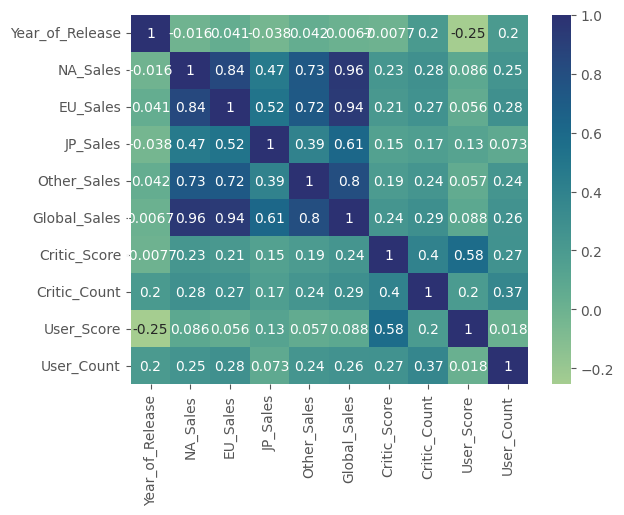

In [ ]:
sns.heatmap(df.corr(), annot = True, cmap="crest")

In [ ]:
df[(df["Platform"] == "Wii") & (~df["Name"].str.contains("Wii"))]

Name Platform  \
39                               Super Smash Bros. Brawl      Wii   
49                                    Super Mario Galaxy      Wii   
61                                          Just Dance 3      Wii   
68                                          Just Dance 2      Wii   
80                                         Mario Party 8      Wii   
...                                                  ...      ...   
15118  George of the Jungle and the Search for the Se...      Wii   
15165                              Line Rider 2: Unbound      Wii   
15345                                      Balls of Fury      Wii   
15723                                   Emergency Mayhem      Wii   
16311                                    Groovin' Blocks      Wii   

       Year_of_Release     Genre               Publisher  NA_Sales  EU_Sales  \
39              2008.0  Fighting                Nintendo      6.62      2.55   
49              2007.0  Platform                Nintendo      6.06      3.35   
61              2011.0      Misc                 Ubisoft      5.95      3.11   
68              2010.0      Misc                 Ubisoft      5.80      2.85   
80              2007.0      Misc                Nintendo      3.74      2.24   
...                ...       ...                     ...       ...       ...   
15118           2008.0  Platform  Ignition Entertainment      0.02      0.00   
15165           2008.0    Puzzle             Deep Silver      0.02      0.00   
15345           2007.0    Sports  Zoo Digital Publishing      0.02      0.00   
15723           2008.0    Racing             Codemasters      0.02      0.00   
16311           2009.0    Puzzle               Zoo Games      0.01      0.00   

       JP_Sales  Other_Sales  Global_Sales  Critic_Score  Critic_Count  \
39         2.66         1.01         12.84          93.0          81.0   
49         1.20         0.74         11.35          97.0          73.0   
61         0.00         1.06         10.12          74.0          15.0   
68         0.01         0.78          9.44          74.0          24.0   
80         1.58         0.70          8.27          62.0          41.0   
...         ...          ...           ...           ...           ...   
15118      0.00         0.00          0.02          35.0          10.0   
15165      0.00         0.00          0.02          62.0          12.0   
15345      0.00         0.00          0.02          19.0           6.0   
15723      0.00         0.00          0.02          40.0          21.0   
16311      0.00         0.00          0.01          75.0          13.0   

       User_Score  User_Count              Developer Rating  
39            8.9      1662.0              Game Arts      T  
49            8.9      2147.0               Nintendo      E  
61            7.8        16.0                Ubisoft   E10+  
68            7.3        24.0                Ubisoft   E10+  
80            6.3       190.0                 Hudson      E  
...           ...         ...                    ...    ...  
15118         4.0         6.0                  Crave      E  
15165         6.4         5.0   InXile Entertainment      E  
15345         2.8        25.0  Black Lantern Studios   E10+  
15723         4.3         4.0    Supersonic Software      T  
16311         8.5         6.0     Empty Clip Studios      E  

[467 rows x 16 columns]

Text(0.5, 1.0, 'Sales Distribution across Regions')

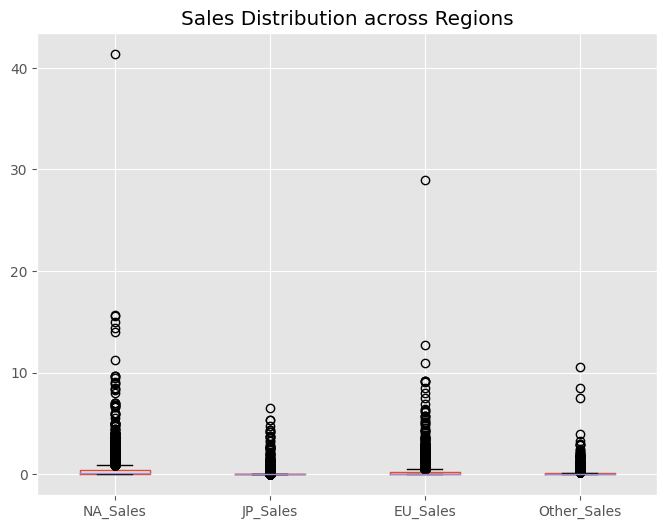

In [ ]:
df[["NA_Sales", "JP_Sales", "EU_Sales", "Other_Sales"]].boxplot(figsize = (8, 6))
plt.title("Sales Distribution across Regions")

Text(0.5, 1.0, 'Video Games Count by Release Year')

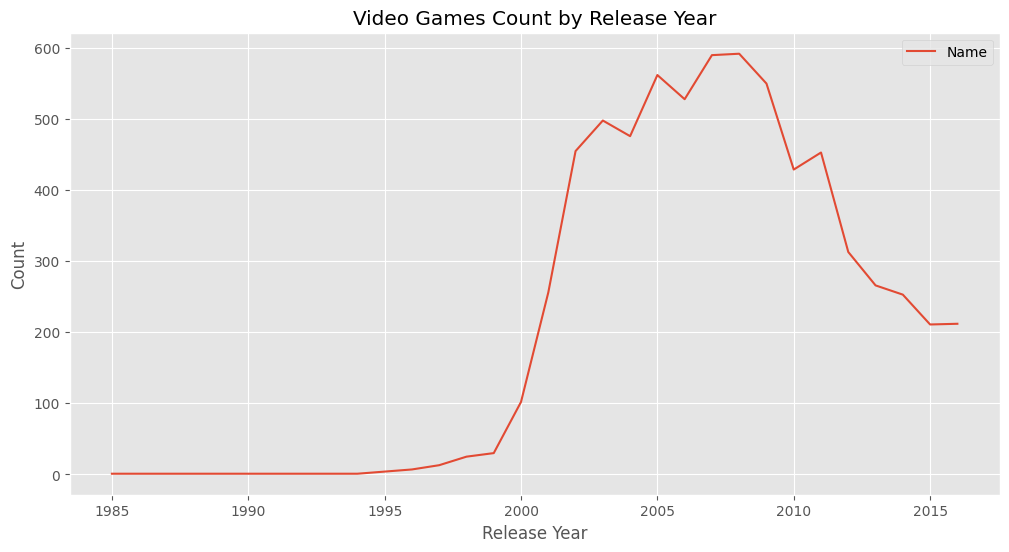

In [ ]:
df.groupby("Year_of_Release").agg({"Name": "count"}).plot(figsize=(12, 6))
plt.ylabel("Count")
plt.xlabel("Release Year")
plt.title("Video Games Count by Release Year")

FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator


Text(0.5, 1.0, 'Other Sales QQ Plot')

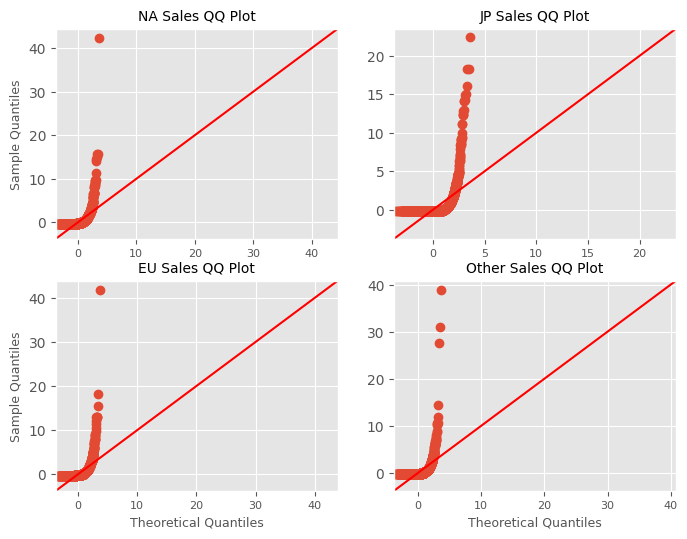

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))

sm.qqplot(df["NA_Sales"], line = "45", fit = True, ax = axes[(0, 0)])
axes[(0, 0)].set_xticklabels(labels = [textwrap.fill(x.get_text(), 10) for x in axes[(0, 0)].get_xticklabels()], fontdict = {"fontsize": 8})
axes[(0, 0)].set_ylabel("Sample Quantiles", fontdict = {"fontsize": 9})
axes[(0, 0)].set_xlabel("")
axes[(0, 0)].set_title("NA Sales QQ Plot", fontdict = {"fontsize": 10})

sm.qqplot(df["JP_Sales"], line = "45", fit = True, ax = axes[(0, 1)])
axes[(0, 1)].set_xticklabels(labels = [textwrap.fill(x.get_text(), 10) for x in axes[(0, 1)].get_xticklabels()], fontdict = {"fontsize": 8})
axes[(0, 1)].set_ylabel("")
axes[(0, 1)].set_xlabel("")
axes[(0, 1)].set_title("JP Sales QQ Plot", fontdict = {"fontsize": 10})

sm.qqplot(df["EU_Sales"], line = "45", fit = True, ax = axes[(1, 0)])
axes[(1, 0)].set_xticklabels(labels = [textwrap.fill(x.get_text(), 10) for x in axes[(1, 0)].get_xticklabels()], fontdict = {"fontsize": 8})
axes[(1, 0)].set_ylabel("Sample Quantiles", fontdict = {"fontsize": 9})
axes[(1, 0)].set_xlabel("Theoretical Quantiles", fontdict = {"fontsize": 9})
axes[(1, 0)].set_title("EU Sales QQ Plot", fontdict = {"fontsize": 10})

sm.qqplot(df["Other_Sales"], line = "45", fit = True, ax = axes[(1, 1)])
axes[(1, 1)].set_xticklabels(labels = [textwrap.fill(x.get_text(), 10) for x in axes[(1, 1)].get_xticklabels()], fontdict = {"fontsize": 8})
axes[(1, 1)].set_ylabel("")
axes[(1, 1)].set_xlabel("Theoretical Quantiles", fontdict = {"fontsize": 9})
axes[(1, 1)].set_title("Other Sales QQ Plot", fontdict = {"fontsize": 10})

FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator


Text(0.5, 1.0, 'Log Other Sales QQ Plot')

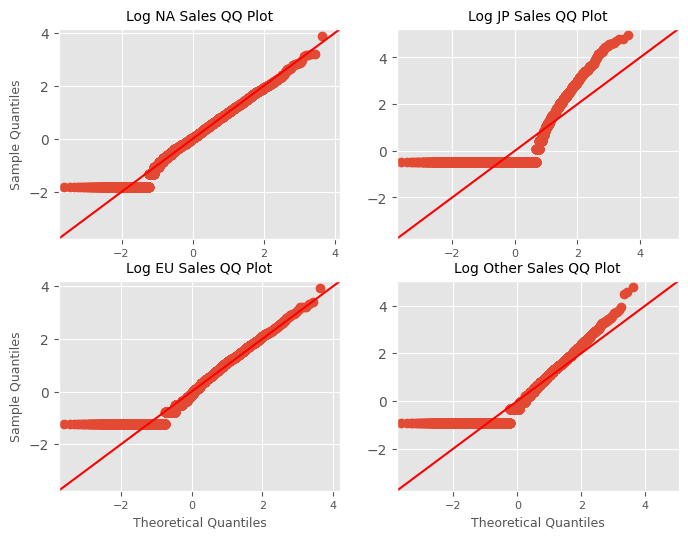

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))

sm.qqplot(np.log(df["NA_Sales"].apply(lambda x: 0.01 if x == 0 else x)), line = "45", fit = True, ax = axes[(0, 0)])
axes[(0, 0)].set_xticklabels(labels = [textwrap.fill(x.get_text(), 10) for x in axes[(0, 0)].get_xticklabels()], fontdict = {"fontsize": 8})
axes[(0, 0)].set_ylabel("Sample Quantiles", fontdict = {"fontsize": 9})
axes[(0, 0)].set_xlabel("")
axes[(0, 0)].set_title("Log NA Sales QQ Plot", fontdict = {"fontsize": 10})

sm.qqplot(np.log(df["JP_Sales"].apply(lambda x: 0.01 if x == 0 else x)), line = "45", fit = True, ax = axes[(0, 1)])
axes[(0, 1)].set_xticklabels(labels = [textwrap.fill(x.get_text(), 10) for x in axes[(0, 1)].get_xticklabels()], fontdict = {"fontsize": 8})
axes[(0, 1)].set_ylabel("")
axes[(0, 1)].set_xlabel("")
axes[(0, 1)].set_title("Log JP Sales QQ Plot", fontdict = {"fontsize": 10})

sm.qqplot(np.log(df["EU_Sales"].apply(lambda x: 0.01 if x == 0 else x)), line = "45", fit = True, ax = axes[(1, 0)])
axes[(1, 0)].set_xticklabels(labels = [textwrap.fill(x.get_text(), 10) for x in axes[(1, 0)].get_xticklabels()], fontdict = {"fontsize": 8})
axes[(1, 0)].set_ylabel("Sample Quantiles", fontdict = {"fontsize": 9})
axes[(1, 0)].set_xlabel("Theoretical Quantiles", fontdict = {"fontsize": 9})
axes[(1, 0)].set_title("Log EU Sales QQ Plot", fontdict = {"fontsize": 10})

sm.qqplot(np.log(df["Other_Sales"].apply(lambda x: 0.01 if x == 0 else x)), line = "45", fit = True, ax = axes[(1, 1)])
axes[(1, 1)].set_xticklabels(labels = [textwrap.fill(x.get_text(), 10) for x in axes[(1, 1)].get_xticklabels()], fontdict = {"fontsize": 8})
axes[(1, 1)].set_ylabel("")
axes[(1, 1)].set_xlabel("Theoretical Quantiles", fontdict = {"fontsize": 9})
axes[(1, 1)].set_title("Log Other Sales QQ Plot", fontdict = {"fontsize": 10})

In [ ]:
df[df["Global_Sales"] > 20]

Name Platform  Year_of_Release  \
0                                     Wii Sports      Wii           2006.0   
2                                 Mario Kart Wii      Wii           2008.0   
3                              Wii Sports Resort      Wii           2009.0   
6                          New Super Mario Bros.       DS           2006.0   
7                                       Wii Play      Wii           2006.0   
8                      New Super Mario Bros. Wii      Wii           2009.0   
11                                 Mario Kart DS       DS           2005.0   
13                                       Wii Fit      Wii           2007.0   
14                            Kinect Adventures!     X360           2010.0   
15                                  Wii Fit Plus      Wii           2009.0   
16                            Grand Theft Auto V      PS3           2013.0   
17                 Grand Theft Auto: San Andreas      PS2           2004.0   
19  Brain Age: Train Your Brain in Minutes a Day       DS           2005.0   

       Genre               Publisher  NA_Sales  EU_Sales  JP_Sales  \
0     Sports                Nintendo     41.36     28.96      3.77   
2     Racing                Nintendo     15.68     12.76      3.79   
3     Sports                Nintendo     15.61     10.93      3.28   
6   Platform                Nintendo     11.28      9.14      6.50   
7       Misc                Nintendo     13.96      9.18      2.93   
8   Platform                Nintendo     14.44      6.94      4.70   
11    Racing                Nintendo      9.71      7.47      4.13   
13    Sports                Nintendo      8.92      8.03      3.60   
14      Misc  Microsoft Game Studios     15.00      4.89      0.24   
15    Sports                Nintendo      9.01      8.49      2.53   
16    Action    Take-Two Interactive      7.02      9.09      0.98   
17    Action    Take-Two Interactive      9.43      0.40      0.41   
19      Misc                Nintendo      4.74      9.20      4.16   

    Other_Sales  Global_Sales  Critic_Score  Critic_Count  User_Score  \
0          8.45         82.53          76.0          51.0         8.0   
2          3.29         35.52          82.0          73.0         8.3   
3          2.95         32.77          80.0          73.0         8.0   
6          2.88         29.80          89.0          65.0         8.5   
7          2.84         28.92          58.0          41.0         6.6   
8          2.24         28.32          87.0          80.0         8.4   
11         1.90         23.21          91.0          64.0         8.6   
13         2.15         22.70          80.0          63.0         7.7   
14         1.69         21.81          61.0          45.0         6.3   
15         1.77         21.79          80.0          33.0         7.4   
16         3.96         21.04          97.0          50.0         8.2   
17        10.57         20.81          95.0          80.0         9.0   
19         2.04         20.15          77.0          58.0         7.9   

    User_Count            Developer Rating  
0        322.0             Nintendo      E  
2        709.0             Nintendo      E  
3        192.0             Nintendo      E  
6        431.0             Nintendo      E  
7        129.0             Nintendo      E  
8        594.0             Nintendo      E  
11       464.0             Nintendo      E  
13       146.0             Nintendo      E  
14       106.0  Good Science Studio      E  
15        52.0             Nintendo      E  
16      3994.0       Rockstar North      M  
17      1588.0       Rockstar North      M  
19        50.0             Nintendo      E

In [ ]:
df.reset_index(inplace = True, drop = True)

In [ ]:
df["Total_Year"] = df["Year_of_Release"].apply(lambda x: 2017 - x)

In [ ]:
df.head()

Name Platform  Year_of_Release     Genre Publisher  \
0             Wii Sports      Wii           2006.0    Sports  Nintendo   
1         Mario Kart Wii      Wii           2008.0    Racing  Nintendo   
2      Wii Sports Resort      Wii           2009.0    Sports  Nintendo   
3  New Super Mario Bros.       DS           2006.0  Platform  Nintendo   
4               Wii Play      Wii           2006.0      Misc  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     15.68     12.76      3.79         3.29         35.52          82.0   
2     15.61     10.93      3.28         2.95         32.77          80.0   
3     11.28      9.14      6.50         2.88         29.80          89.0   
4     13.96      9.18      2.93         2.84         28.92          58.0   

   Critic_Count  User_Score  User_Count Developer Rating  Total_Year  
0          51.0         8.0       322.0  Nintendo      E        11.0  
1          73.0         8.3       709.0  Nintendo      E         9.0  
2          73.0         8.0       192.0  Nintendo      E         8.0  
3          65.0         8.5       431.0  Nintendo      E        11.0  
4          41.0         6.6       129.0  Nintendo      E        11.0

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4]),
 [Text(0, -0.2, '−0.2'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4000000000000001, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0000000000000002, '1.0'),
  Text(0, 1.2000000000000002, '1.2'),
  Text(0, 1.4000000000000001, '1.4')])

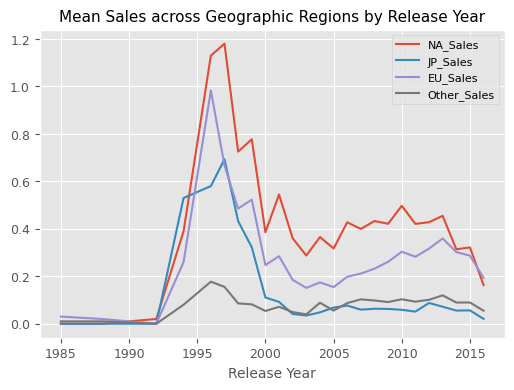

In [ ]:
fig = df.groupby("Year_of_Release").agg({"NA_Sales": np.mean, "JP_Sales": np.mean, "EU_Sales": np.mean, "Other_Sales": np.mean}).plot(figsize = (6,4))
plt.title("Mean Sales across Geographic Regions by Release Year", fontsize = 11)
plt.xlabel("Release Year", fontsize = 10)
plt.legend(prop={'size': 8})
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.,
        1800.]),
 [Text(0, 0.0, '0'),
  Text(0, 200.0, '200'),
  Text(0, 400.0, '400'),
  Text(0, 600.0, '600'),
  Text(0, 800.0, '800'),
  Text(0, 1000.0, '1000'),
  Text(0, 1200.0, '1200'),
  Text(0, 1400.0, '1400'),
  Text(0, 1600.0, '1600'),
  Text(0, 1800.0, '1800')])

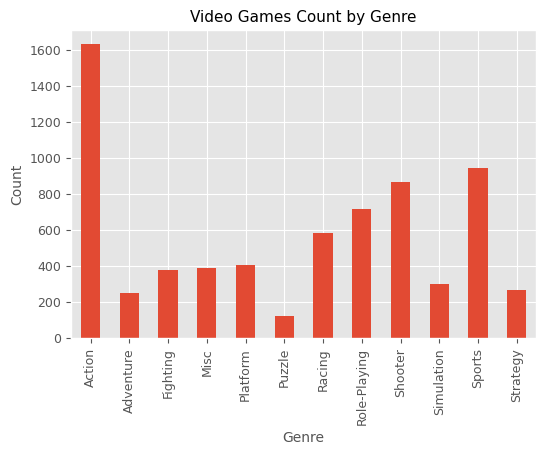

In [ ]:
df.groupby("Genre").agg({"Name": "count"}).plot(kind = "bar", figsize = (6, 4), legend = None)
plt.title("Video Games Count by Genre", fontsize = 11)
plt.xlabel("Genre", fontsize = 10)
plt.ylabel("Count", fontsize = 10)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

Text(0.5, 0.98, 'Mean Sales by Genre')

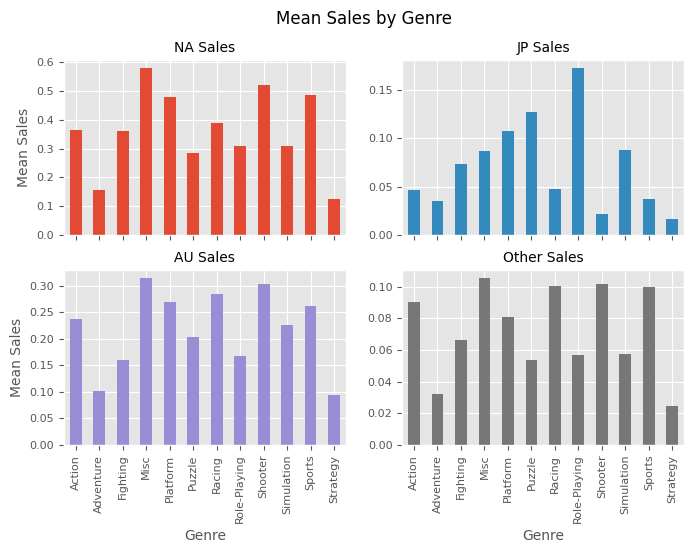

In [ ]:
axes = df.groupby("Genre").agg({"NA_Sales": np.mean, "JP_Sales": np.mean, "EU_Sales": np.mean, "Other_Sales": np.mean}).\
plot(kind="bar", subplots = True, layout = (2, 2), legend = None, figsize = (8, 5))

axes[(0, 0)].set_ylabel("Mean Sales", fontsize = 10)
axes[(1, 0)].set_ylabel("Mean Sales", fontsize = 10)
axes[(1, 0)].set_xlabel("Genre", fontsize = 10)
axes[(1, 1)].set_xlabel("Genre", fontsize = 10)

axes[(0, 0)].tick_params(axis='both', which='major', labelsize=8)
axes[(0, 1)].tick_params(axis='both', which='major', labelsize=8)
axes[(1, 0)].tick_params(axis='both', which='major', labelsize=8)
axes[(1, 1)].tick_params(axis='both', which='major', labelsize=8)

axes[(0, 0)].set_title("NA Sales", fontdict = {'fontsize':10})
axes[(0, 1)].set_title("JP Sales", fontdict = {'fontsize':10})
axes[(1, 0)].set_title("AU Sales", fontdict = {'fontsize':10})
axes[(1, 1)].set_title("Other Sales", fontdict = {'fontsize':10})

plt.suptitle("Mean Sales by Genre")

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 [Text(0, 0.0, '0'),
  Text(0, 200.0, '200'),
  Text(0, 400.0, '400'),
  Text(0, 600.0, '600'),
  Text(0, 800.0, '800'),
  Text(0, 1000.0, '1000'),
  Text(0, 1200.0, '1200')])

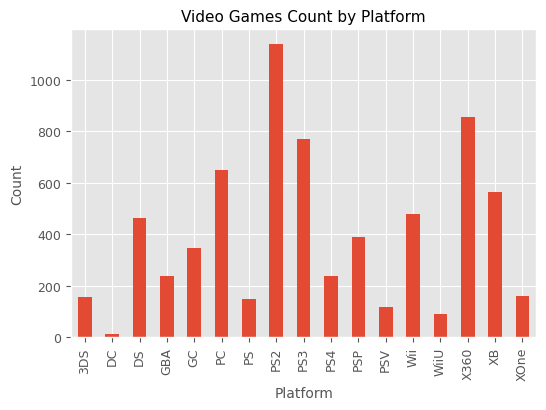

In [ ]:
df.groupby("Platform").agg({"Name": "count"}).plot(kind = "bar", figsize = (6, 4), legend = None)
plt.title("Video Games Count by Platform", fontsize = 11)
plt.xlabel("Platform", fontsize = 10)
plt.ylabel("Count", fontsize = 10)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

Text(0.5, 0.98, 'Mean Sales by Platform')

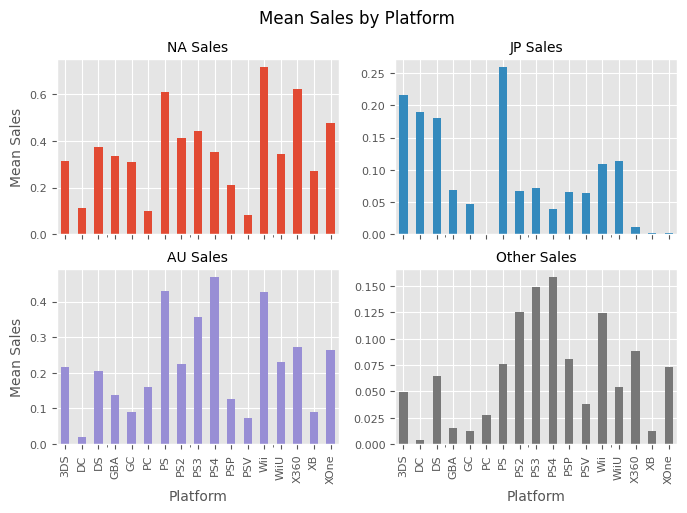

In [ ]:
axes = df.groupby("Platform").agg({"NA_Sales": np.mean, "JP_Sales": np.mean, "EU_Sales": np.mean, "Other_Sales": np.mean}).\
plot(kind="bar", subplots = True, layout = (2, 2), legend = None, figsize = (8, 5))

axes[(0, 0)].set_ylabel("Mean Sales", fontsize = 10)
axes[(1, 0)].set_ylabel("Mean Sales", fontsize = 10)
axes[(1, 0)].set_xlabel("Platform", fontsize = 10)
axes[(1, 1)].set_xlabel("Platform", fontsize = 10)

axes[(0, 0)].tick_params(axis='both', which='major', labelsize=8)
axes[(0, 1)].tick_params(axis='both', which='major', labelsize=8)
axes[(1, 0)].tick_params(axis='both', which='major', labelsize=8)
axes[(1, 1)].tick_params(axis='both', which='major', labelsize=8)

axes[(0, 0)].set_title("NA Sales", fontdict = {'fontsize':10})
axes[(0, 1)].set_title("JP Sales", fontdict = {'fontsize':10})
axes[(1, 0)].set_title("AU Sales", fontdict = {'fontsize':10})
axes[(1, 1)].set_title("Other Sales", fontdict = {'fontsize':10})

plt.suptitle("Mean Sales by Platform")

FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator


Text(0.5, 0.98, 'Mean Sales by Platform')

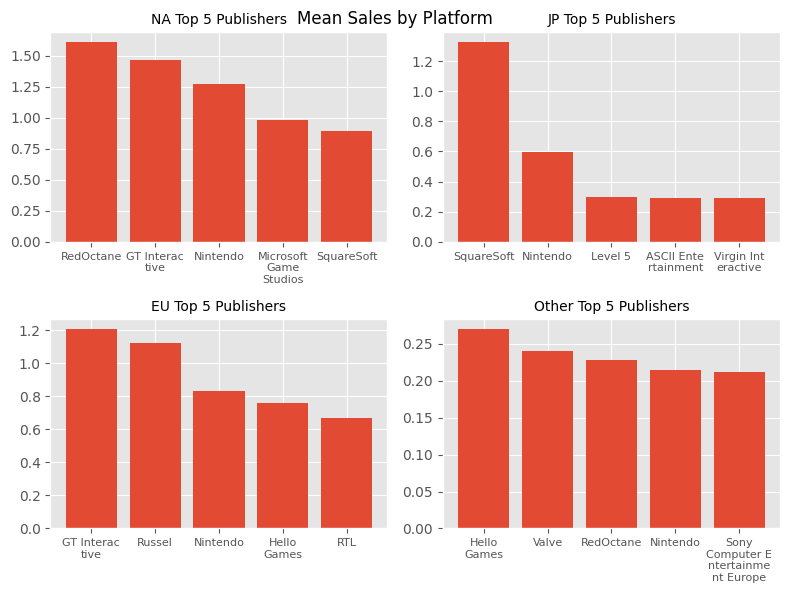

In [ ]:
import textwrap

JP_Publisher = df.groupby("Publisher").agg({"JP_Sales": np.mean}).reset_index()
JP_Publisher = JP_Publisher.sort_values(by = "JP_Sales", ascending = False)[:5]

EU_Publisher = df.groupby("Publisher").agg({"EU_Sales": np.mean}).reset_index()
EU_Publisher = EU_Publisher.sort_values(by = "EU_Sales", ascending = False)[:5]

NA_Publisher = df.groupby("Publisher").agg({"NA_Sales": np.mean}).reset_index()
NA_Publisher = NA_Publisher.sort_values(by = "NA_Sales", ascending = False)[:5]

Other_Publisher = df.groupby("Publisher").agg({"Other_Sales": np.mean}).reset_index()
Other_Publisher = Other_Publisher.sort_values(by = "Other_Sales", ascending = False)[:5]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))
axes[(0, 0)].bar(NA_Publisher["Publisher"], NA_Publisher["NA_Sales"])
axes[(0, 0)].set_xticklabels(labels = [textwrap.fill(x.get_text(), 10) for x in axes[(0, 0)].get_xticklabels()], fontdict = {"fontsize": 8})
axes[(0, 0)].set_title("NA Top 5 Publishers", fontdict = {"fontsize": 10})

axes[(0, 1)].bar(JP_Publisher["Publisher"], JP_Publisher["JP_Sales"])
axes[(0, 1)].set_xticklabels(labels = [textwrap.fill(x.get_text(), 10) for x in axes[(0, 1)].get_xticklabels()], fontdict = {"fontsize": 8})
axes[(0, 1)].set_title("JP Top 5 Publishers", fontdict = {"fontsize": 10})

axes[(1, 0)].bar(EU_Publisher["Publisher"], EU_Publisher["EU_Sales"])
axes[(1, 0)].set_xticklabels(labels = [textwrap.fill(x.get_text(), 10) for x in axes[(1, 0)].get_xticklabels()], fontdict = {"fontsize": 8})
axes[(1, 0)].set_title("EU Top 5 Publishers", fontdict = {"fontsize": 10})

axes[(1, 1)].bar(Other_Publisher["Publisher"], Other_Publisher["Other_Sales"])
axes[(1, 1)].set_xticklabels(labels = [textwrap.fill(x.get_text(), 10) for x in axes[(1, 1)].get_xticklabels()], fontdict = {"fontsize": 8})
axes[(1, 1)].set_title("Other Top 5 Publishers", fontdict = {"fontsize": 10})

fig.tight_layout()
plt.suptitle("Mean Sales by Platform")

In [ ]:
publisher_genres = df.groupby(["Publisher", "Genre"]).agg({"Name": "count"}).reset_index()
publisher_genres = publisher_genres[publisher_genres["Publisher"].isin(["RedOctane", "GT Interactive", "Nintendo", "Microsoft Game Studios",\
                                                   "SquareSoft", "Level 5", "ASCII Entertainment", "Virgin Interactive",\
                                                   "Russel", "Hello Games", "RTL", "Valve", "Sony Computer Entertainment Europe"])]

In [ ]:
publisher_genres.groupby("Publisher").agg({"Genre": "count"})

Genre
Publisher                                
ASCII Entertainment                     1
GT Interactive                          2
Hello Games                             1
Level 5                                 1
Microsoft Game Studios                 12
Nintendo                               12
RTL                                     1
RedOctane                               1
Russel                                  1
Sony Computer Entertainment Europe      5
SquareSoft                              1
Valve                                   1
Virgin Interactive                      7

In [ ]:
df.Year_of_Release = df.Year_of_Release.astype(float).astype(int).astype(str)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6825 entries, 0 to 6824
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   object 
 2   Year_of_Release  6825 non-null   object 
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   float64
 11  Critic_Count     6825 non-null   float64
 12  User_Score       6825 non-null   float64
 13  User_Count       6825 non-null   float64
 14  Developer        6825 non-null   object 
 15  Rating           6825 non-null   object 
 16  Total_Year       6825 non-null   float64
dtypes: float64(10)

In [ ]:
name = df.Name.copy()

In [ ]:
df.drop(["Name", "Global_Sales"], axis = 1, inplace = True)

In [ ]:
df = pd.get_dummies(df)

In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(min_df = 30, ngram_range = (1, 4))
X = cv.fit_transform(name)

In [ ]:
name[name.str.contains("Need")]

66        Need for Speed Underground
75      Need for Speed Underground 2
176      Need for Speed: Most Wanted
359      Need for Speed: Hot Pursuit
387            Need for Speed: Shift
                    ...             
5702    Need for Speed Underground 2
5954           Need for Speed: Shift
6125           Need for Speed Carbon
6135      Need for Speed Underground
6231       Need for Speed: ProStreet
Name: Name, Length: 68, dtype: object

In [ ]:
cv.get_feature_names_out()

array(['06', '07', '08', '09', '10', '2002', '2003', '2004', '2005', '3d',
       'adventure', 'adventures', 'age', 'and', 'and the', 'assassin',
       'assassin creed', 'ball', 'baseball', 'batman', 'battle', 'black',
       'blood', 'call', 'call of', 'call of duty', 'chronicles', 'city',
       'clancy', 'collection', 'crash', 'creed', 'dance', 'dark', 'dead',
       'disney', 'dragon', 'dragon ball', 'duty', 'dynasty',
       'dynasty warriors', 'edition', 'evil', 'evolution',
       'evolution soccer', 'fantasy', 'fifa', 'fifa soccer', 'final',
       'final fantasy', 'football', 'for', 'for speed', 'force', 'game',
       'gear', 'ghost', 'grand', 'guitar', 'guitar hero', 'harry',
       'harry potter', 'harry potter and', 'harry potter and the', 'hawk',
       'hero', 'heroes', 'honor', 'ii', 'iii', 'in', 'iv', 'just', 'king',
       'league', 'legend', 'legend of', 'legends', 'lego', 'live', 'lord',
       'lord of', 'lost', 'madden', 'madden nfl', 'man', 'mario',
       'marv

In [ ]:
name_df = pd.DataFrame(X.toarray(), columns = cv.get_feature_names_out())

In [ ]:
name_df.drop(["assassin", "call", "dragon", "ball", "creed", "evolution", "soccer", "tiger",
              "tiger woods", "tiger woods pga", "woods", "woods pga", "woods pga tour", "pga",
              "pga tour", "resident", "evil", "tour", "need", '06', '07', '08', '09', '10', '2002', 
              '2003', '2004', '2005', '3d', "spider", "man", "ncaa", "football", "ii", "iii", "in",
              "iv", "nba", "the", "the legend", "vs", "of", "of duty", "of the", "of war", "pro",
              "pro evolution", "fifa", "final", "and", "and the", "for", "for speed", "guitar", "harry",
              "just", "rise", "potter", "potter and", "potter and the", "fantasy", "call of", "dynasty", 
              "legend", "warriors", "star", "tom", "tony", "lord", "madden", "evolution soccer",
              "harry potter and", "harry potter and the", "need for"], axis = 1, inplace = True)

In [ ]:
name_df.shape

(6825, 91)

In [ ]:
df = pd.concat([df, name_df], axis = 1)

In [ ]:
df.head()

NA_Sales  EU_Sales  JP_Sales  Other_Sales  Critic_Score  Critic_Count  \
0     41.36     28.96      3.77         8.45          76.0          51.0   
1     15.68     12.76      3.79         3.29          82.0          73.0   
2     15.61     10.93      3.28         2.95          80.0          73.0   
3     11.28      9.14      6.50         2.88          89.0          65.0   
4     13.96      9.18      2.93         2.84          58.0          41.0   

   User_Score  User_Count  Total_Year  Platform_3DS  ...  time  to  \
0         8.0       322.0        11.0             0  ...     0   0   
1         8.3       709.0         9.0             0  ...     0   0   
2         8.0       192.0         8.0             0  ...     0   0   
3         8.5       431.0        11.0             0  ...     0   0   
4         6.6       129.0        11.0             0  ...     0   0   

   tom clancy  tony hawk  ultimate  unleashed  war  wars  world  wwe  
0           0          0         0          0    0     0      0    0  
1           0          0         0          0    0     0      0    0  
2           0          0         0          0    0     0      0    0  
3           0          0         0          0    0     0      0    0  
4           0          0         0          0    0     0      0    0  

[5 rows x 1712 columns]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(df[["Critic_Score", "Critic_Count", "User_Score", "User_Count", "Total_Year"]]),
                           columns = ["Critic_Score", "Critic_Count", "User_Score", "User_Count", "Total_Year"])

In [ ]:
scaler.data_max_

array([9.8000e+01, 1.1300e+02, 9.6000e+00, 1.0665e+04, 3.2000e+01])

In [ ]:
scaler.data_min_

array([13. ,  3. ,  0.5,  4. ,  1. ])

In [ ]:
df = pd.concat([scaled_data, df.drop(["Critic_Score", "Critic_Count", "User_Score", "User_Count", "Total_Year"], axis = 1)],
          axis = 1)

In [ ]:
NA_df = df.drop(["EU_Sales", "JP_Sales", "Other_Sales"], axis = 1)
EU_df = df.drop(["NA_Sales", "JP_Sales", "Other_Sales"], axis = 1)
JP_df = df.drop(["EU_Sales", "NA_Sales", "Other_Sales"], axis = 1)
Other_df = df.drop(["EU_Sales", "JP_Sales", "NA_Sales"], axis = 1)

In [ ]:
NA_df.head()

Critic_Score  Critic_Count  User_Score  User_Count  Total_Year  NA_Sales  \
0      0.741176      0.436364    0.824176    0.029828    0.322581     41.36   
1      0.811765      0.636364    0.857143    0.066129    0.258065     15.68   
2      0.788235      0.636364    0.824176    0.017634    0.225806     15.61   
3      0.894118      0.563636    0.879121    0.040053    0.322581     11.28   
4      0.529412      0.345455    0.670330    0.011725    0.322581     13.96   

   Platform_3DS  Platform_DC  Platform_DS  Platform_GBA  ...  time  to  \
0             0            0            0             0  ...     0   0   
1             0            0            0             0  ...     0   0   
2             0            0            0             0  ...     0   0   
3             0            0            1             0  ...     0   0   
4             0            0            0             0  ...     0   0   

   tom clancy  tony hawk  ultimate  unleashed  war  wars  world  wwe  
0           0          0         0          0    0     0      0    0  
1           0          0         0          0    0     0      0    0  
2           0          0         0          0    0     0      0    0  
3           0          0         0          0    0     0      0    0  
4           0          0         0          0    0     0      0    0  

[5 rows x 1709 columns]

In [ ]:
NA_train, NA_test = train_test_split(NA_df, random_state = 42, test_size = 0.2)
JP_train, JP_test = train_test_split(JP_df, random_state = 42, test_size = 0.2)
EU_train, EU_test = train_test_split(EU_df, random_state = 42, test_size = 0.2)
Other_train, Other_test = train_test_split(Other_df, random_state = 42, test_size = 0.2)

In [ ]:
NA_train_X = NA_train.drop(["NA_Sales"], axis = 1)
NA_train_y = NA_train["NA_Sales"]

JP_train_X = JP_train.drop(["JP_Sales"], axis = 1)
JP_train_y = JP_train["JP_Sales"]

EU_train_X = EU_train.drop(["EU_Sales"], axis = 1)
EU_train_y = EU_train["EU_Sales"]

Other_train_X = Other_train.drop(["Other_Sales"], axis = 1)
Other_train_y = Other_train["Other_Sales"]

NA_test_X = NA_test.drop(["NA_Sales"], axis = 1)
NA_test_y = NA_test["NA_Sales"]

JP_test_X = JP_test.drop(["JP_Sales"], axis = 1)
JP_test_y = JP_test["JP_Sales"]

EU_test_X = EU_test.drop(["EU_Sales"], axis = 1)
EU_test_y = EU_test["EU_Sales"]

Other_test_X = Other_test.drop(["Other_Sales"], axis = 1)
Other_test_y = Other_test["Other_Sales"]

# Feature Selection

## Filter Method

### Variance Threshold

In [ ]:
removed_columns = []
for column in NA_train_X.columns:
    if sum(NA_train_X[column] != 0) < 5:
        removed_columns += [column]

In [ ]:
len(removed_columns)

1203

In [ ]:
NA_train_X.drop(removed_columns, axis = 1, inplace = True)
NA_test_X.drop(removed_columns, axis = 1, inplace = True)

JP_train_X.drop(removed_columns, axis = 1, inplace = True)
JP_test_X.drop(removed_columns, axis = 1, inplace = True)

EU_train_X.drop(removed_columns, axis = 1, inplace = True)
EU_test_X.drop(removed_columns, axis = 1, inplace = True)

Other_train_X.drop(removed_columns, axis = 1, inplace = True)
Other_test_X.drop(removed_columns, axis = 1, inplace = True)

In [ ]:
print(NA_train_X.shape)
print(NA_test_X.shape)

(5460, 505)
(1365, 505)


## Wrapper Method

### Forward Selection

In [ ]:
import sys
import joblib

sys.modules['sklearn.externals.joblib'] = joblib

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
sfs1 = sfs(lreg, k_features=50, forward=True, verbose=2, scoring='neg_mean_squared_error')
sfs1 = sfs1.fit(NA_train_X, NA_train_y) #0.7

feat_names = list(sfs1.k_feature_names_)
print(feat_names)

sfs1 = sfs(lreg, k_features=50, forward=True, verbose=2, scoring='neg_mean_squared_error')
sfs1 = sfs1.fit(JP_train_X, JP_train_y) # -0.05

feat_names = list(sfs1.k_feature_names_)
print(feat_names)

sfs1 = sfs(lreg, k_features=50, forward=True, verbose=2, scoring='neg_mean_squared_error')
sfs1 = sfs1.fit(EU_train_X, EU_train_y) # -0.37

feat_names = list(sfs1.k_feature_names_)
print(feat_names)

sfs1 = sfs(lreg, k_features=50, forward=True, verbose=2, scoring='neg_mean_squared_error')
sfs1 = sfs1.fit(Other_train_X, Other_train_y) #-0.066

feat_names = list(sfs1.k_feature_names_)
print(feat_names)

In [ ]:
NA_sfs_features = ['Critic_Score',
 'Critic_Count',
 'User_Score',
 'User_Count',
 'Total_Year',
 'Platform_DS',
 'Platform_PC',
 'Platform_PS',
 'Platform_PS2',
 'Platform_PS3',
 'Platform_Wii',
 'Platform_WiiU',
 'Platform_X360',
 'Year_of_Release_2004',
 'Year_of_Release_2005',
 'Genre_Fighting',
 'Genre_Puzzle',
 'Publisher_Codemasters',
 'Publisher_Ignition Entertainment',
 'Publisher_Microsoft Game Studios',
 'Publisher_Sega',
 'Developer_CD Projekt Red Studio',
 'Developer_Exient Entertainment',
 'Developer_Konami',
 'Developer_Luxoflux, Inc.',
 'Developer_Naughty Dog',
 'Developer_Nintendo',
 'Developer_Polyphony Digital',
 'Developer_Rockstar North',
 'Developer_SquareSoft',
 'Developer_Ubisoft',
 'Developer_Visual Concepts',
 'Rating_E',
 'Rating_M',
 'assassin creed',
 'batman',
 'crash',
 'dance',
 'duty',
 'guitar hero',
 'honor',
 'lego',
 'madden nfl',
 'mario',
 'need for speed',
 'revolution',
 'sonic',
 'star wars',
 'the sims',
 'tony hawk']

In [ ]:
JP_sfs_features = ['Critic_Score',
 'Critic_Count',
 'User_Count',
 'Total_Year',
 'Platform_DS',
 'Platform_GBA',
 'Platform_GC',
 'Platform_PC',
 'Platform_PS2',
 'Platform_WiiU',
 'Platform_X360',
 'Platform_XB',
 'Year_of_Release_2004',
 'Genre_Fighting',
 'Genre_Puzzle',
 'Genre_Role-Playing',
 'Genre_Simulation',
 'Genre_Strategy',
 'Publisher_Bethesda Softworks',
 'Publisher_Electronic Arts',
 'Publisher_Konami Digital Entertainment',
 'Publisher_Namco Bandai Games',
 'Publisher_Nintendo',
 'Developer_7 Studios',
 'Developer_Amusement Vision',
 'Developer_BioWare',
 'Developer_CD Projekt Red Studio',
 'Developer_Capcom',
 'Developer_Clap Hanz',
 'Developer_HAL Labs',
 'Developer_KCET',
 'Developer_Kojima Productions',
 'Developer_Level 5',
 'Developer_Nintendo',
 'Developer_Omega Force',
 'Developer_Polyphony Digital',
 'Developer_SquareSoft',
 'Developer_TT Games',
 'Developer_Tri-Ace',
 'Rating_E',
 'chronicles',
 'dragon ball',
 'dynasty warriors',
 'final fantasy',
 'mario',
 'new',
 'pro evolution soccer',
 'revolution',
 'samurai',
 'the legend of']

In [ ]:
EU_sfs_features = ['Critic_Score',
 'Critic_Count',
 'User_Score',
 'User_Count',
 'Platform_GBA',
 'Platform_GC',
 'Platform_PC',
 'Platform_PS',
 'Platform_PS2',
 'Platform_PS3',
 'Platform_PS4',
 'Platform_Wii',
 'Platform_WiiU',
 'Year_of_Release_2004',
 'Year_of_Release_2005',
 'Genre_Adventure',
 'Genre_Puzzle',
 'Genre_Role-Playing',
 'Publisher_Nintendo',
 'Publisher_Sega',
 'Publisher_Ubisoft',
 'Developer_BioWare',
 'Developer_CD Projekt Red Studio',
 'Developer_Level 5',
 'Developer_Nintendo',
 'Developer_Polyphony Digital',
 'Developer_Reflections Interactive',
 'Developer_SCE Japan Studio',
 'Developer_Sports Interactive',
 'Developer_Valve Software',
 'Rating_E',
 'assassin creed',
 'baseball',
 'call of duty',
 'crash',
 'fifa soccer',
 'grand',
 'honor',
 'legend of',
 'lego',
 'mlb',
 'nba live',
 'ncaa football',
 'need for speed',
 'nfl',
 'nhl',
 'sims',
 'sonic',
 'star wars',
 'wars']

In [ ]:
Other_sfs_features = ['Critic_Score',
 'Critic_Count',
 'User_Score',
 'User_Count',
 'Platform_DS',
 'Platform_PC',
 'Platform_PS',
 'Platform_PS2',
 'Platform_PS3',
 'Platform_PS4',
 'Platform_PSP',
 'Platform_Wii',
 'Platform_WiiU',
 'Year_of_Release_2000',
 'Year_of_Release_2001',
 'Year_of_Release_2003',
 'Year_of_Release_2005',
 'Genre_Adventure',
 'Genre_Puzzle',
 'Genre_Role-Playing',
 'Genre_Shooter',
 'Genre_Strategy',
 'Publisher_Capcom',
 'Publisher_Ignition Entertainment',
 'Publisher_Namco Bandai Games',
 'Publisher_Sega',
 'Publisher_Tecmo Koei',
 'Developer_Arc System Works',
 'Developer_BioWare',
 'Developer_From Software',
 'Developer_Nintendo',
 'Developer_Rockstar Leeds',
 'Developer_SCE Japan Studio',
 'Developer_Sucker Punch',
 'Developer_Valve Software',
 'Rating_E',
 'assassin creed',
 'call of duty',
 'fifa soccer',
 'honor',
 'legend of',
 'lego',
 'mlb',
 'need for speed',
 'nhl',
 'party',
 'resident evil',
 'sims',
 'sonic',
 'star wars']

### RFE

#### Ridge

In [ ]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.feature_selection import RFE

# Init/fit
rfe = RFE(
    estimator=Ridge(), n_features_to_select=50, step = 0.01
)

_ = rfe.fit(NA_train_X, NA_train_y)

NA_ridge_mask = rfe.support_
NA_ridge_mask

array([ True,  True, False,  True,  True, False,  True, False, False,
       False,  True, False, False, False, False, False, False,  True,
        True, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,

In [ ]:
# Init/fit
rfe = RFE(
    estimator=Ridge(), n_features_to_select=50, step = 0.01
)

_ = rfe.fit(JP_train_X, JP_train_y)

JP_ridge_mask = rfe.support_
JP_ridge_mask

array([False,  True, False,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False,  True,

In [ ]:
# Init/fit
rfe = RFE(
    estimator=Ridge(), n_features_to_select=50, step = 0.01
)

_ = rfe.fit(EU_train_X, EU_train_y)

EU_ridge_mask = rfe.support_
EU_ridge_mask

array([ True,  True, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,

In [ ]:
# Init/fit
rfe = RFE(
    estimator=Ridge(), n_features_to_select=50, step = 0.01
)

_ = rfe.fit(Other_train_X, Other_train_y)

Other_ridge_mask = rfe.support_
Other_ridge_mask

array([ True,  True, False,  True, False, False, False, False,  True,
        True,  True, False, False, False, False, False, False, False,
        True, False,  True, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [ ]:
NA_ridge_mask

array([ True,  True, False,  True,  True, False,  True, False, False,
       False,  True, False, False, False, False, False, False,  True,
        True, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,

In [ ]:
NA_ridge_mask_df = pd.DataFrame({"column_name": NA_train_X.columns, "ridge_mask": NA_ridge_mask})
NA_ridge_mask_df.to_csv("NA_ridge_mask.csv", index = False)

In [ ]:
NA_ridge_mask_df[NA_ridge_mask_df["ridge_mask"] == True]

column_name  ridge_mask
0                           Critic_Score        True
1                           Critic_Count        True
3                             User_Count        True
4                             Total_Year        True
6                            Platform_DC        True
10                           Platform_PC        True
17                          Platform_Wii        True
18                         Platform_WiiU        True
22                  Year_of_Release_1996        True
23                  Year_of_Release_1997        True
119                 Publisher_SquareSoft        True
137                   Developer_5TH Cell        True
146                     Developer_Altron        True
164      Developer_Bethesda Game Studios        True
175            Developer_Bluepoint Games        True
176                     Developer_BudCat        True
178      Developer_CD Projekt Red Studio        True
179  Developer_Camelot Software Planning        True
202               Developer_EA Black Box        True
217                 Developer_Epic Games        True
244                   Developer_HAL Labs        True
259              Developer_Infinity Ward        True
280             Developer_Luxoflux, Inc.        True
282                 Developer_Mass Media        True
295                Developer_Naughty Dog        True
296        Developer_NetherRealm Studios        True
302                   Developer_Nintendo        True
318          Developer_Polyphony Digital        True
330    Developer_Reflections Interactive        True
334              Developer_Retro Studios        True
337             Developer_Rockstar North        True
340         Developer_Rocksteady Studios        True
363                 Developer_SquareSoft        True
385                   Developer_Treyarch        True
403       Developer_Webfoot Technologies        True
407         Developer_Zipper Interactive        True
417                       assassin creed        True
423                         call of duty        True
434                                 duty        True
443                                grand        True
444                          guitar hero        True
449                                honor        True
454                                 lego        True
458                           madden nfl        True
459                                mario        True
468                                  new        True
485                                 sims        True
486                                sonic        True
492                        the legend of        True
498                            tony hawk        True

In [ ]:
JP_ridge_mask_df = pd.DataFrame({"column_name": JP_train_X.columns, "ridge_mask": JP_ridge_mask})
JP_ridge_mask_df.to_csv("JP_ridge_mask.csv", index = False)
JP_ridge_mask_df[JP_ridge_mask_df["ridge_mask"] == True]

column_name  ridge_mask
1                           Critic_Count        True
3                             User_Count        True
6                            Platform_DC        True
18                         Platform_WiiU        True
22                  Year_of_Release_1996        True
23                  Year_of_Release_1997        True
24                  Year_of_Release_1998        True
48                          Genre_Puzzle        True
102                   Publisher_Nintendo        True
118                Publisher_Square Enix        True
119                 Publisher_SquareSoft        True
127             Publisher_Ubisoft Annecy        True
145                Developer_Alfa System        True
148           Developer_Amusement Vision        True
162         Developer_Bandai Namco Games        True
179  Developer_Camelot Software Planning        True
180                     Developer_Capcom        True
182                   Developer_ChunSoft        True
184                  Developer_Clap Hanz        True
218        Developer_Etranges Libellules        True
234                  Developer_Game Arts        True
244                   Developer_HAL Labs        True
253                Developer_Hudson Soft        True
266                       Developer_KCEJ        True
267                       Developer_KCET        True
270         Developer_Kojima Productions        True
277                    Developer_Level 5        True
291                      Developer_Namco        True
295                Developer_Naughty Dog        True
302                   Developer_Nintendo        True
307                Developer_Omega Force        True
318          Developer_Polyphony Digital        True
349                   Developer_Sega AM2        True
363                 Developer_SquareSoft        True
386                    Developer_Tri-Ace        True
410                             Rating_E        True
411                          Rating_E10+        True
412                             Rating_M        True
413                             Rating_T        True
424                           chronicles        True
435                     dynasty warriors        True
438                        final fantasy        True
441                                 gear        True
459                                mario        True
468                                  new        True
473                                party        True
475                 pro evolution soccer        True
483                              samurai        True
491                                super        True
492                        the legend of        True

In [ ]:
EU_ridge_mask_df = pd.DataFrame({"column_name": EU_train_X.columns, "ridge_mask": EU_ridge_mask})
EU_ridge_mask_df.to_csv("EU_ridge_mask.csv", index = False)
EU_ridge_mask_df[EU_ridge_mask_df["ridge_mask"] == True]

column_name  ridge_mask
0                           Critic_Score        True
1                           Critic_Count        True
3                             User_Count        True
17                          Platform_Wii        True
18                         Platform_WiiU        True
22                  Year_of_Release_1996        True
48                          Genre_Puzzle        True
119                 Publisher_SquareSoft        True
128      Publisher_Universal Interactive        True
159          Developer_Avalanche Studios        True
164      Developer_Bethesda Game Studios        True
165                    Developer_BioWare        True
171     Developer_Blizzard Entertainment        True
178      Developer_CD Projekt Red Studio        True
179  Developer_Camelot Software Planning        True
206                    Developer_EA DICE        True
221          Developer_Evolution Studios        True
259              Developer_Infinity Ward        True
260            Developer_Insomniac Games        True
277                    Developer_Level 5        True
280             Developer_Luxoflux, Inc.        True
295                Developer_Naughty Dog        True
302                   Developer_Nintendo        True
318          Developer_Polyphony Digital        True
330    Developer_Reflections Interactive        True
336             Developer_Rockstar Leeds        True
337             Developer_Rockstar North        True
361         Developer_Sports Interactive        True
363                 Developer_SquareSoft        True
373                  Developer_TT Fusion        True
374                   Developer_TT Games        True
381            Developer_The Sims Studio        True
383          Developer_Traveller's Tales        True
394             Developer_Valve Software        True
410                             Rating_E        True
411                          Rating_E10+        True
412                             Rating_M        True
417                       assassin creed        True
423                         call of duty        True
424                           chronicles        True
434                                 duty        True
437                          fifa soccer        True
443                                grand        True
449                                honor        True
459                                mario        True
467                       need for speed        True
468                                  new        True
485                                 sims        True
486                                sonic        True
492                        the legend of        True

In [ ]:
Other_ridge_mask_df = pd.DataFrame({"column_name": Other_train_X.columns, "ridge_mask": Other_ridge_mask})
Other_ridge_mask_df.to_csv("Other_ridge_mask.csv", index = False)
Other_ridge_mask_df[Other_ridge_mask_df["ridge_mask"] == True]

column_name  ridge_mask
0                           Critic_Score        True
1                           Critic_Count        True
3                             User_Count        True
8                           Platform_GBA        True
9                            Platform_GC        True
10                           Platform_PC        True
18                         Platform_WiiU        True
20                           Platform_XB        True
22                  Year_of_Release_1996        True
164      Developer_Bethesda Game Studios        True
165                    Developer_BioWare        True
171     Developer_Blizzard Entertainment        True
175            Developer_Bluepoint Games        True
178      Developer_CD Projekt Red Studio        True
179  Developer_Camelot Software Planning        True
202               Developer_EA Black Box        True
206                    Developer_EA DICE        True
221          Developer_Evolution Studios        True
259              Developer_Infinity Ward        True
266                       Developer_KCEJ        True
295                Developer_Naughty Dog        True
302                   Developer_Nintendo        True
318          Developer_Polyphony Digital        True
330    Developer_Reflections Interactive        True
336             Developer_Rockstar Leeds        True
337             Developer_Rockstar North        True
338         Developer_Rockstar San Diego        True
360             Developer_Spike Chunsoft        True
361         Developer_Sports Interactive        True
381            Developer_The Sims Studio        True
383          Developer_Traveller's Tales        True
394             Developer_Valve Software        True
410                             Rating_E        True
411                          Rating_E10+        True
412                             Rating_M        True
413                             Rating_T        True
417                       assassin creed        True
423                         call of duty        True
434                                 duty        True
437                          fifa soccer        True
443                                grand        True
444                          guitar hero        True
449                                honor        True
459                                mario        True
467                       need for speed        True
468                                  new        True
475                 pro evolution soccer        True
485                                 sims        True
486                                sonic        True
492                        the legend of        True

#### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

# Gradient Boosting Regressor
rfe = RFE(
    estimator=GradientBoostingRegressor(),
    n_features_to_select=50,
    step = 0.05
)
_ = rfe.fit(NA_train_X, NA_train_y)

NA_gb_mask = rfe.support_

In [ ]:
# Gradient Boosting Regressor
rfe = RFE(
    estimator=GradientBoostingRegressor(),
    n_features_to_select=50,
    step = 0.05
)
_ = rfe.fit(JP_train_X, JP_train_y)

JP_gb_mask = rfe.support_

In [ ]:
# Gradient Boosting Regressor
rfe = RFE(
    estimator=GradientBoostingRegressor(),
    n_features_to_select=50,
    step = 0.05
)
_ = rfe.fit(EU_train_X, EU_train_y)

EU_gb_mask = rfe.support_

In [ ]:
# Gradient Boosting Regressor
rfe = RFE(
    estimator=GradientBoostingRegressor(),
    n_features_to_select=50,
    step = 0.05
)
_ = rfe.fit(Other_train_X, Other_train_y)

Other_gb_mask = rfe.support_

In [ ]:
NA_gb_mask_df = pd.DataFrame({"column_name": NA_train_X.columns, "gb_mask": NA_gb_mask})
NA_gb_mask_df.to_csv("NA_gb_mask.csv", index = False)

In [ ]:
NA_gb_mask_df[NA_gb_mask_df["gb_mask"] == 1]

column_name  gb_mask
0                              Critic_Score     True
1                              Critic_Count     True
2                                User_Score     True
3                                User_Count     True
4                                Total_Year     True
7                               Platform_DS     True
10                              Platform_PC     True
12                             Platform_PS2     True
13                             Platform_PS3     True
17                             Platform_Wii     True
18                            Platform_WiiU     True
19                            Platform_X360     True
23                     Year_of_Release_1997     True
25                     Year_of_Release_1999     True
30                     Year_of_Release_2004     True
31                     Year_of_Release_2005     True
32                     Year_of_Release_2006     True
33                     Year_of_Release_2007     True
39                     Year_of_Release_2013     True
42                     Year_of_Release_2016     True
45                           Genre_Fighting     True
46                               Genre_Misc     True
49                             Genre_Racing     True
53                             Genre_Sports     True
58                     Publisher_Activision     True
77                Publisher_Electronic Arts     True
91   Publisher_Konami Digital Entertainment     True
98         Publisher_Microsoft Game Studios     True
164         Developer_Bethesda Game Studios     True
259                 Developer_Infinity Ward     True
295                   Developer_Naughty Dog     True
302                      Developer_Nintendo     True
318             Developer_Polyphony Digital     True
330       Developer_Reflections Interactive     True
337                Developer_Rockstar North     True
399               Developer_Visual Concepts     True
410                                Rating_E     True
416                                     age     True
417                          assassin creed     True
423                            call of duty     True
429                                   dance     True
434                                    duty     True
444                             guitar hero     True
454                                    lego     True
458                              madden nfl     True
459                                   mario     True
468                                     new     True
489                               star wars     True
491                                   super     True
492                           the legend of     True

In [ ]:
JP_gb_mask_df = pd.DataFrame({"column_name": JP_train_X.columns, "gb_mask": JP_gb_mask})
JP_gb_mask_df.to_csv("JP_gb_mask.csv", index = False)
JP_gb_mask_df[JP_gb_mask_df["gb_mask"] == 1]

column_name  gb_mask
0                             Critic_Score     True
1                             Critic_Count     True
2                               User_Score     True
3                               User_Count     True
4                               Total_Year     True
7                              Platform_DS     True
10                             Platform_PC     True
11                             Platform_PS     True
12                            Platform_PS2     True
13                            Platform_PS3     True
15                            Platform_PSP     True
17                            Platform_Wii     True
18                           Platform_WiiU     True
22                    Year_of_Release_1996     True
31                    Year_of_Release_2005     True
32                    Year_of_Release_2006     True
34                    Year_of_Release_2008     True
36                    Year_of_Release_2010     True
40                    Year_of_Release_2014     True
43                            Genre_Action     True
46                              Genre_Misc     True
50                      Genre_Role-Playing     True
52                        Genre_Simulation     True
53                            Genre_Sports     True
101           Publisher_Namco Bandai Games     True
102                     Publisher_Nintendo     True
113  Publisher_Sony Computer Entertainment     True
118                  Publisher_Square Enix     True
119                   Publisher_SquareSoft     True
180                       Developer_Capcom     True
184                    Developer_Clap Hanz     True
234                    Developer_Game Arts     True
244                     Developer_HAL Labs     True
277                      Developer_Level 5     True
291                        Developer_Namco     True
302                     Developer_Nintendo     True
307                  Developer_Omega Force     True
318            Developer_Polyphony Digital     True
363                   Developer_SquareSoft     True
410                               Rating_E     True
438                          final fantasy     True
441                                   gear     True
450                                   king     True
459                                  mario     True
468                                    new     True
473                                  party     True
475                   pro evolution soccer     True
479                          resident evil     True
492                          the legend of     True
499                               ultimate     True

In [ ]:
EU_gb_mask_df = pd.DataFrame({"column_name": EU_train_X.columns, "gb_mask": EU_gb_mask})
EU_gb_mask_df.to_csv("EU_gb_mask.csv", index = False)
EU_gb_mask_df[EU_gb_mask_df["gb_mask"] == 1]

column_name  gb_mask
0                         Critic_Score     True
1                         Critic_Count     True
2                           User_Score     True
3                           User_Count     True
4                           Total_Year     True
7                          Platform_DS     True
10                         Platform_PC     True
11                         Platform_PS     True
12                        Platform_PS2     True
13                        Platform_PS3     True
17                        Platform_Wii     True
18                       Platform_WiiU     True
30                Year_of_Release_2004     True
31                Year_of_Release_2005     True
32                Year_of_Release_2006     True
33                Year_of_Release_2007     True
34                Year_of_Release_2008     True
46                          Genre_Misc     True
49                        Genre_Racing     True
50                  Genre_Role-Playing     True
53                        Genre_Sports     True
58                Publisher_Activision     True
77           Publisher_Electronic Arts     True
164    Developer_Bethesda Game Studios     True
171   Developer_Blizzard Entertainment     True
206                  Developer_EA DICE     True
208                    Developer_EA LA     True
277                  Developer_Level 5     True
302                 Developer_Nintendo     True
318        Developer_Polyphony Digital     True
330  Developer_Reflections Interactive     True
336           Developer_Rockstar Leeds     True
361       Developer_Sports Interactive     True
381          Developer_The Sims Studio     True
410                           Rating_E     True
412                           Rating_M     True
416                                age     True
417                     assassin creed     True
423                       call of duty     True
429                              dance     True
434                               duty     True
437                        fifa soccer     True
449                              honor     True
454                               lego     True
459                              mario     True
467                     need for speed     True
475               pro evolution soccer     True
485                               sims     True
500                          unleashed     True
503                              world     True

In [ ]:
Other_gb_mask_df = pd.DataFrame({"column_name": Other_train_X.columns, "gb_mask": Other_gb_mask})
Other_gb_mask_df.to_csv("Other_gb_mask.csv", index = False)
Other_gb_mask_df[Other_gb_mask_df["gb_mask"] == 1]

column_name  gb_mask
0                   Critic_Score     True
1                   Critic_Count     True
2                     User_Score     True
3                     User_Count     True
4                     Total_Year     True
9                    Platform_GC     True
10                   Platform_PC     True
12                  Platform_PS2     True
13                  Platform_PS3     True
15                  Platform_PSP     True
17                  Platform_Wii     True
18                 Platform_WiiU     True
30          Year_of_Release_2004     True
31          Year_of_Release_2005     True
32          Year_of_Release_2006     True
33          Year_of_Release_2007     True
34          Year_of_Release_2008     True
46                    Genre_Misc     True
50            Genre_Role-Playing     True
53                  Genre_Sports     True
58          Publisher_Activision     True
77     Publisher_Electronic Arts     True
165            Developer_BioWare     True
208              Developer_EA LA     True
302           Developer_Nintendo     True
318  Developer_Polyphony Digital     True
336     Developer_Rockstar Leeds     True
337     Developer_Rockstar North     True
342               Developer_SCEA     True
381    Developer_The Sims Studio     True
383  Developer_Traveller's Tales     True
405             Developer_Yuke's     True
410                     Rating_E     True
416                          age     True
417               assassin creed     True
423                 call of duty     True
425                         city     True
429                        dance     True
434                         duty     True
437                  fifa soccer     True
443                        grand     True
444                  guitar hero     True
449                        honor     True
450                         king     True
453                      legends     True
454                         lego     True
458                   madden nfl     True
459                        mario     True
467               need for speed     True
475         pro evolution soccer     True

## Embedded Method

### Select K Best

#### Mutual Info Regression

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

selector = SelectKBest(mutual_info_regression, k=50)
X_new = selector.fit_transform(NA_train_X, NA_train_y)

In [ ]:
X_new.shape

(5460, 50)

In [ ]:
NA_mutual_info_mask = selector.get_support()

In [ ]:
selector = SelectKBest(mutual_info_regression, k=50)
X_new = selector.fit_transform(JP_train_X, JP_train_y)
JP_mutual_info_mask = selector.get_support()

In [ ]:
selector = SelectKBest(mutual_info_regression, k=50)
X_new = selector.fit_transform(EU_train_X, EU_train_y)
EU_mutual_info_mask = selector.get_support()

In [ ]:
selector = SelectKBest(mutual_info_regression, k=50)
X_new = selector.fit_transform(Other_train_X, Other_train_y)
Other_mutual_info_mask = selector.get_support()

In [ ]:
NA_mutual_info_mask_df = pd.DataFrame({"column_name": NA_train_X.columns, 
                                    "mutual_info_mask": NA_mutual_info_mask})
NA_mutual_info_mask_df.to_csv("NA_mutual_info_mask.csv", index = False)
NA_mutual_info_mask_df[NA_mutual_info_mask_df["mutual_info_mask"] == True]

column_name  mutual_info_mask
0                         Critic_Score              True
1                         Critic_Count              True
2                           User_Score              True
3                           User_Count              True
4                           Total_Year              True
9                          Platform_GC              True
10                         Platform_PC              True
13                        Platform_PS3              True
19                       Platform_X360              True
36                Year_of_Release_2010              True
40                Year_of_Release_2014              True
41                Year_of_Release_2015              True
43                        Genre_Action              True
53                        Genre_Sports              True
55                       Publisher_3DO              True
76         Publisher_Eidos Interactive              True
77           Publisher_Electronic Arts              True
84              Publisher_Idea Factory              True
102                 Publisher_Nintendo              True
108   Publisher_Playlogic Game Factory              True
109             Publisher_PopCap Games              True
123     Publisher_Take-Two Interactive              True
127           Publisher_Ubisoft Annecy              True
140               Developer_989 Sports              True
161                   Developer_Bandai              True
163                   Developer_Beenox              True
168  Developer_Black Ops Entertainment              True
170              Developer_Blitz Games              True
211                Developer_EA Sports              True
268                     Developer_Koei              True
269         Developer_Koei Tecmo Games              True
270       Developer_Kojima Productions              True
281            Developer_Magic Pockets              True
284             Developer_Media Vision              True
325          Developer_Rainbow Studios              True
331                    Developer_Relic              True
349                 Developer_Sega AM2              True
363               Developer_SquareSoft              True
371                      Developer_THQ              True
401                  Developer_Warthog              True
405                   Developer_Yuke's              True
407       Developer_Zipper Interactive              True
410                           Rating_E              True
415                         adventures              True
416                                age              True
435                   dynasty warriors              True
443                              grand              True
459                              mario              True
495                               time              True
503                              world              True

In [ ]:
JP_mutual_info_mask_df = pd.DataFrame({"column_name": JP_train_X.columns, 
                                    "mutual_info_mask": JP_mutual_info_mask})
JP_mutual_info_mask_df.to_csv("JP_mutual_info_mask.csv", index = False)
JP_mutual_info_mask_df[JP_mutual_info_mask_df["mutual_info_mask"] == True]

column_name  mutual_info_mask
0                                 Critic_Score              True
1                                 Critic_Count              True
2                                   User_Score              True
3                                   User_Count              True
4                                   Total_Year              True
13                                Platform_PS3              True
16                                Platform_PSV              True
18                               Platform_WiiU              True
41                        Year_of_Release_2015              True
46                                  Genre_Misc              True
47                              Genre_Platform              True
50                          Genre_Role-Playing              True
85            Publisher_Ignition Entertainment              True
93                         Publisher_MTV Games              True
99   Publisher_Midas Interactive Entertainment              True
102                         Publisher_Nintendo              True
115        Publisher_Sony Online Entertainment              True
118                      Publisher_Square Enix              True
125                            Publisher_Titus              True
152                   Developer_Arkane Studios              True
160           Developer_Backbone Entertainment              True
177                          Developer_Bugbear              True
198                 Developer_Digital Extremes              True
226              Developer_Free Radical Design              True
236                         Developer_Gameloft              True
244                         Developer_HAL Labs              True
256             Developer_InXile Entertainment              True
259                    Developer_Infinity Ward              True
273                    Developer_Krome Studios              True
301                       Developer_Nihilistic              True
302                         Developer_Nintendo              True
309                  Developer_Page 44 Studios              True
328                        Developer_Rebellion              True
329          Developer_Red Storm Entertainment              True
337                   Developer_Rockstar North              True
345               Developer_SCEE London Studio              True
368                     Developer_Sucker Punch              True
385                         Developer_Treyarch              True
388              Developer_Ubisoft Montpellier              True
389                 Developer_Ubisoft Montreal              True
411                                Rating_E10+              True
412                                   Rating_M              True
416                                        age              True
436                                    edition              True
456                                    lord of              True
457                                       lost              True
470                                        nhl              True
475                       pro evolution soccer              True
480                                 revolution              True
485                                       sims              True

In [ ]:
EU_mutual_info_mask_df = pd.DataFrame({"column_name": EU_train_X.columns, 
                                    "mutual_info_mask": EU_mutual_info_mask})
EU_mutual_info_mask_df.to_csv("EU_mutual_info_mask.csv", index = False)
EU_mutual_info_mask_df[EU_mutual_info_mask_df["mutual_info_mask"] == True]

column_name  mutual_info_mask
0                              Critic_Score              True
1                              Critic_Count              True
3                                User_Count              True
4                                Total_Year              True
8                              Platform_GBA              True
13                             Platform_PS3              True
15                             Platform_PSP              True
20                              Platform_XB              True
33                     Year_of_Release_2007              True
34                     Year_of_Release_2008              True
73                      Publisher_Destineer              True
93                      Publisher_MTV Games              True
94          Publisher_Majesco Entertainment              True
97                       Publisher_Microids              True
102                      Publisher_Nintendo              True
153  Developer_Artificial Mind and Movement              True
180                        Developer_Capcom              True
183              Developer_City Interactive              True
215               Developer_Electronic Arts              True
236                      Developer_Gameloft              True
237                     Developer_Ganbarion              True
264                          Developer_Irem              True
278              Developer_Lionhead Studios              True
291                         Developer_Namco              True
308                          Developer_Opus              True
323                        Developer_Racjin              True
326                     Developer_Rare Ltd.              True
340            Developer_Rocksteady Studios              True
355                      Developer_Smilebit              True
360                Developer_Spike Chunsoft              True
365                         Developer_Sting              True
372                          Developer_TOSE              True
374                      Developer_TT Games              True
387                       Developer_Ubisoft              True
399               Developer_Visual Concepts              True
402                    Developer_WayForward              True
404                          Developer_Xpec              True
423                            call of duty              True
427                              collection              True
442                                   ghost              True
454                                    lego              True
460                                  marvel              True
461                                     men              True
463                                     mlb              True
485                                    sims              True
487                                   speed              True
488                              spider man              True
493                                the sims              True
497                              tom clancy              True
499                                ultimate              True

In [ ]:
Other_mutual_info_mask_df = pd.DataFrame({"column_name": Other_train_X.columns, 
                                    "mutual_info_mask": Other_mutual_info_mask})
Other_mutual_info_mask_df.to_csv("Other_mutual_info_mask.csv", index = False)
Other_mutual_info_mask_df[Other_mutual_info_mask_df["mutual_info_mask"] == True]

column_name  mutual_info_mask
0                                        Critic_Score              True
1                                        Critic_Count              True
3                                          User_Count              True
4                                          Total_Year              True
8                                        Platform_GBA              True
9                                         Platform_GC              True
10                                        Platform_PC              True
12                                       Platform_PS2              True
13                                       Platform_PS3              True
20                                        Platform_XB              True
21                                      Platform_XOne              True
34                               Year_of_Release_2008              True
39                               Year_of_Release_2013              True
67                         Publisher_City Interactive              True
68                              Publisher_Codemasters              True
79                   Publisher_Focus Home Interactive              True
84                             Publisher_Idea Factory              True
89                            Publisher_Kalypso Media              True
102                                Publisher_Nintendo              True
127                          Publisher_Ubisoft Annecy              True
132  Publisher_Warner Bros. Interactive Entertainment              True
147                     Developer_Amaze Entertainment              True
176                                  Developer_BudCat              True
179               Developer_Camelot Software Planning              True
190                           Developer_Compile Heart              True
196                           Developer_Day 1 Studios              True
204                               Developer_EA Canada              True
218                     Developer_Etranges Libellules              True
229                           Developer_From Software              True
236                                Developer_Gameloft              True
246                               Developer_Haemimont              True
257                          Developer_Incognito Inc.              True
260                         Developer_Insomniac Games              True
276                  Developer_Left Field Productions              True
287                                  Developer_Midway              True
312                  Developer_Paradigm Entertainment              True
320                            Developer_Project Aces              True
365                                   Developer_Sting              True
374                                Developer_TT Games              True
385                                Developer_Treyarch              True
386                                 Developer_Tri-Ace              True
390                           Developer_Ubisoft Paris              True
421                                             black              True
433                                       dragon ball              True
438                                     final fantasy              True
442                                             ghost              True
444                                       guitar hero              True
458                                        madden nfl              True
486                                             sonic              True
495                                              time              True

## Ensemble

### NA

In [ ]:
NA_result_df = pd.Series(NA_train_X.columns, name = "column_name").to_frame()

empty_list = []
for i in range(505):
    empty_list += [[]]

NA_result_df.loc[:, "selected_by"] = empty_list
NA_result_df.loc[:, "total_selected"] = 0
for index, row in NA_result_df.iterrows():
    if NA_gb_mask[index]:
        row["selected_by"] += ["gb"]
        NA_result_df.loc[index, "total_selected"] += 1
    if NA_mutual_info_mask[index]:
        row["selected_by"] += ["mutual_info"]
        NA_result_df.loc[index, "total_selected"] += 1
    if row["column_name"] in NA_sfs_features:
        row["selected_by"] += ["sfs"]
        NA_result_df.loc[index, "total_selected"] += 1

NA_result_df = NA_result_df.sort_values(by = "total_selected", ascending = False)

In [ ]:
NA_result_df[NA_result_df["total_selected"] == 3]

column_name             selected_by  total_selected
0     Critic_Score  [gb, mutual_info, sfs]               3
10     Platform_PC  [gb, mutual_info, sfs]               3
410       Rating_E  [gb, mutual_info, sfs]               3
1     Critic_Count  [gb, mutual_info, sfs]               3
19   Platform_X360  [gb, mutual_info, sfs]               3
13    Platform_PS3  [gb, mutual_info, sfs]               3
459          mario  [gb, mutual_info, sfs]               3
2       User_Score  [gb, mutual_info, sfs]               3
3       User_Count  [gb, mutual_info, sfs]               3
4       Total_Year  [gb, mutual_info, sfs]               3

In [ ]:
NA_result_df[NA_result_df["total_selected"] == 2]

column_name         selected_by  total_selected
7                         Platform_DS           [gb, sfs]               2
434                              duty           [gb, sfs]               2
30               Year_of_Release_2004           [gb, sfs]               2
31               Year_of_Release_2005           [gb, sfs]               2
363              Developer_SquareSoft  [mutual_info, sfs]               2
489                         star wars           [gb, sfs]               2
429                             dance           [gb, sfs]               2
444                       guitar hero           [gb, sfs]               2
77          Publisher_Electronic Arts   [gb, mutual_info]               2
399         Developer_Visual Concepts           [gb, sfs]               2
45                     Genre_Fighting           [gb, sfs]               2
53                       Genre_Sports   [gb, mutual_info]               2
417                    assassin creed           [gb, sfs]               2
337          Developer_Rockstar North           [gb, sfs]               2
416                               age   [gb, mutual_info]               2
295             Developer_Naughty Dog           [gb, sfs]               2
98   Publisher_Microsoft Game Studios           [gb, sfs]               2
458                        madden nfl           [gb, sfs]               2
318       Developer_Polyphony Digital           [gb, sfs]               2
302                Developer_Nintendo           [gb, sfs]               2
18                      Platform_WiiU           [gb, sfs]               2
17                       Platform_Wii           [gb, sfs]               2
12                       Platform_PS2           [gb, sfs]               2
454                              lego           [gb, sfs]               2

In [ ]:
NA_result_df[NA_result_df["total_selected"] > 1].to_csv("NA_selected_columns", index = False)

In [ ]:
NA_selected_columns = NA_result_df[NA_result_df["total_selected"] > 1]["column_name"].tolist()

In [ ]:
NA_selected_train_X = NA_train_X[NA_selected_columns]
NA_train_X.to_csv("NA_train_X.csv", index = False)
NA_selected_train_X.to_csv("NA_selected_train_X.csv", index = False)

NA_selected_test_X = NA_test_X[NA_selected_columns]
NA_test_X.to_csv("NA_test_X.csv", index = False)
NA_selected_test_X.to_csv("NA_selected_test_X.csv", index = False)

In [ ]:
NA_train_X

Critic_Score  Critic_Count  User_Score  User_Count  Total_Year  \
1372      0.870588      0.236364    0.890110    0.004596    0.354839   
1869      0.894118      0.236364    0.824176    0.000750    0.387097   
2117      0.752941      0.481818    0.626374    0.011256    0.129032   
4296      0.694118      0.218182    0.923077    0.004033    0.419355   
5361      0.764706      0.245455    0.791209    0.001219    0.258065   
...            ...           ...         ...         ...         ...   
3772      0.341176      0.018182    0.626374    0.000094    0.290323   
5191      0.411765      0.127273    0.329670    0.000000    0.225806   
5226      0.541176      0.090909    0.604396    0.006378    0.096774   
5390      0.294118      0.172727    0.329670    0.003095    0.225806   
860       0.588235      0.081818    0.769231    0.000657    0.258065   

      Platform_3DS  Platform_DC  Platform_DS  Platform_GBA  Platform_GC  ...  \
1372             0            0            0             0            0  ...   
1869             0            0            0             0            0  ...   
2117             0            0            0             0            0  ...   
4296             0            0            0             0            0  ...   
5361             0            0            0             0            0  ...   
...            ...          ...          ...           ...          ...  ...   
3772             0            0            0             0            0  ...   
5191             0            0            0             0            0  ...   
5226             0            0            0             0            0  ...   
5390             0            0            0             0            0  ...   
860              0            0            0             0            0  ...   

      time  to  tom clancy  tony hawk  ultimate  unleashed  war  wars  world  \
1372     0   0           1          0         0          0    0     0      0   
1869     0   0           0          0         0          0    0     0      0   
2117     0   0           0          0         0          0    0     0      0   
4296     0   0           0          0         0          0    0     0      0   
5361     0   0           0          0         0          0    0     0      0   
...    ...  ..         ...        ...       ...        ...  ...   ...    ...   
3772     0   0           0          0         0          0    0     0      0   
5191     0   0           0          0         0          0    0     0      0   
5226     0   0           0          0         0          0    0     0      0   
5390     0   0           0          0         0          0    0     0      0   
860      0   0           0          0         0          0    0     0      0   

      wwe  
1372    0  
1869    0  
2117    0  
4296    0  
5361    0  
...   ...  
3772    0  
5191    0  
5226    0  
5390    0  
860     0  

[5460 rows x 505 columns]

In [ ]:
NA_selected_train_X

Critic_Score  Platform_PC  Rating_E  Critic_Count  Platform_X360  \
1372      0.870588            0         0      0.236364              0   
1869      0.894118            0         1      0.236364              0   
2117      0.752941            0         0      0.481818              1   
4296      0.694118            0         0      0.218182              0   
5361      0.764706            0         1      0.245455              0   
...            ...          ...       ...           ...            ...   
3772      0.341176            0         0      0.018182              0   
5191      0.411765            0         0      0.127273              0   
5226      0.541176            0         0      0.090909              0   
5390      0.294118            0         0      0.172727              1   
860       0.588235            0         1      0.081818              0   

      Platform_PS3  mario  User_Score  User_Count  Total_Year  ...  age  \
1372             0      0    0.890110    0.004596    0.354839  ...    0   
1869             0      0    0.824176    0.000750    0.387097  ...    0   
2117             0      0    0.626374    0.011256    0.129032  ...    0   
4296             0      0    0.923077    0.004033    0.419355  ...    0   
5361             0      0    0.791209    0.001219    0.258065  ...    0   
...            ...    ...         ...         ...         ...  ...  ...   
3772             0      0    0.626374    0.000094    0.290323  ...    0   
5191             0      0    0.329670    0.000000    0.225806  ...    0   
5226             0      0    0.604396    0.006378    0.096774  ...    0   
5390             0      0    0.329670    0.003095    0.225806  ...    0   
860              0      0    0.769231    0.000657    0.258065  ...    0   

      Developer_Naughty Dog  Publisher_Microsoft Game Studios  madden nfl  \
1372                      0                                 0           0   
1869                      0                                 0           0   
2117                      0                                 0           0   
4296                      0                                 0           0   
5361                      0                                 0           0   
...                     ...                               ...         ...   
3772                      0                                 0           0   
5191                      0                                 0           0   
5226                      0                                 0           0   
5390                      0                                 0           0   
860                       0                                 0           0   

      Developer_Polyphony Digital  Developer_Nintendo  Platform_WiiU  \
1372                            0                   0              0   
1869                            0                   0              0   
2117                            0                   0              0   
4296                            0                   0              0   
5361                            0                   0              0   
...                           ...                 ...            ...   
3772                            0                   0              0   
5191                            0                   0              0   
5226                            0                   0              0   
5390                            0                   0              0   
860                             0                   0              0   

      Platform_Wii  Platform_PS2  lego  
1372             0             1     0  
1869             0             0     0  
2117             0             0     0  
4296             0             1     0  
5361             1             0     0  
...            ...           ...   ...  
3772             1             0     0  
5191             1             0     0  
5226             0             0     0  
5390            

In [ ]:
NA_test_X

Critic_Score  Critic_Count  User_Score  User_Count  Total_Year  \
101       0.952941      0.154545    0.978022    0.085733    0.580645   
2666      0.717647      0.436364    0.824176    0.001501    0.193548   
3838      0.847059      0.154545    0.912088    0.000188    0.451613   
2388      0.670588      0.209091    0.791209    0.000938    0.258065   
5438      0.352941      0.390909    0.439560    0.007504    0.064516   
...            ...           ...         ...         ...         ...   
1554      0.729412      0.200000    0.868132    0.002064    0.258065   
6491      0.235294      0.009091    0.219780    0.000000    0.290323   
3910      0.658824      0.436364    0.560440    0.070068    0.129032   
6076      0.282353      0.063636    0.505495    0.000281    0.322581   
1357      0.741176      0.309091    0.648352    0.048588    0.096774   

      Platform_3DS  Platform_DC  Platform_DS  Platform_GBA  Platform_GC  ...  \
101              0            0            0             0            0  ...   
2666             0            0            0             0            0  ...   
3838             0            0            0             0            0  ...   
2388             0            0            1             0            0  ...   
5438             0            0            0             0            0  ...   
...            ...          ...          ...           ...          ...  ...   
1554             0            0            1             0            0  ...   
6491             0            0            1             0            0  ...   
3910             0            0            0             0            0  ...   
6076             0            0            1             0            0  ...   
1357             0            0            0             0            0  ...   

      time  to  tom clancy  tony hawk  ultimate  unleashed  war  wars  world  \
101      0   0           0          0         0          0    0     0      0   
2666     0   0           0          0         0          0    0     0      0   
3838     0   0           0          0         0          0    0     0      1   
2388     0   0           0          0         0          0    0     0      0   
5438     0   0           0          0         0          0    0     0      0   
...    ...  ..         ...        ...       ...        ...  ...   ...    ...   
1554     0   0           0          0         0          0    0     0      0   
6491     0   0           0          0         0          0    0     0      0   
3910     0   0           0          0         0          0    0     0      0   
6076     0   0           0          0         0          0    0     0      0   
1357     0   0           0          0         0          0    0     0      0   

      wwe  
101     0  
2666    0  
3838    0  
2388    0  
5438    0  
...   ...  
1554    0  
6491    0  
3910    0  
6076    0  
1357    0  

[1365 rows x 505 columns]

In [ ]:
NA_selected_test_X

Critic_Score  Platform_PC  Rating_E  Critic_Count  Platform_X360  \
101       0.952941            0         0      0.154545              0   
2666      0.717647            0         0      0.436364              0   
3838      0.847059            0         1      0.154545              0   
2388      0.670588            0         0      0.209091              0   
5438      0.352941            0         0      0.390909              0   
...            ...          ...       ...           ...            ...   
1554      0.729412            0         1      0.200000              0   
6491      0.235294            0         1      0.009091              0   
3910      0.658824            1         0      0.436364              0   
6076      0.282353            0         0      0.063636              0   
1357      0.741176            0         0      0.309091              0   

      Platform_PS3  mario  User_Score  User_Count  Total_Year  ...  age  \
101              0      0    0.978022    0.085733    0.580645  ...    0   
2666             0      0    0.824176    0.001501    0.193548  ...    0   
3838             0      0    0.912088    0.000188    0.451613  ...    0   
2388             0      0    0.791209    0.000938    0.258065  ...    0   
5438             1      0    0.439560    0.007504    0.064516  ...    0   
...            ...    ...         ...         ...         ...  ...  ...   
1554             0      0    0.868132    0.002064    0.258065  ...    0   
6491             0      0    0.219780    0.000000    0.290323  ...    0   
3910             0      0    0.560440    0.070068    0.129032  ...    0   
6076             0      0    0.505495    0.000281    0.322581  ...    0   
1357             1      0    0.648352    0.048588    0.096774  ...    0   

      Developer_Naughty Dog  Publisher_Microsoft Game Studios  madden nfl  \
101                       0                                 0           0   
2666                      0                                 0           0   
3838                      0                                 0           0   
2388                      0                                 0           0   
5438                      0                                 0           0   
...                     ...                               ...         ...   
1554                      0                                 0           0   
6491                      0                                 0           0   
3910                      0                                 0           0   
6076                      0                                 0           0   
1357                      0                                 0           0   

      Developer_Polyphony Digital  Developer_Nintendo  Platform_WiiU  \
101                             0                   0              0   
2666                            0                   0              0   
3838                            0                   0              0   
2388                            0                   0              0   
5438                            0                   0              0   
...                           ...                 ...            ...   
1554                            0                   0              0   
6491                            0                   0              0   
3910                            0                   0              0   
6076                            0                   0              0   
1357                            0                   0              0   

      Platform_Wii  Platform_PS2  lego  
101              0             0     0  
2666             0             0     0  
3838             0             0     0  
2388             0             0     0  
5438             0             0     0  
...            ...           ...   ...  
1554             0             0     0  
6491             0             0     0  
3910             0             0     0  
6076            

In [ ]:
NA_train_y.to_csv("NA_train_y.csv", index = False)
NA_test_y.to_csv("NA_test_y.csv", index = False)

### JP

In [ ]:
JP_result_df = pd.Series(JP_train_X.columns, name = "column_name").to_frame()

empty_list = []
for i in range(505):
    empty_list += [[]]

JP_result_df.loc[:, "selected_by"] = empty_list
JP_result_df.loc[:, "total_selected"] = 0
for index, row in JP_result_df.iterrows():
    if JP_gb_mask[index]:
        row["selected_by"] += ["gb"]
        JP_result_df.loc[index, "total_selected"] += 1
    if JP_mutual_info_mask[index]:
        row["selected_by"] += ["mutual_info"]
        JP_result_df.loc[index, "total_selected"] += 1
    if row["column_name"] in JP_sfs_features:
        row["selected_by"] += ["sfs"]
        JP_result_df.loc[index, "total_selected"] += 1

JP_result_df = JP_result_df.sort_values(by = "total_selected", ascending = False)

In [ ]:
JP_result_df[JP_result_df["total_selected"] == 3]

column_name             selected_by  total_selected
0            Critic_Score  [gb, mutual_info, sfs]               3
475  pro evolution soccer  [gb, mutual_info, sfs]               3
18          Platform_WiiU  [gb, mutual_info, sfs]               3
50     Genre_Role-Playing  [gb, mutual_info, sfs]               3
102    Publisher_Nintendo  [gb, mutual_info, sfs]               3
244    Developer_HAL Labs  [gb, mutual_info, sfs]               3
302    Developer_Nintendo  [gb, mutual_info, sfs]               3
4              Total_Year  [gb, mutual_info, sfs]               3
3              User_Count  [gb, mutual_info, sfs]               3
1            Critic_Count  [gb, mutual_info, sfs]               3

In [ ]:
JP_result_df[JP_result_df["total_selected"] == 2]

column_name         selected_by  total_selected
307         Developer_Omega Force           [gb, sfs]               2
318   Developer_Polyphony Digital           [gb, sfs]               2
184           Developer_Clap Hanz           [gb, sfs]               2
480                    revolution  [mutual_info, sfs]               2
410                      Rating_E           [gb, sfs]               2
459                         mario           [gb, sfs]               2
101  Publisher_Namco Bandai Games           [gb, sfs]               2
52               Genre_Simulation           [gb, sfs]               2
438                 final fantasy           [gb, sfs]               2
46                     Genre_Misc   [gb, mutual_info]               2
118         Publisher_Square Enix   [gb, mutual_info]               2
492                 the legend of           [gb, sfs]               2
277             Developer_Level 5           [gb, sfs]               2
468                           new           [gb, sfs]               2
363          Developer_SquareSoft           [gb, sfs]               2
2                      User_Score   [gb, mutual_info]               2
180              Developer_Capcom           [gb, sfs]               2
13                   Platform_PS3   [gb, mutual_info]               2
7                     Platform_DS           [gb, sfs]               2
12                   Platform_PS2           [gb, sfs]               2
10                    Platform_PC           [gb, sfs]               2

In [ ]:
JP_result_df[JP_result_df["total_selected"] > 1].to_csv("JP_selected_columns", index = False)

In [ ]:
JP_selected_columns = JP_result_df[JP_result_df["total_selected"] > 1]["column_name"].tolist()

In [ ]:
JP_selected_train_X = JP_train_X[JP_selected_columns]
JP_train_X.to_csv("JP_train_X.csv", index = False)
JP_selected_train_X.to_csv("JP_selected_train_X.csv", index = False)

JP_selected_test_X = JP_test_X[JP_selected_columns]
JP_test_X.to_csv("JP_test_X.csv", index = False)
JP_selected_test_X.to_csv("JP_selected_test_X.csv", index = False)

In [ ]:
JP_train_y.to_csv("JP_train_y.csv", index = False)
JP_test_y.to_csv("JP_test_y.csv", index = False)

### EU

In [ ]:
EU_result_df = pd.Series(EU_train_X.columns, name = "column_name").to_frame()

empty_list = []
for i in range(505):
    empty_list += [[]]

EU_result_df.loc[:, "selected_by"] = empty_list
EU_result_df.loc[:, "total_selected"] = 0
for index, row in EU_result_df.iterrows():
    if EU_gb_mask[index]:
        row["selected_by"] += ["gb"]
        EU_result_df.loc[index, "total_selected"] += 1
    if EU_mutual_info_mask[index]:
        row["selected_by"] += ["mutual_info"]
        EU_result_df.loc[index, "total_selected"] += 1
    if row["column_name"] in EU_sfs_features:
        row["selected_by"] += ["sfs"]
        EU_result_df.loc[index, "total_selected"] += 1

EU_result_df = EU_result_df.sort_values(by = "total_selected", ascending = False)

In [ ]:
EU_result_df[EU_result_df["total_selected"] == 3]

column_name             selected_by  total_selected
0    Critic_Score  [gb, mutual_info, sfs]               3
485          sims  [gb, mutual_info, sfs]               3
13   Platform_PS3  [gb, mutual_info, sfs]               3
454          lego  [gb, mutual_info, sfs]               3
1    Critic_Count  [gb, mutual_info, sfs]               3
423  call of duty  [gb, mutual_info, sfs]               3
3      User_Count  [gb, mutual_info, sfs]               3

In [ ]:
EU_result_df[EU_result_df["total_selected"] == 2]

column_name         selected_by  total_selected
417                     assassin creed           [gb, sfs]               2
410                           Rating_E           [gb, sfs]               2
463                                mlb  [mutual_info, sfs]               2
361       Developer_Sports Interactive           [gb, sfs]               2
34                Year_of_Release_2008   [gb, mutual_info]               2
33                Year_of_Release_2007   [gb, mutual_info]               2
277                  Developer_Level 5           [gb, sfs]               2
31                Year_of_Release_2005           [gb, sfs]               2
30                Year_of_Release_2004           [gb, sfs]               2
467                     need for speed           [gb, sfs]               2
437                        fifa soccer           [gb, sfs]               2
330  Developer_Reflections Interactive           [gb, sfs]               2
102                 Publisher_Nintendo  [mutual_info, sfs]               2
11                         Platform_PS           [gb, sfs]               2
12                        Platform_PS2           [gb, sfs]               2
2                           User_Score           [gb, sfs]               2
4                           Total_Year   [gb, mutual_info]               2
449                              honor           [gb, sfs]               2
8                         Platform_GBA  [mutual_info, sfs]               2
302                 Developer_Nintendo           [gb, sfs]               2
10                         Platform_PC           [gb, sfs]               2
318        Developer_Polyphony Digital           [gb, sfs]               2
50                  Genre_Role-Playing           [gb, sfs]               2
18                       Platform_WiiU           [gb, sfs]               2
17                        Platform_Wii           [gb, sfs]               2

In [ ]:
EU_result_df[EU_result_df["total_selected"] > 1].to_csv("EU_selected_columns", index = False)

In [ ]:
EU_selected_columns = EU_result_df[EU_result_df["total_selected"] > 1]["column_name"].tolist()

In [ ]:
EU_selected_train_X = EU_train_X[EU_selected_columns]
EU_train_X.to_csv("EU_train_X.csv", index = False)
EU_selected_train_X.to_csv("EU_selected_train_X.csv", index = False)

EU_selected_test_X = EU_test_X[EU_selected_columns]
EU_test_X.to_csv("EU_test_X.csv", index = False)
EU_selected_test_X.to_csv("EU_selected_test_X.csv", index = False)

In [ ]:
EU_train_y.to_csv("EU_train_y.csv", index = False)
EU_test_y.to_csv("EU_test_y.csv", index = False)

### Other

In [ ]:
Other_result_df = pd.Series(Other_train_X.columns, name = "column_name").to_frame()

empty_list = []
for i in range(505):
    empty_list += [[]]

Other_result_df.loc[:, "selected_by"] = empty_list
Other_result_df.loc[:, "total_selected"] = 0
for index, row in Other_result_df.iterrows():
    if Other_gb_mask[index]:
        row["selected_by"] += ["gb"]
        Other_result_df.loc[index, "total_selected"] += 1
    if Other_mutual_info_mask[index]:
        row["selected_by"] += ["mutual_info"]
        Other_result_df.loc[index, "total_selected"] += 1
    if row["column_name"] in Other_sfs_features:
        row["selected_by"] += ["sfs"]
        Other_result_df.loc[index, "total_selected"] += 1

Other_result_df = Other_result_df.sort_values(by = "total_selected", ascending = False)

In [ ]:
Other_result_df[Other_result_df["total_selected"] == 3]

column_name             selected_by  total_selected
0   Critic_Score  [gb, mutual_info, sfs]               3
13  Platform_PS3  [gb, mutual_info, sfs]               3
3     User_Count  [gb, mutual_info, sfs]               3
1   Critic_Count  [gb, mutual_info, sfs]               3
10   Platform_PC  [gb, mutual_info, sfs]               3
12  Platform_PS2  [gb, mutual_info, sfs]               3

In [ ]:
Other_result_df[Other_result_df["total_selected"] == 2]

column_name         selected_by  total_selected
486                     sonic  [mutual_info, sfs]               2
50         Genre_Role-Playing           [gb, sfs]               2
467            need for speed           [gb, sfs]               2
458                madden nfl   [gb, mutual_info]               2
454                      lego           [gb, sfs]               2
449                     honor           [gb, sfs]               2
444               guitar hero   [gb, mutual_info]               2
437               fifa soccer           [gb, sfs]               2
31       Year_of_Release_2005           [gb, sfs]               2
423              call of duty           [gb, sfs]               2
417            assassin creed           [gb, sfs]               2
165         Developer_BioWare           [gb, sfs]               2
336  Developer_Rockstar Leeds           [gb, sfs]               2
229   Developer_From Software  [mutual_info, sfs]               2
302        Developer_Nintendo           [gb, sfs]               2
34       Year_of_Release_2008   [gb, mutual_info]               2
410                  Rating_E           [gb, sfs]               2
9                 Platform_GC   [gb, mutual_info]               2
17               Platform_Wii           [gb, sfs]               2
4                  Total_Year   [gb, mutual_info]               2
18              Platform_WiiU           [gb, sfs]               2
15               Platform_PSP           [gb, sfs]               2
2                  User_Score           [gb, sfs]               2

In [ ]:
Other_result_df[Other_result_df["total_selected"] > 1].to_csv("Other_selected_columns", index = False)

In [ ]:
Other_selected_columns = Other_result_df[Other_result_df["total_selected"] > 1]["column_name"].tolist()

In [ ]:
Other_selected_train_X = Other_train_X[Other_selected_columns]
Other_train_X.to_csv("Other_train_X.csv", index = False)
Other_selected_train_X.to_csv("Other_selected_train_X.csv", index = False)

Other_selected_test_X = Other_test_X[Other_selected_columns]
Other_test_X.to_csv("Other_test_X.csv", index = False)
Other_selected_test_X.to_csv("Other_selected_test_X.csv", index = False)

In [ ]:
Other_train_y.to_csv("Other_train_y.csv", index = False)
Other_test_y.to_csv("Other_test_y.csv", index = False)

# Model

## Load Data

In [ ]:
NA_train_X = pd.read_csv("NA_train_X.csv")
NA_train_y = pd.read_csv("NA_train_y.csv")
NA_test_X = pd.read_csv("NA_test_X.csv")
NA_test_y = pd.read_csv("NA_test_y.csv")

JP_train_X = pd.read_csv("JP_train_X.csv")
JP_train_y = pd.read_csv("JP_train_y.csv")
JP_test_X = pd.read_csv("JP_test_X.csv")
JP_test_y = pd.read_csv("JP_test_y.csv")

EU_train_X = pd.read_csv("EU_train_X.csv")
EU_train_y = pd.read_csv("EU_train_y.csv")
EU_test_X = pd.read_csv("EU_test_X.csv")
EU_test_y = pd.read_csv("EU_test_y.csv")

Other_train_X = pd.read_csv("Other_train_X.csv")
Other_train_y = pd.read_csv("Other_train_y.csv")
Other_test_X = pd.read_csv("Other_test_X.csv")
Other_test_y = pd.read_csv("Other_test_y.csv")

NA_selected_train_X = pd.read_csv("NA_selected_train_X.csv")
NA_selected_test_X = pd.read_csv("NA_selected_test_X.csv")

JP_selected_train_X = pd.read_csv("JP_selected_train_X.csv")
JP_selected_test_X = pd.read_csv("JP_selected_test_X.csv")

EU_selected_train_X = pd.read_csv("EU_selected_train_X.csv")
EU_selected_test_X = pd.read_csv("EU_selected_test_X.csv")

Other_selected_train_X = pd.read_csv("Other_selected_train_X.csv")
Other_selected_test_X = pd.read_csv("Other_selected_test_X.csv")

In [ ]:
NA_selected_train_X.shape

(5460, 34)

In [ ]:
NA_selected_train_X.columns

Index(['Critic_Score', 'Platform_PC', 'Rating_E', 'Critic_Count',
       'Platform_X360', 'Platform_PS3', 'mario', 'User_Score', 'User_Count',
       'Total_Year', 'Platform_DS', 'duty', 'Year_of_Release_2004',
       'Year_of_Release_2005', 'Developer_SquareSoft', 'star wars', 'dance',
       'guitar hero', 'Publisher_Electronic Arts', 'Developer_Visual Concepts',
       'Genre_Fighting', 'Genre_Sports', 'assassin creed',
       'Developer_Rockstar North', 'age', 'Developer_Naughty Dog',
       'Publisher_Microsoft Game Studios', 'madden nfl',
       'Developer_Polyphony Digital', 'Developer_Nintendo', 'Platform_WiiU',
       'Platform_Wii', 'Platform_PS2', 'lego'],
      dtype='object')

In [ ]:
JP_selected_train_X.shape

(5460, 31)

In [ ]:
JP_selected_train_X.columns

Index(['Critic_Score', 'pro evolution soccer', 'Platform_WiiU',
       'Genre_Role-Playing', 'Publisher_Nintendo', 'Developer_HAL Labs',
       'Developer_Nintendo', 'Total_Year', 'User_Count', 'Critic_Count',
       'Developer_Omega Force', 'Developer_Polyphony Digital',
       'Developer_Clap Hanz', 'revolution', 'Rating_E', 'mario',
       'Publisher_Namco Bandai Games', 'Genre_Simulation', 'final fantasy',
       'Genre_Misc', 'Publisher_Square Enix', 'the legend of',
       'Developer_Level 5', 'new', 'Developer_SquareSoft', 'User_Score',
       'Developer_Capcom', 'Platform_PS3', 'Platform_DS', 'Platform_PS2',
       'Platform_PC'],
      dtype='object')

In [ ]:
EU_selected_train_X.shape

(5460, 32)

In [ ]:
EU_selected_train_X.columns

Index(['Critic_Score', 'sims', 'Platform_PS3', 'lego', 'Critic_Count',
       'call of duty', 'User_Count', 'assassin creed', 'Rating_E', 'mlb',
       'Developer_Sports Interactive', 'Year_of_Release_2008',
       'Year_of_Release_2007', 'Developer_Level 5', 'Year_of_Release_2005',
       'Year_of_Release_2004', 'need for speed', 'fifa soccer',
       'Developer_Reflections Interactive', 'Publisher_Nintendo',
       'Platform_PS', 'Platform_PS2', 'User_Score', 'Total_Year', 'honor',
       'Platform_GBA', 'Developer_Nintendo', 'Platform_PC',
       'Developer_Polyphony Digital', 'Genre_Role-Playing', 'Platform_WiiU',
       'Platform_Wii'],
      dtype='object')

In [ ]:
Other_selected_train_X.shape

(5460, 29)

In [ ]:
EU_selected_train_X.columns

Index(['Critic_Score', 'sims', 'Platform_PS3', 'lego', 'Critic_Count',
       'call of duty', 'User_Count', 'assassin creed', 'Rating_E', 'mlb',
       'Developer_Sports Interactive', 'Year_of_Release_2008',
       'Year_of_Release_2007', 'Developer_Level 5', 'Year_of_Release_2005',
       'Year_of_Release_2004', 'need for speed', 'fifa soccer',
       'Developer_Reflections Interactive', 'Publisher_Nintendo',
       'Platform_PS', 'Platform_PS2', 'User_Score', 'Total_Year', 'honor',
       'Platform_GBA', 'Developer_Nintendo', 'Platform_PC',
       'Developer_Polyphony Digital', 'Genre_Role-Playing', 'Platform_WiiU',
       'Platform_Wii'],
      dtype='object')

## XGBoost

### NA

#### Original

In [ ]:
# test_params = {
#  'max_depth': [3, 6, 10],
#  'eta': [0.03, 0.1, 0.2, 0.3],
#  'min_child_weight': [1, 5, 10, 20],
#  'colsample_bytree': [0.5, 0.8, 1]
# }

# xgb_model = XGBRegressor()

# cv_model = GridSearchCV(estimator = xgb_model, param_grid = test_params)
# cv_model.fit(NA_selected_train_X, NA_train_y)
# cv_model.best_params_

In [ ]:
NA_xgb = XGBRegressor(colsample_bytree = 0.5, eta = 0.1, max_depth = 6, min_child_weight = 1)
NA_xgb.fit(NA_selected_train_X, NA_train_y)
NA_xgb_train_predictions = NA_xgb.predict(NA_selected_train_X)
NA_xgb_test_predictions = NA_xgb.predict(NA_selected_test_X)

In [ ]:
NA_xgb_train_predictions = pd.DataFrame(NA_xgb_train_predictions, columns = ["NA_Sales"])
NA_xgb_test_predictions = pd.DataFrame(NA_xgb_test_predictions, columns = ["NA_Sales"])

In [ ]:
NA_xgb_train_predictions["NA_Sales"] = NA_xgb_train_predictions["NA_Sales"].apply(lambda x: max(0, x))
NA_xgb_test_predictions["NA_Sales"] = NA_xgb_test_predictions["NA_Sales"].apply(lambda x: max(0, x))

In [ ]:
train_n = NA_selected_train_X.shape[0]
train_p = NA_selected_train_X.shape[1]
train_mape = mean_absolute_percentage_error(NA_train_y["NA_Sales"].apply(lambda x: 0.01 if x == 0 else x), 
                                            NA_xgb_train_predictions)
train_mse = mean_squared_error(NA_train_y, NA_xgb_train_predictions, squared = True)
train_r2 = r2_score(NA_train_y, NA_xgb_train_predictions)
train_adj_r2 = 1 - (1 - train_r2) * (train_n - 1) / (train_n - train_p - 1)

In [ ]:
test_n = NA_selected_test_X.shape[0]
test_p = NA_selected_test_X.shape[1]
test_mape = mean_absolute_percentage_error(NA_test_y["NA_Sales"].apply(lambda x: 0.01 if x == 0 else x), 
                                           NA_xgb_test_predictions)
test_mse = mean_squared_error(NA_test_y, NA_xgb_test_predictions, squared = True)
test_r2 = r2_score(NA_test_y, NA_xgb_test_predictions)
test_adj_r2 = 1 - (1 - test_r2) * (test_n - 1) / (test_n - test_p - 1)

In [ ]:
print("Train MAPE: {:.2f}%".format(train_mape * 100))
print("Train MSE:", train_mse)
print("Train R2:", train_r2)
print("Train Adj R2:", train_adj_r2)
print()
print("Test MAPE: {:.2f}%".format(test_mape * 100))
print("Test MSE:", test_mse)
print("Test R2:", test_r2)
print("Test Adj R2:", test_adj_r2)

Train MAPE: 186.51%
Train MSE: 0.06465324901135074
Train R2: 0.9337654214062496
Train Adj R2: 0.9333503106832658

Test MAPE: 229.30%
Test MSE: 0.3640060835573619
Test R2: 0.5293177020128192
Test Adj R2: 0.5172852222146507


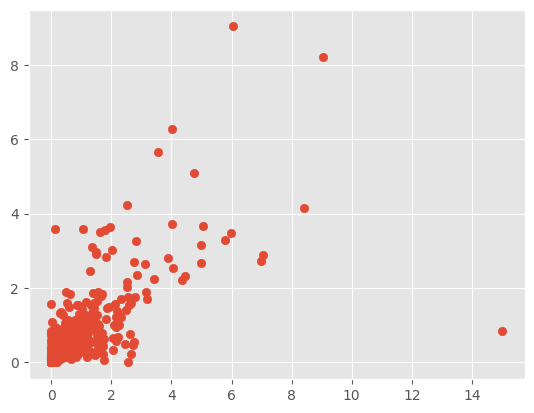

In [ ]:
plt.scatter(NA_test_y, NA_xgb_test_predictions)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

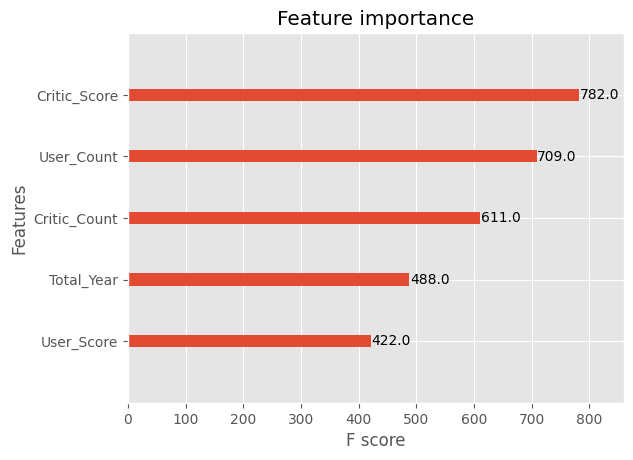

In [ ]:
plot_importance(NA_xgb, max_num_features = 5)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

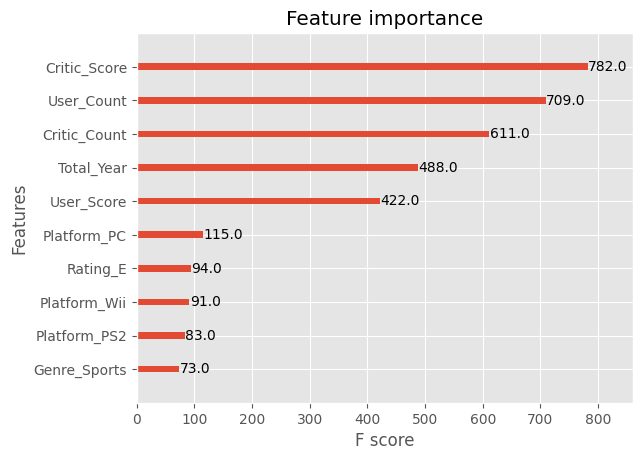

In [ ]:
plot_importance(NA_xgb, max_num_features = 10)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

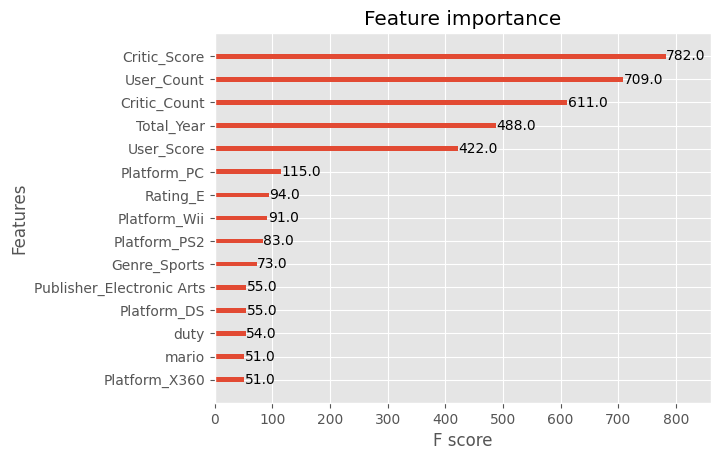

In [ ]:
plot_importance(NA_xgb, max_num_features = 15)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


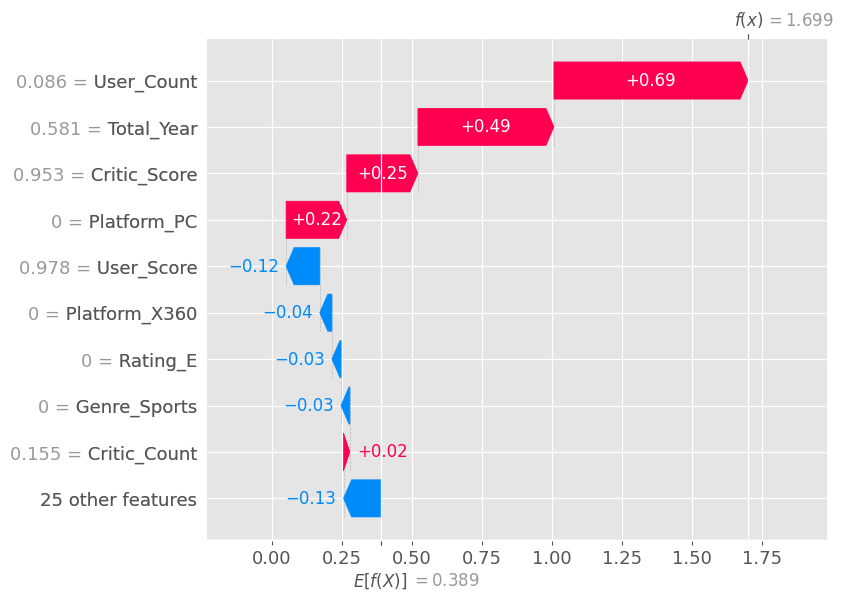

In [ ]:
# https://github.com/slundberg/shap
explainer = shap.Explainer(NA_xgb)
shap_values = explainer(NA_selected_test_X)

# This plot is not useful (?)
shap.plots.waterfall(shap_values[0])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


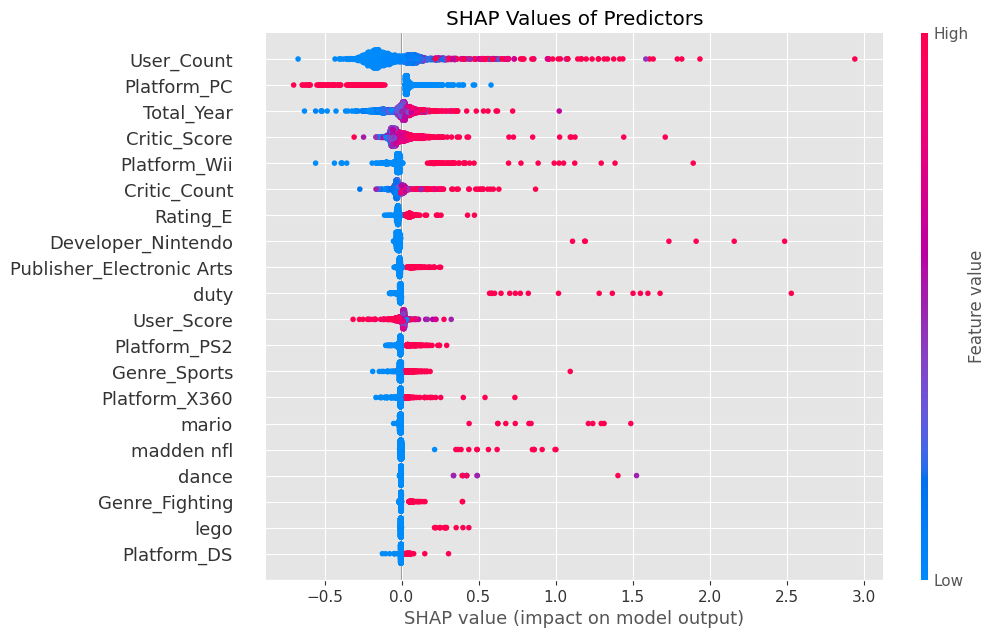

In [ ]:
shap.summary_plot(shap_values, NA_selected_test_X, show = False)
plt.title("SHAP Values of Predictors")
plt.gcf().set_size_inches(12,6)

#### Log Transform

In [ ]:
# test_params = {
#  'max_depth': [3, 6, 10],
#  'eta': [0.03, 0.1, 0.2, 0.3],
#  'min_child_weight': [1, 5, 10, 20],
#  'colsample_bytree': [0.5, 0.8, 1]
# }

# xgb_model = XGBRegressor()

# cv_model = GridSearchCV(estimator = xgb_model, param_grid = test_params)
# cv_model.fit(NA_selected_train_X, np.log(NA_train_y["NA_Sales"].apply(lambda x: 0.01 if x == 0 else x)))
# cv_model.best_params_

In [ ]:
NA_xgb = XGBRegressor(colsample_bytree = 0.8, eta = 0.1, max_depth = 6, min_child_weight = 1)
NA_xgb.fit(NA_selected_train_X, np.log(NA_train_y["NA_Sales"].apply(lambda x: 0.01 if x == 0 else x)))
NA_xgb_train_predictions = np.exp(NA_xgb.predict(NA_selected_train_X))
NA_xgb_test_predictions = np.exp(NA_xgb.predict(NA_selected_test_X))

In [ ]:
NA_xgb_train_predictions = pd.DataFrame(NA_xgb_train_predictions, columns = ["NA_Sales"])
NA_xgb_test_predictions = pd.DataFrame(NA_xgb_test_predictions, columns = ["NA_Sales"])

In [ ]:
NA_xgb_train_predictions["NA_Sales"] = NA_xgb_train_predictions["NA_Sales"].apply(lambda x: max(0, x))
NA_xgb_test_predictions["NA_Sales"] = NA_xgb_test_predictions["NA_Sales"].apply(lambda x: max(0, x))

In [ ]:
train_n = NA_selected_train_X.shape[0]
train_p = NA_selected_train_X.shape[1]
train_mape = mean_absolute_percentage_error(NA_train_y["NA_Sales"].apply(lambda x: 0.01 if x == 0 else x), 
                                            NA_xgb_train_predictions)
train_mse = mean_squared_error(NA_train_y, NA_xgb_train_predictions, squared = True)
train_r2 = r2_score(NA_train_y, NA_xgb_train_predictions)
train_adj_r2 = 1 - (1 - train_r2) * (train_n - 1) / (train_n - train_p - 1)

In [ ]:
test_n = NA_selected_test_X.shape[0]
test_p = NA_selected_test_X.shape[1]
test_mape = mean_absolute_percentage_error(NA_test_y["NA_Sales"].apply(lambda x: 0.01 if x == 0 else x), 
                                           NA_xgb_test_predictions)
test_mse = mean_squared_error(NA_test_y, NA_xgb_test_predictions, squared = True)
test_r2 = r2_score(NA_test_y, NA_xgb_test_predictions)
test_adj_r2 = 1 - (1 - test_r2) * (test_n - 1) / (test_n - test_p - 1)

In [ ]:
print("Train MAPE: {:.2f}%".format(train_mape * 100))
print("Train MSE:", train_mse)
print("Train R2:", train_r2)
print("Train Adj R2:", train_adj_r2)
print()
print("Test MAPE: {:.2f}%".format(test_mape * 100))
print("Test MSE:", test_mse)
print("Test R2:", test_r2)
print("Test Adj R2:", test_adj_r2)

Train MAPE: 76.89%
Train MSE: 0.25162497706624826
Train R2: 0.7422206219409166
Train Adj R2: 0.7406050461152929

Test MAPE: 111.61%
Test MSE: 0.403987216418411
Test R2: 0.4776196333781947
Test Adj R2: 0.464265548817938


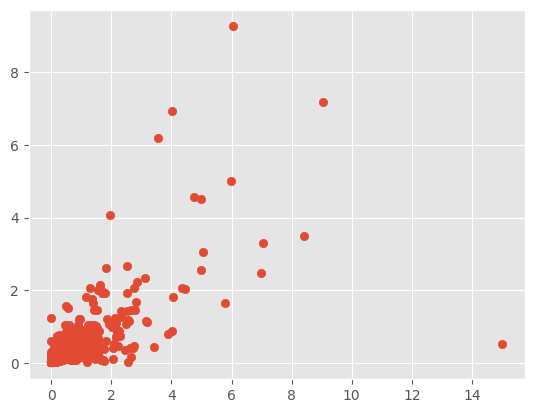

In [ ]:
plt.scatter(NA_test_y, NA_xgb_test_predictions)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

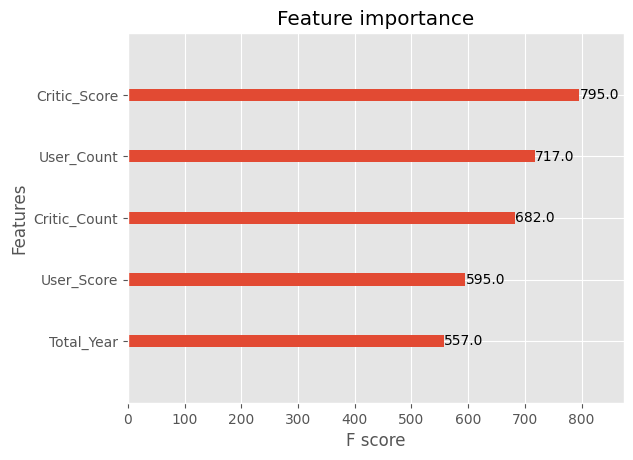

In [ ]:
plot_importance(NA_xgb, max_num_features = 5)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

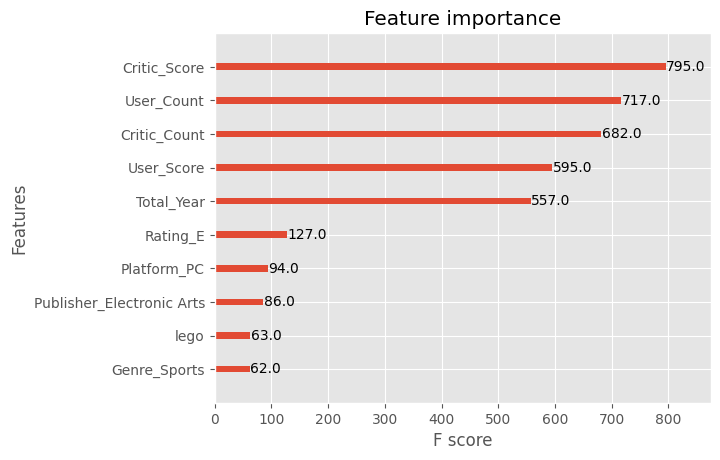

In [ ]:
plot_importance(NA_xgb, max_num_features = 10)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

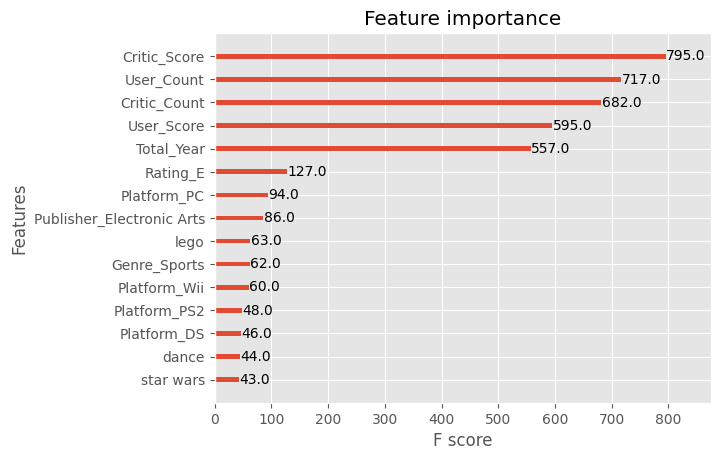

In [ ]:
plot_importance(NA_xgb, max_num_features = 15)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


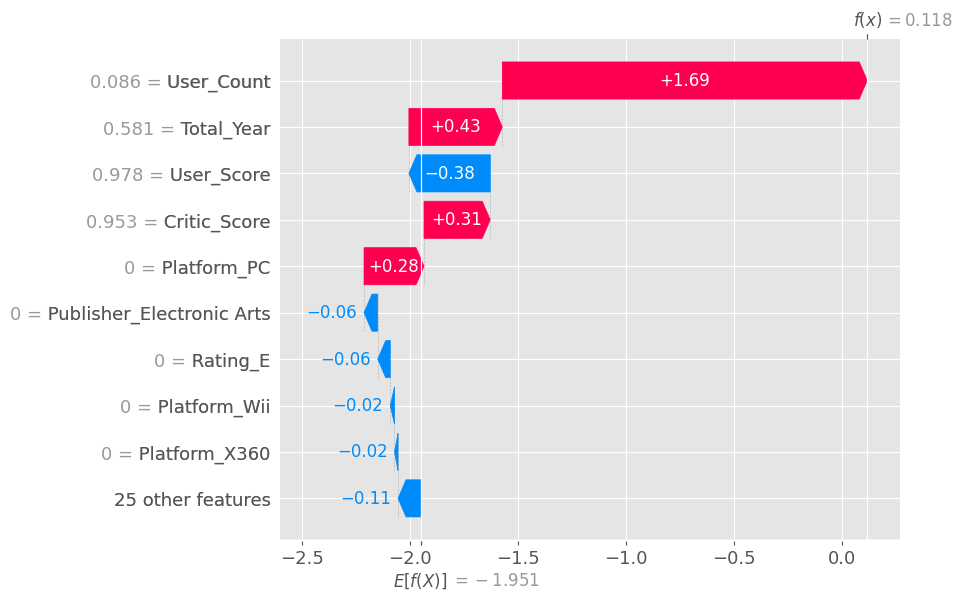

In [ ]:
# https://github.com/slundberg/shap
explainer = shap.Explainer(NA_xgb)
shap_values = explainer(NA_selected_test_X)

# This plot is not useful (?)
shap.plots.waterfall(shap_values[0])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


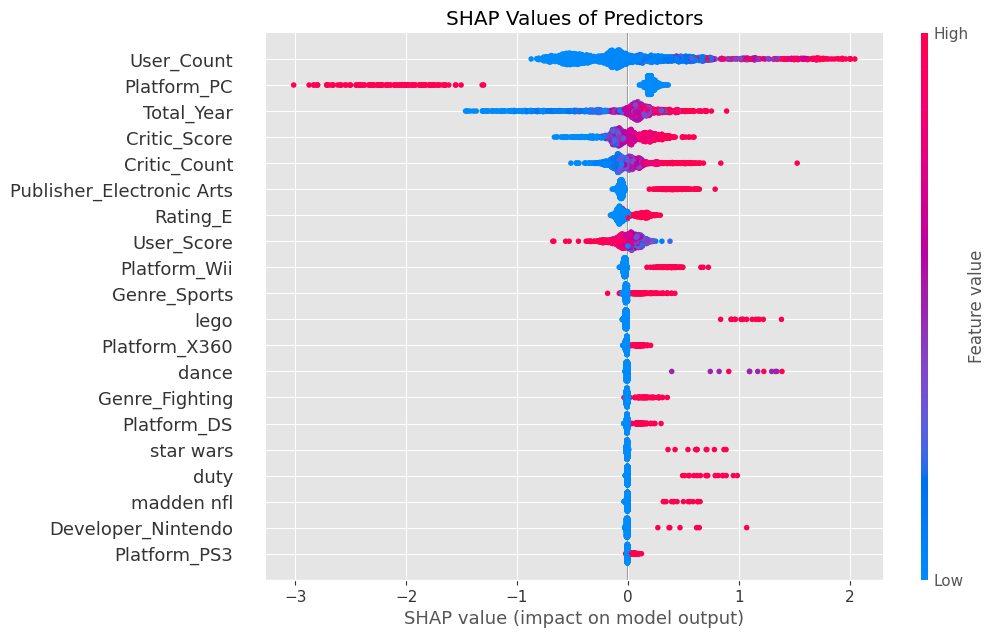

In [ ]:
shap.summary_plot(shap_values, NA_selected_test_X, show = False)
plt.title("SHAP Values of Predictors")
plt.gcf().set_size_inches(12,6)

#### Sales / Year

In [ ]:
# test_params = {
#  'max_depth': [3, 6, 10],
#  'eta': [0.03, 0.1, 0.2, 0.3],
#  'min_child_weight': [1, 5, 10, 20],
#  'colsample_bytree': [0.5, 0.8, 1]
# }

# xgb_model = XGBRegressor()

# cv_model = GridSearchCV(estimator = xgb_model, param_grid = test_params)
# cv_model.fit(NA_selected_train_X.drop(["Total_Year"], axis = 1), NA_train_y["NA_Sales"] / (NA_train_X["Total_Year"] * 31 + 1))
# cv_model.best_params_

In [ ]:
NA_xgb = XGBRegressor(colsample_bytree = 0.5, eta = 0.1, max_depth = 6, min_child_weight = 1)
NA_xgb.fit(NA_selected_train_X.drop(["Total_Year"], axis = 1), NA_train_y["NA_Sales"] / (NA_train_X["Total_Year"] * 31 + 1))
NA_xgb_train_predictions = NA_xgb.predict(NA_selected_train_X.drop(["Total_Year"], axis = 1)) * (NA_train_X["Total_Year"] * 31 + 1)
NA_xgb_test_predictions = NA_xgb.predict(NA_selected_test_X.drop(["Total_Year"], axis = 1)) * (NA_test_X["Total_Year"] * 31 + 1)

In [ ]:
NA_xgb_train_predictions = NA_xgb_train_predictions.apply(lambda x: max(0, x))
NA_xgb_test_predictions = NA_xgb_test_predictions.apply(lambda x: max(0, x))

In [ ]:
train_n = NA_selected_train_X.shape[0]
train_p = NA_selected_train_X.shape[1] - 1
train_mape = mean_absolute_percentage_error(NA_train_y["NA_Sales"].apply(lambda x: 0.01 if x == 0 else x), 
                                            NA_xgb_train_predictions)
train_mse = mean_squared_error(NA_train_y, NA_xgb_train_predictions, squared = True)
train_r2 = r2_score(NA_train_y, NA_xgb_train_predictions)
train_adj_r2 = 1 - (1 - train_r2) * (train_n - 1) / (train_n - train_p - 1)

In [ ]:
test_n = NA_selected_test_X.shape[0]
test_p = NA_selected_test_X.shape[1] - 1
test_mape = mean_absolute_percentage_error(NA_test_y["NA_Sales"].apply(lambda x: 0.01 if x == 0 else x), 
                                           NA_xgb_test_predictions)
test_mse = mean_squared_error(NA_test_y, NA_xgb_test_predictions, squared = True)
test_r2 = r2_score(NA_test_y, NA_xgb_test_predictions)
test_adj_r2 = 1 - (1 - test_r2) * (test_n - 1) / (test_n - test_p - 1)

In [ ]:
print("Train MAPE: {:.2f}%".format(train_mape * 100))
print("Train MSE:", train_mse)
print("Train R2:", train_r2)
print("Train Adj R2:", train_adj_r2)
print()
print("Test MAPE: {:.2f}%".format(test_mape * 100))
print("Test MSE:", test_mse)
print("Test R2:", test_r2)
print("Test Adj R2:", test_adj_r2)

Train MAPE: 209.37%
Train MSE: 0.09013695391944615
Train R2: 0.907658420112334
Train Adj R2: 0.9070968144845616

Test MAPE: 244.09%
Test MSE: 0.46706201484696097
Test R2: 0.3960600320130442
Test Adj R2: 0.38108631379849156


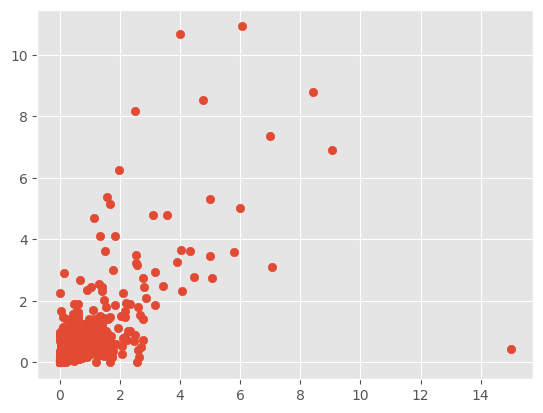

In [ ]:
plt.scatter(NA_test_y, NA_xgb_test_predictions)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

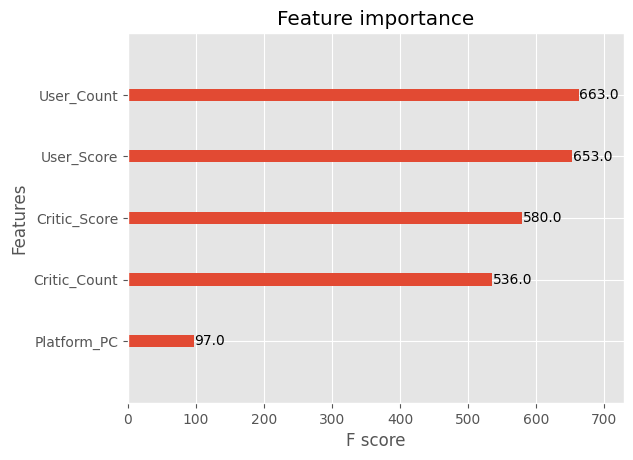

In [ ]:
plot_importance(NA_xgb, max_num_features = 5)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

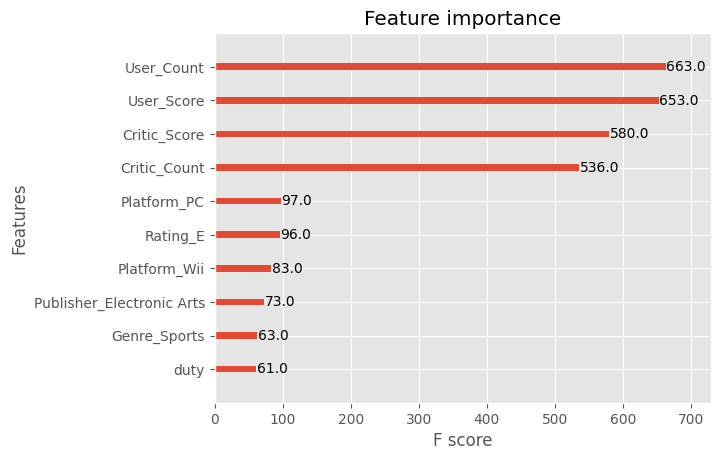

In [ ]:
plot_importance(NA_xgb, max_num_features = 10)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

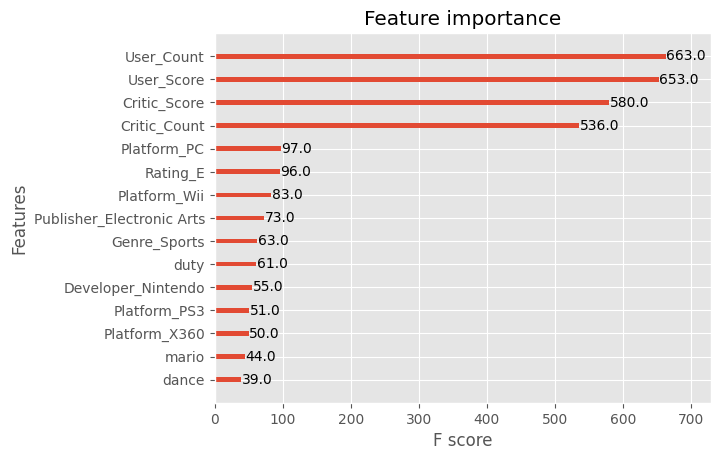

In [ ]:
plot_importance(NA_xgb, max_num_features = 15)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


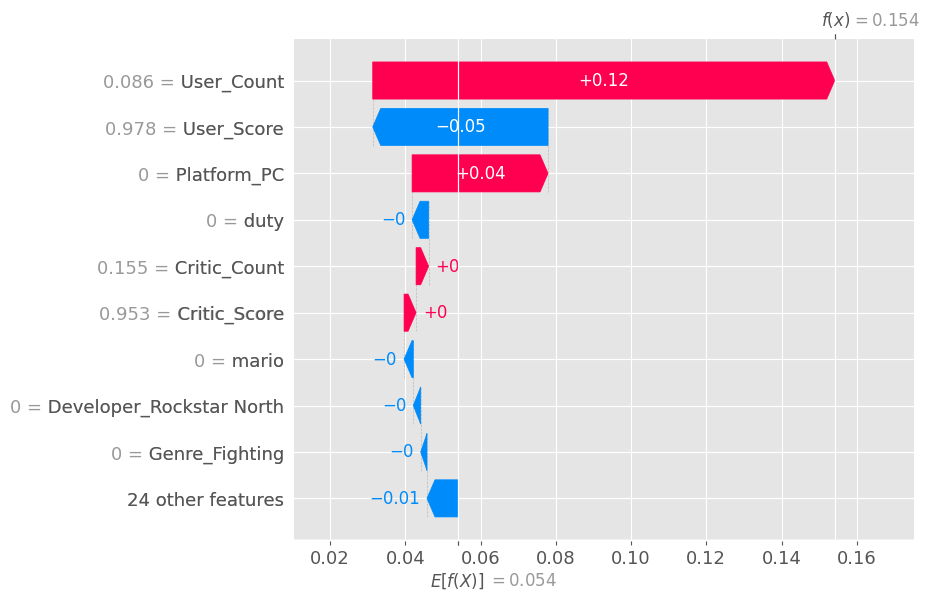

In [ ]:
# https://github.com/slundberg/shap
explainer = shap.Explainer(NA_xgb)
shap_values = explainer(NA_selected_test_X.drop(["Total_Year"], axis = 1))

# This plot is not useful (?)
shap.plots.waterfall(shap_values[0])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


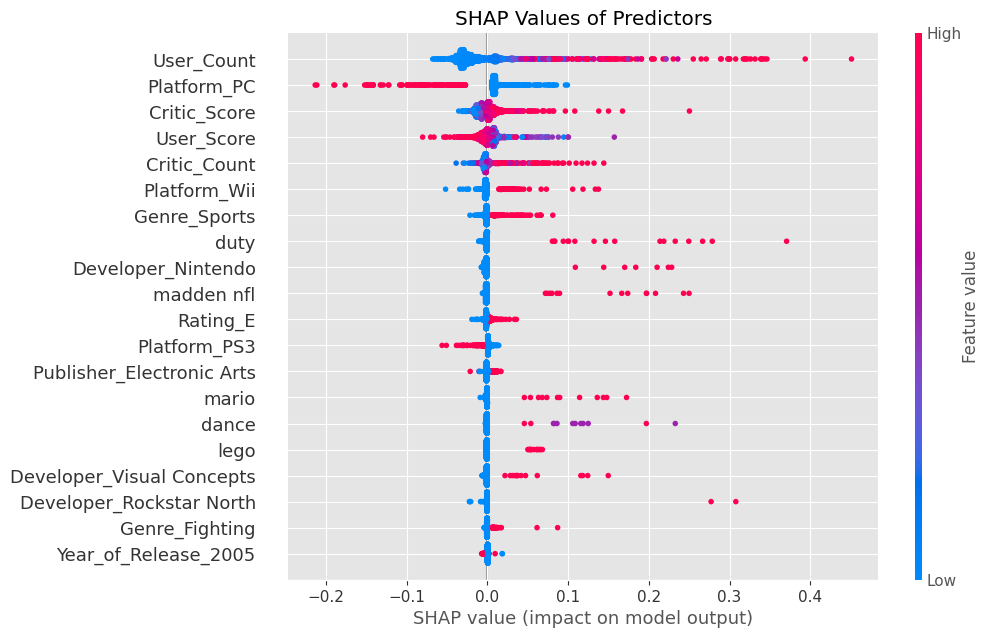

In [ ]:
shap.summary_plot(shap_values, NA_selected_test_X.drop(["Total_Year"], axis = 1), show = False)
plt.title("SHAP Values of Predictors")
plt.gcf().set_size_inches(12,6)

#### Log Sales / Year

In [ ]:
# test_params = {
#  'max_depth': [3, 6, 10],
#  'eta': [0.03, 0.1, 0.2, 0.3],
#  'min_child_weight': [1, 5, 10, 20],
#  'colsample_bytree': [0.5, 0.8, 1]
# }

# xgb_model = XGBRegressor()

# cv_model = GridSearchCV(estimator = xgb_model, param_grid = test_params)
# cv_model.fit(NA_selected_train_X.drop(["Total_Year"], axis = 1), 
#            np.log(NA_train_y["NA_Sales"].apply(lambda x: 0.01 if x == 0 else x) / (NA_train_X["Total_Year"] * 31 + 1)))
# cv_model.best_params_

In [ ]:
NA_xgb = XGBRegressor(colsample_bytree = 0.8, eta = 0.1, max_depth = 6, min_child_weight = 1)
NA_xgb.fit(NA_selected_train_X.drop(["Total_Year"], axis = 1), 
           np.log(NA_train_y["NA_Sales"].apply(lambda x: 0.01 if x == 0 else x) / (NA_train_X["Total_Year"] * 31 + 1)))
NA_xgb_train_predictions = np.exp(NA_xgb.predict(NA_selected_train_X.drop(["Total_Year"], axis = 1))) * (NA_train_X["Total_Year"] * 31 + 1)
NA_xgb_test_predictions = np.exp(NA_xgb.predict(NA_selected_test_X.drop(["Total_Year"], axis = 1))) * (NA_test_X["Total_Year"] * 31 + 1)

In [ ]:
NA_xgb_train_predictions = NA_xgb_train_predictions.apply(lambda x: max(0, x))
NA_xgb_test_predictions = NA_xgb_test_predictions.apply(lambda x: max(0, x))

In [ ]:
train_n = NA_selected_train_X.shape[0]
train_p = NA_selected_train_X.shape[1] - 1
train_mape = mean_absolute_percentage_error(NA_train_y["NA_Sales"].apply(lambda x: 0.01 if x == 0 else x), 
                                            NA_xgb_train_predictions)
train_mse = mean_squared_error(NA_train_y, NA_xgb_train_predictions, squared = True)
train_r2 = r2_score(NA_train_y, NA_xgb_train_predictions)
train_adj_r2 = 1 - (1 - train_r2) * (train_n - 1) / (train_n - train_p - 1)

In [ ]:
test_n = NA_selected_test_X.shape[0]
test_p = NA_selected_test_X.shape[1] - 1
test_mape = mean_absolute_percentage_error(NA_test_y["NA_Sales"].apply(lambda x: 0.01 if x == 0 else x), 
                                           NA_xgb_test_predictions)
test_mse = mean_squared_error(NA_test_y, NA_xgb_test_predictions, squared = True)
test_r2 = r2_score(NA_test_y, NA_xgb_test_predictions)
test_adj_r2 = 1 - (1 - test_r2) * (test_n - 1) / (test_n - test_p - 1)

In [ ]:
print("Train MAPE: {:.2f}%".format(train_mape * 100))
print("Train MSE:", train_mse)
print("Train R2:", train_r2)
print("Train Adj R2:", train_adj_r2)
print()
print("Test MAPE: {:.2f}%".format(test_mape * 100))
print("Test MSE:", test_mse)
print("Test R2:", test_r2)
print("Test Adj R2:", test_adj_r2)

Train MAPE: 84.78%
Train MSE: 0.1926664219894829
Train R2: 0.8026212222157826
Train Adj R2: 0.801420798392178

Test MAPE: 124.81%
Test MSE: 0.4501935732236023
Test R2: 0.41787196655312686
Test Adj R2: 0.40343904010403087


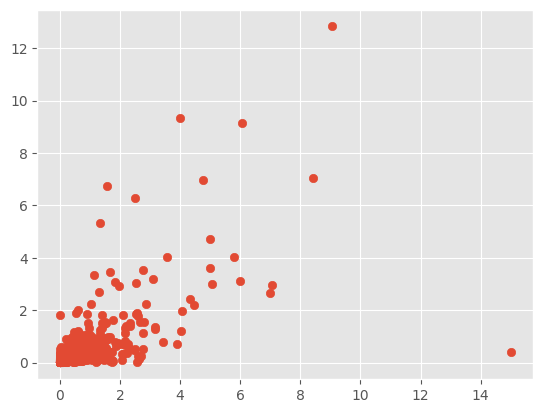

In [ ]:
plt.scatter(NA_test_y, NA_xgb_test_predictions)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

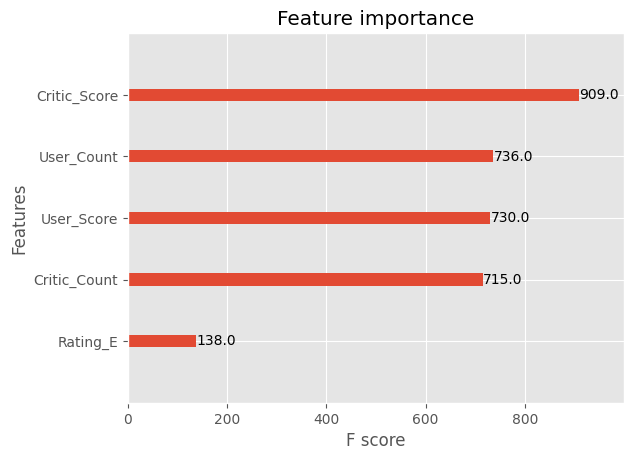

In [ ]:
plot_importance(NA_xgb, max_num_features = 5)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

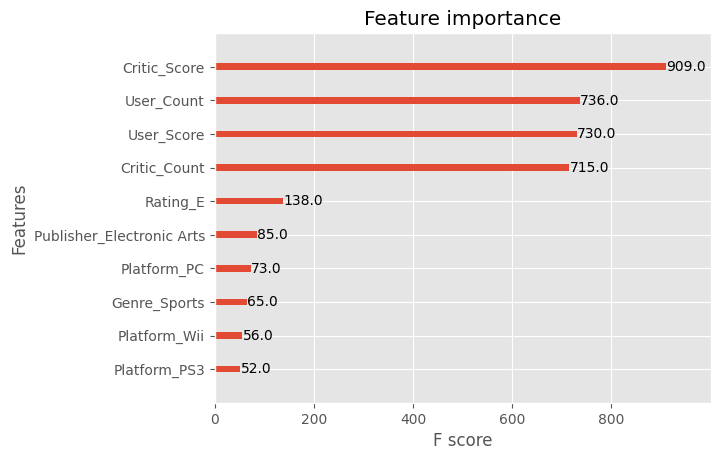

In [ ]:
plot_importance(NA_xgb, max_num_features = 10)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

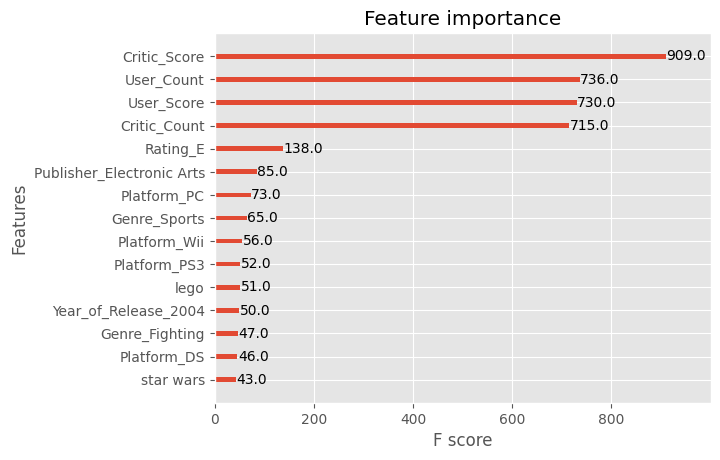

In [ ]:
plot_importance(NA_xgb, max_num_features = 15)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


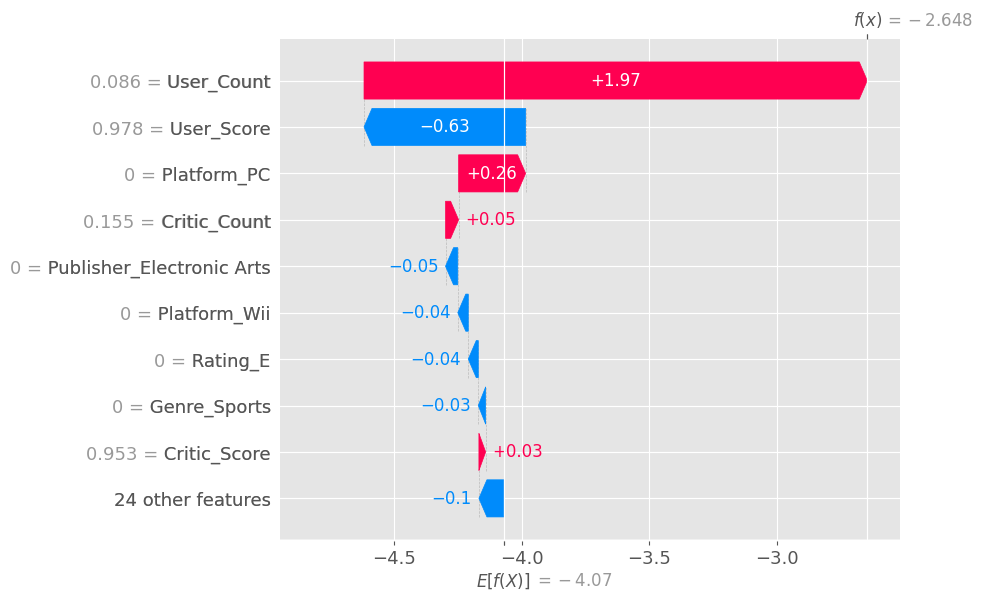

In [ ]:
# https://github.com/slundberg/shap
explainer = shap.Explainer(NA_xgb)
shap_values = explainer(NA_selected_test_X.drop(["Total_Year"], axis = 1))

# This plot is not useful (?)
shap.plots.waterfall(shap_values[0])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


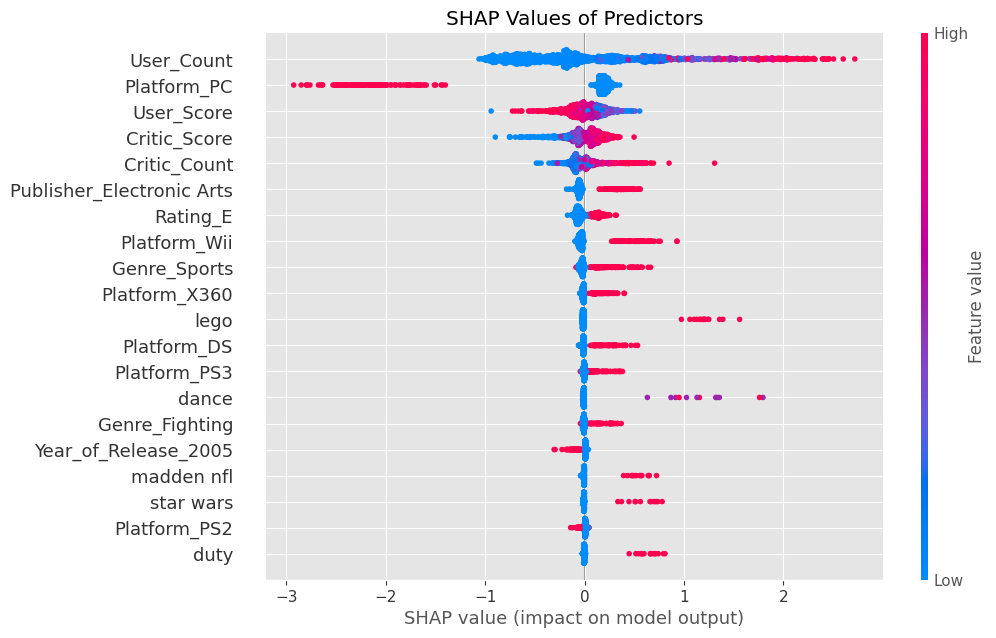

In [ ]:
shap.summary_plot(shap_values, NA_selected_test_X.drop(["Total_Year"], axis = 1), show = False)
plt.title("SHAP Values of Predictors")
plt.gcf().set_size_inches(12,6)

#### Stacking Full

In [ ]:
NA_xgb = XGBRegressor(colsample_bytree = 0.5, eta = 0.1, max_depth = 6, min_child_weight = 1)
NA_xgb.fit(NA_selected_train_X, NA_train_y)
NA_ori_xgb_train_predictions = NA_xgb.predict(NA_selected_train_X)
NA_ori_xgb_test_predictions = NA_xgb.predict(NA_selected_test_X)

In [ ]:
NA_ori_xgb_train_predictions = pd.DataFrame(NA_ori_xgb_train_predictions, columns = ["NA_ori"])
NA_ori_xgb_test_predictions = pd.DataFrame(NA_ori_xgb_test_predictions, columns = ["NA_ori"])

In [ ]:
NA_ori_xgb_train_predictions

NA_ori
0     0.511188
1     0.378362
2     0.362636
3     0.333176
4     0.343561
...        ...
5455  0.173760
5456  0.153732
5457  0.112053
5458  0.125455
5459  0.330521

[5460 rows x 1 columns]

In [ ]:
NA_xgb = XGBRegressor(colsample_bytree = 0.8, eta = 0.1, max_depth = 6, min_child_weight = 1)
NA_xgb.fit(NA_selected_train_X, np.log(NA_train_y["NA_Sales"].apply(lambda x: 0.01 if x == 0 else x)))
NA_log_xgb_train_predictions = np.exp(NA_xgb.predict(NA_selected_train_X))
NA_log_xgb_test_predictions = np.exp(NA_xgb.predict(NA_selected_test_X))

In [ ]:
NA_log_xgb_train_predictions = pd.DataFrame(NA_log_xgb_train_predictions, columns = ["NA_log"])
NA_log_xgb_test_predictions = pd.DataFrame(NA_log_xgb_test_predictions, columns = ["NA_log"])

In [ ]:
NA_log_xgb_train_predictions

NA_log
0     0.309656
1     0.398406
2     0.255934
3     0.203221
4     0.203439
...        ...
5455  0.092211
5456  0.124705
5457  0.066451
5458  0.097557
5459  0.331518

[5460 rows x 1 columns]

In [ ]:
NA_xgb = XGBRegressor(colsample_bytree = 0.5, eta = 0.1, max_depth = 6, min_child_weight = 1)
NA_xgb.fit(NA_selected_train_X.drop(["Total_Year"], axis = 1), NA_train_y["NA_Sales"] / (NA_train_X["Total_Year"] * 31 + 1))
NA_sy_xgb_train_predictions = NA_xgb.predict(NA_selected_train_X.drop(["Total_Year"], axis = 1)) * (NA_train_X["Total_Year"] * 31 + 1)
NA_sy_xgb_test_predictions = NA_xgb.predict(NA_selected_test_X.drop(["Total_Year"], axis = 1)) * (NA_test_X["Total_Year"] * 31 + 1)

In [ ]:
NA_sy_xgb_train_predictions = NA_sy_xgb_train_predictions.to_frame()
NA_sy_xgb_test_predictions = NA_sy_xgb_test_predictions.to_frame()
NA_sy_xgb_train_predictions.columns = ["NA_sy"]
NA_sy_xgb_test_predictions.columns = ["NA_sy"]

In [ ]:
NA_sy_xgb_train_predictions

NA_sy
0     0.439837
1     0.439867
2     0.295966
3     0.324316
4     0.589836
...        ...
5455  0.197488
5456  0.157185
5457  0.136488
5458  0.114241
5459  0.497884

[5460 rows x 1 columns]

In [ ]:
NA_xgb = XGBRegressor(colsample_bytree = 0.8, eta = 0.1, max_depth = 6, min_child_weight = 1)
NA_xgb.fit(NA_selected_train_X.drop(["Total_Year"], axis = 1), 
           np.log(NA_train_y["NA_Sales"].apply(lambda x: 0.01 if x == 0 else x) / (NA_train_X["Total_Year"] * 31 + 1)))
NA_log_sy_xgb_train_predictions = np.exp(NA_xgb.predict(NA_selected_train_X.drop(["Total_Year"], axis = 1))) * (NA_train_X["Total_Year"] * 31 + 1)
NA_log_sy_xgb_test_predictions = np.exp(NA_xgb.predict(NA_selected_test_X.drop(["Total_Year"], axis = 1))) * (NA_test_X["Total_Year"] * 31 + 1)

In [ ]:
NA_log_sy_xgb_train_predictions = NA_log_sy_xgb_train_predictions.to_frame()
NA_log_sy_xgb_test_predictions = NA_log_sy_xgb_test_predictions.to_frame()
NA_log_sy_xgb_train_predictions.columns = ["NA_log_sy"]
NA_log_sy_xgb_test_predictions.columns = ["NA_log_sy"]

In [ ]:
NA_log_sy_xgb_train_predictions

NA_log_sy
0      0.273508
1      0.384763
2      0.245610
3      0.197269
4      0.181756
...         ...
5455   0.124560
5456   0.092787
5457   0.070542
5458   0.090892
5459   0.412938

[5460 rows x 1 columns]

In [ ]:
NA_train_stack = pd.concat([NA_ori_xgb_train_predictions, NA_log_xgb_train_predictions, 
           NA_sy_xgb_train_predictions, NA_log_sy_xgb_train_predictions, NA_train_y], axis = 1)
NA_test_stack = pd.concat([NA_ori_xgb_test_predictions, NA_log_xgb_test_predictions, 
           NA_sy_xgb_test_predictions, NA_log_sy_xgb_test_predictions, NA_test_y], axis = 1)

In [ ]:
NA_train_stack

NA_ori    NA_log     NA_sy  NA_log_sy  NA_Sales
0     0.511188  0.309656  0.439837   0.273508      0.36
1     0.378362  0.398406  0.439867   0.384763      0.63
2     0.362636  0.255934  0.295966   0.245610      0.39
3     0.333176  0.203221  0.324316   0.197269      0.09
4     0.343561  0.203439  0.589836   0.181756      0.09
...        ...       ...       ...        ...       ...
5455  0.173760  0.092211  0.197488   0.124560      0.22
5456  0.153732  0.124705  0.157185   0.092787      0.10
5457  0.112053  0.066451  0.136488   0.070542      0.05
5458  0.125455  0.097557  0.114241   0.090892      0.08
5459  0.330521  0.331518  0.497884   0.412938      0.96

[5460 rows x 5 columns]

In [ ]:
NA_test_stack

NA_ori    NA_log     NA_sy  NA_log_sy  NA_Sales
0     1.698993  1.125487  2.928539   1.345288      3.18
1     0.157163  0.125185  0.162345   0.097139      0.17
2     0.229563  0.127331  0.182539   0.097782      0.17
3     0.161063  0.097968  0.137160   0.075986      0.36
4     0.094740  0.053247  0.112389   0.076690      0.05
...        ...       ...       ...        ...       ...
1360  0.301319  0.154774  0.259315   0.140335      0.60
1361  0.194914  0.074919  0.190906   0.069601      0.02
1362  0.032379  0.035516  0.098722   0.049448      0.00
1363  0.097158  0.041356  0.121755   0.072216      0.03
1364  0.535275  0.506382  0.882739   0.583994      0.44

[1365 rows x 5 columns]

In [ ]:
lr = LinearRegression()
lr.fit(NA_train_stack.drop(["NA_Sales"], axis = 1), NA_train_stack['NA_Sales'])

LinearRegression()

In [ ]:
lr.coef_

array([ 1.10768106, -0.0654572 , -0.10033329,  0.12022489])

In [ ]:
lr.intercept_

-0.017609029529915887

In [ ]:
NA_train_stack_pred = lr.predict(NA_train_stack.drop(["NA_Sales"], axis = 1))
NA_test_stack_pred = lr.predict(NA_test_stack.drop(["NA_Sales"], axis = 1))

In [ ]:
train_n = NA_selected_train_X.shape[0]
train_p = NA_selected_train_X.shape[1] - 1
train_mape = mean_absolute_percentage_error(NA_train_y["NA_Sales"].apply(lambda x: 0.01 if x == 0 else x), 
                                            NA_train_stack_pred)
train_mse = mean_squared_error(NA_train_y, NA_train_stack_pred, squared = True)
train_r2 = r2_score(NA_train_y, NA_train_stack_pred)
train_adj_r2 = 1 - (1 - train_r2) * (train_n - 1) / (train_n - train_p - 1)

In [ ]:
test_n = NA_selected_test_X.shape[0]
test_p = NA_selected_test_X.shape[1] - 1
test_mape = mean_absolute_percentage_error(NA_test_y["NA_Sales"].apply(lambda x: 0.01 if x == 0 else x), 
                                           NA_test_stack_pred)
test_mse = mean_squared_error(NA_test_y, NA_test_stack_pred, squared = True)
test_r2 = r2_score(NA_test_y, NA_test_stack_pred)
test_adj_r2 = 1 - (1 - test_r2) * (test_n - 1) / (test_n - test_p - 1)

In [ ]:
print("Train MAPE: {:.2f}%".format(train_mape * 100))
print("Train MSE:", train_mse)
print("Train R2:", train_r2)
print("Train Adj R2:", train_adj_r2)
print()
print("Test MAPE: {:.2f}%".format(test_mape * 100))
print("Test MSE:", test_mse)
print("Test R2:", test_r2)
print("Test Adj R2:", test_adj_r2)

Train MAPE: 186.24%
Train MSE: 0.061992581325896697
Train R2: 0.9364911653652751
Train Adj R2: 0.9361049155416581

Test MAPE: 230.47%
Test MSE: 0.37178345288965053
Test R2: 0.5192610841842336
Test Adj R2: 0.5073419375111153


In [ ]:
NA_train_stack_pred = (NA_train_stack["NA_ori"] + NA_train_stack["NA_log"] + NA_train_stack["NA_sy"] + NA_train_stack["NA_log_sy"]) / 4
NA_test_stack_pred = (NA_test_stack["NA_ori"] + NA_test_stack["NA_log"] + NA_test_stack["NA_sy"] + NA_test_stack["NA_log_sy"]) / 4

In [ ]:
NA_train_stack_pred = NA_train_stack_pred.apply(lambda x: max(0, x))
NA_test_stack_pred = NA_test_stack_pred.apply(lambda x: max(0, x))

In [ ]:
train_n = NA_selected_train_X.shape[0]
train_p = NA_selected_train_X.shape[1] - 1
train_mape = mean_absolute_percentage_error(NA_train_y["NA_Sales"].apply(lambda x: 0.01 if x == 0 else x), 
                                            NA_train_stack_pred)
train_mse = mean_squared_error(NA_train_y, NA_train_stack_pred, squared = True)
train_r2 = r2_score(NA_train_y, NA_train_stack_pred)
train_adj_r2 = 1 - (1 - train_r2) * (train_n - 1) / (train_n - train_p - 1)

In [ ]:
test_n = NA_selected_test_X.shape[0]
test_p = NA_selected_test_X.shape[1] - 1
test_mape = mean_absolute_percentage_error(NA_test_y["NA_Sales"].apply(lambda x: 0.01 if x == 0 else x), 
                                           NA_test_stack_pred)
test_mse = mean_squared_error(NA_test_y, NA_test_stack_pred, squared = True)
test_r2 = r2_score(NA_test_y, NA_test_stack_pred)
test_adj_r2 = 1 - (1 - test_r2) * (test_n - 1) / (test_n - test_p - 1)

In [ ]:
print("Train MAPE: {:.2f}%".format(train_mape * 100))
print("Train MSE:", train_mse)
print("Train R2:", train_r2)
print("Train Adj R2:", train_adj_r2)
print()
print("Test MAPE: {:.2f}%".format(test_mape * 100))
print("Test MSE:", test_mse)
print("Test R2:", test_r2)
print("Test Adj R2:", test_adj_r2)

Train MAPE: 135.46%
Train MSE: 0.11526971807088736
Train R2: 0.8819109431034899
Train Adj R2: 0.8811927457430799

Test MAPE: 170.43%
Test MSE: 0.3684870648485352
Test R2: 0.5235235170619662
Test Adj R2: 0.5117100505428414


#### Stacking Partial

In [ ]:
NA_xgb = XGBRegressor(colsample_bytree = 0.5, eta = 0.1, max_depth = 6, min_child_weight = 1)
NA_xgb.fit(NA_selected_train_X, NA_train_y)
NA_ori_xgb_train_predictions = NA_xgb.predict(NA_selected_train_X)
NA_ori_xgb_test_predictions = NA_xgb.predict(NA_selected_test_X)

In [ ]:
NA_ori_xgb_train_predictions = pd.DataFrame(NA_ori_xgb_train_predictions, columns = ["NA_ori"])
NA_ori_xgb_test_predictions = pd.DataFrame(NA_ori_xgb_test_predictions, columns = ["NA_ori"])

In [ ]:
NA_ori_xgb_train_predictions

NA_ori
0     0.511188
1     0.378362
2     0.362636
3     0.333176
4     0.343561
...        ...
5455  0.173760
5456  0.153732
5457  0.112053
5458  0.125455
5459  0.330521

[5460 rows x 1 columns]

In [ ]:
NA_xgb = XGBRegressor(colsample_bytree = 0.8, eta = 0.1, max_depth = 6, min_child_weight = 1)
NA_xgb.fit(NA_selected_train_X, np.log(NA_train_y["NA_Sales"].apply(lambda x: 0.01 if x == 0 else x)))
NA_log_xgb_train_predictions = np.exp(NA_xgb.predict(NA_selected_train_X))
NA_log_xgb_test_predictions = np.exp(NA_xgb.predict(NA_selected_test_X))

In [ ]:
NA_log_xgb_train_predictions = pd.DataFrame(NA_log_xgb_train_predictions, columns = ["NA_log"])
NA_log_xgb_test_predictions = pd.DataFrame(NA_log_xgb_test_predictions, columns = ["NA_log"])

In [ ]:
NA_log_xgb_train_predictions

NA_log
0     0.309656
1     0.398406
2     0.255934
3     0.203221
4     0.203439
...        ...
5455  0.092211
5456  0.124705
5457  0.066451
5458  0.097557
5459  0.331518

[5460 rows x 1 columns]

In [ ]:
NA_train_stack = pd.concat([NA_ori_xgb_train_predictions, NA_log_xgb_train_predictions, NA_train_y], axis = 1)
NA_test_stack = pd.concat([NA_ori_xgb_test_predictions, NA_log_xgb_test_predictions, NA_test_y], axis = 1)

In [ ]:
NA_train_stack

NA_ori    NA_log  NA_Sales
0     0.511188  0.309656      0.36
1     0.378362  0.398406      0.63
2     0.362636  0.255934      0.39
3     0.333176  0.203221      0.09
4     0.343561  0.203439      0.09
...        ...       ...       ...
5455  0.173760  0.092211      0.22
5456  0.153732  0.124705      0.10
5457  0.112053  0.066451      0.05
5458  0.125455  0.097557      0.08
5459  0.330521  0.331518      0.96

[5460 rows x 3 columns]

In [ ]:
NA_test_stack

NA_ori    NA_log  NA_Sales
0     1.698993  1.125487      3.18
1     0.157163  0.125185      0.17
2     0.229563  0.127331      0.17
3     0.161063  0.097968      0.36
4     0.094740  0.053247      0.05
...        ...       ...       ...
1360  0.301319  0.154774      0.60
1361  0.194914  0.074919      0.02
1362  0.032379  0.035516      0.00
1363  0.097158  0.041356      0.03
1364  0.535275  0.506382      0.44

[1365 rows x 3 columns]

In [ ]:
lr = LinearRegression()
lr.fit(NA_train_stack.drop(["NA_Sales"], axis = 1), NA_train_stack['NA_Sales'])

LinearRegression()

In [ ]:
lr.coef_

array([1.0535342 , 0.00231458], dtype=float32)

In [ ]:
lr.intercept_

-0.021089405

In [ ]:
NA_train_stack_pred = lr.predict(NA_train_stack.drop(["NA_Sales"], axis = 1))
NA_test_stack_pred = lr.predict(NA_test_stack.drop(["NA_Sales"], axis = 1))

In [ ]:
train_n = NA_selected_train_X.shape[0]
train_p = NA_selected_train_X.shape[1] - 1
train_mape = mean_absolute_percentage_error(NA_train_y["NA_Sales"].apply(lambda x: 0.01 if x == 0 else x), 
                                            NA_train_stack_pred)
train_mse = mean_squared_error(NA_train_y, NA_train_stack_pred, squared = True)
train_r2 = r2_score(NA_train_y, NA_train_stack_pred)
train_adj_r2 = 1 - (1 - train_r2) * (train_n - 1) / (train_n - train_p - 1)

In [ ]:
test_n = NA_selected_test_X.shape[0]
test_p = NA_selected_test_X.shape[1] - 1
test_mape = mean_absolute_percentage_error(NA_test_y["NA_Sales"].apply(lambda x: 0.01 if x == 0 else x), 
                                           NA_test_stack_pred)
test_mse = mean_squared_error(NA_test_y, NA_test_stack_pred, squared = True)
test_r2 = r2_score(NA_test_y, NA_test_stack_pred)
test_adj_r2 = 1 - (1 - test_r2) * (test_n - 1) / (test_n - test_p - 1)

In [ ]:
print("Train MAPE: {:.2f}%".format(train_mape * 100))
print("Train MSE:", train_mse)
print("Train R2:", train_r2)
print("Train Adj R2:", train_adj_r2)
print()
print("Test MAPE: {:.2f}%".format(test_mape * 100))
print("Test MSE:", test_mse)
print("Test R2:", test_r2)
print("Test Adj R2:", test_adj_r2)

Train MAPE: 187.37%
Train MSE: 0.06220737017882128
Train R2: 0.9362711230723101
Train Adj R2: 0.9358835349892629

Test MAPE: 229.40%
Test MSE: 0.3667714457498683
Test R2: 0.5257419182819117
Test Adj R2: 0.5139834534459261


In [ ]:
NA_train_stack_pred = (NA_train_stack["NA_ori"] + NA_train_stack["NA_log"]) / 2
NA_test_stack_pred = (NA_test_stack["NA_ori"] + NA_test_stack["NA_log"]) / 2

In [ ]:
NA_train_stack_pred = NA_train_stack_pred.apply(lambda x: max(0, x))
NA_test_stack_pred = NA_test_stack_pred.apply(lambda x: max(0, x))

In [ ]:
train_n = NA_selected_train_X.shape[0]
train_p = NA_selected_train_X.shape[1] - 1
train_mape = mean_absolute_percentage_error(NA_train_y["NA_Sales"].apply(lambda x: 0.01 if x == 0 else x), 
                                            NA_train_stack_pred)
train_mse = mean_squared_error(NA_train_y, NA_train_stack_pred, squared = True)
train_r2 = r2_score(NA_train_y, NA_train_stack_pred)
train_adj_r2 = 1 - (1 - train_r2) * (train_n - 1) / (train_n - train_p - 1)

In [ ]:
test_n = NA_selected_test_X.shape[0]
test_p = NA_selected_test_X.shape[1] - 1
test_mape = mean_absolute_percentage_error(NA_test_y["NA_Sales"].apply(lambda x: 0.01 if x == 0 else x), 
                                           NA_test_stack_pred)
test_mse = mean_squared_error(NA_test_y, NA_test_stack_pred, squared = True)
test_r2 = r2_score(NA_test_y, NA_test_stack_pred)
test_adj_r2 = 1 - (1 - test_r2) * (test_n - 1) / (test_n - test_p - 1)

In [ ]:
print("Train MAPE: {:.2f}%".format(train_mape * 100))
print("Train MSE:", train_mse)
print("Train R2:", train_r2)
print("Train Adj R2:", train_adj_r2)
print()
print("Test MAPE: {:.2f}%".format(test_mape * 100))
print("Test MSE:", test_mse)
print("Test R2:", test_r2)
print("Test Adj R2:", test_adj_r2)

Train MAPE: 130.43%
Train MSE: 0.11841977993328986
Train R2: 0.8786838350587907
Train Adj R2: 0.8779460109815589

Test MAPE: 168.22%
Test MSE: 0.3643116486554226
Test R2: 0.5289225875105167
Test Adj R2: 0.5172429822421825


### JP

#### Original

In [ ]:
# test_params = {
#  'max_depth': [3, 6, 10],
#  'eta': [0.03, 0.1, 0.2, 0.3],
#  'min_child_weight': [1, 5, 10, 20],
#  'colsample_bytree': [0.5, 0.8, 1]
# }

# xgb_model = XGBRegressor()

# cv_model = GridSearchCV(estimator = xgb_model, param_grid = test_params)
# cv_model.fit(JP_selected_train_X, JP_train_y)
# cv_model.best_params_

In [ ]:
JP_xgb = XGBRegressor(colsample_bytree = 0.8, eta = 0.2, max_depth = 3, min_child_weight = 1)
JP_xgb.fit(JP_selected_train_X, JP_train_y)
JP_xgb_train_predictions = JP_xgb.predict(JP_selected_train_X)
JP_xgb_test_predictions = JP_xgb.predict(JP_selected_test_X)

In [ ]:
JP_xgb_train_predictions = pd.DataFrame(JP_xgb_train_predictions, columns = ["JP_Sales"])
JP_xgb_test_predictions = pd.DataFrame(JP_xgb_test_predictions, columns = ["JP_Sales"])

In [ ]:
JP_xgb_train_predictions["JP_Sales"] = JP_xgb_train_predictions["JP_Sales"].apply(lambda x: max(0, x))
JP_xgb_test_predictions["JP_Sales"] = JP_xgb_test_predictions["JP_Sales"].apply(lambda x: max(0, x))

In [ ]:
train_n = JP_selected_train_X.shape[0]
train_p = JP_selected_train_X.shape[1]
train_mape = mean_absolute_percentage_error(JP_train_y["JP_Sales"].apply(lambda x: 0.01 if x == 0 else x), 
                                            JP_xgb_train_predictions)
train_mse = mean_squared_error(JP_train_y, JP_xgb_train_predictions, squared = True)
train_r2 = r2_score(JP_train_y, JP_xgb_train_predictions)
train_adj_r2 = 1 - (1 - train_r2) * (train_n - 1) / (train_n - train_p - 1)

In [ ]:
test_n = JP_selected_test_X.shape[0]
test_p = JP_selected_test_X.shape[1]
test_mape = mean_absolute_percentage_error(JP_test_y["JP_Sales"].apply(lambda x: 0.01 if x == 0 else x), 
                                           JP_xgb_test_predictions)
test_mse = mean_squared_error(JP_test_y, JP_xgb_test_predictions, squared = True)
test_r2 = r2_score(JP_test_y, JP_xgb_test_predictions)
test_adj_r2 = 1 - (1 - test_r2) * (test_n - 1) / (test_n - test_p - 1)

In [ ]:
print("Train MAPE: {:.2f}%".format(train_mape * 100))
print("Train MSE:", train_mse)
print("Train R2:", train_r2)
print("Train Adj R2:", train_adj_r2)
print()
print("Test MAPE: {:.2f}%".format(test_mape * 100))
print("Test MSE:", test_mse)
print("Test R2:", test_r2)
print("Test Adj R2:", test_adj_r2)

Train MAPE: 160.55%
Train MSE: 0.015097236415085799
Train R2: 0.832454120976624
Train Adj R2: 0.8314972451015825

Test MAPE: 163.78%
Test MSE: 0.038447332892032345
Test R2: 0.27334891002489436
Test Adj R2: 0.2564500474673338


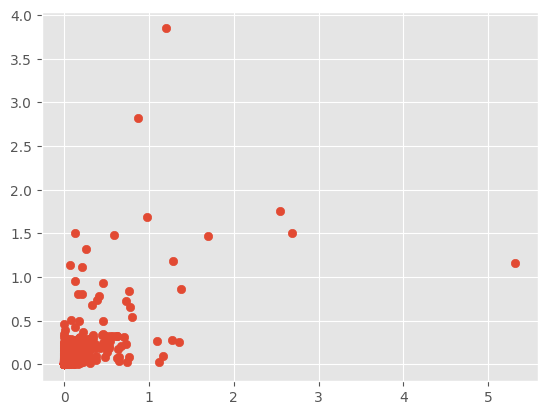

In [ ]:
plt.scatter(JP_test_y, JP_xgb_test_predictions)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

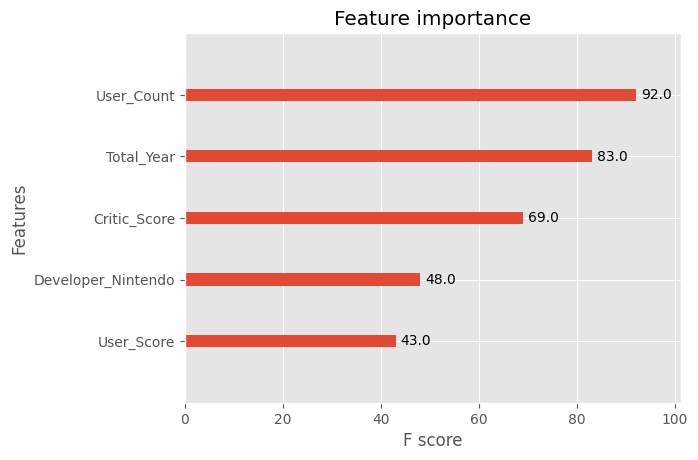

In [ ]:
plot_importance(JP_xgb, max_num_features = 5)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

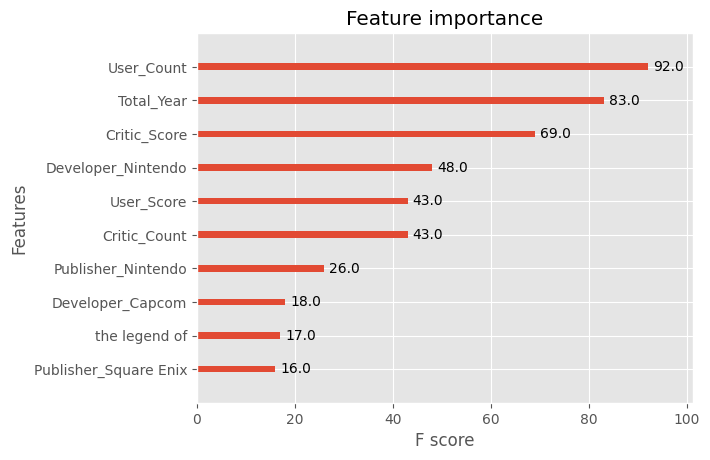

In [ ]:
plot_importance(JP_xgb, max_num_features = 10)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

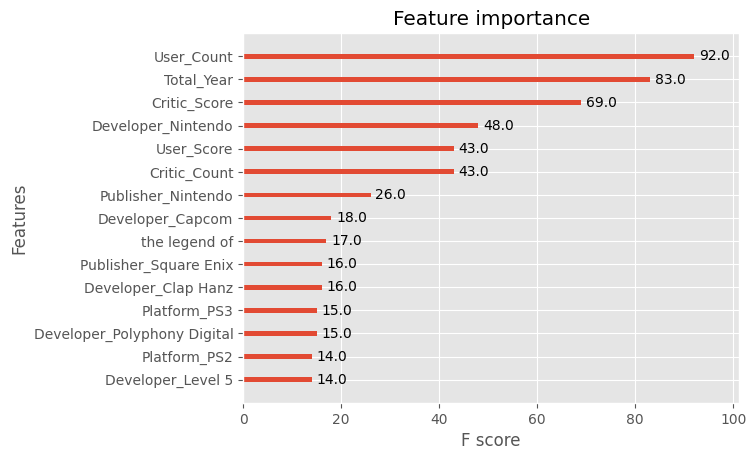

In [ ]:
plot_importance(JP_xgb, max_num_features = 15)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


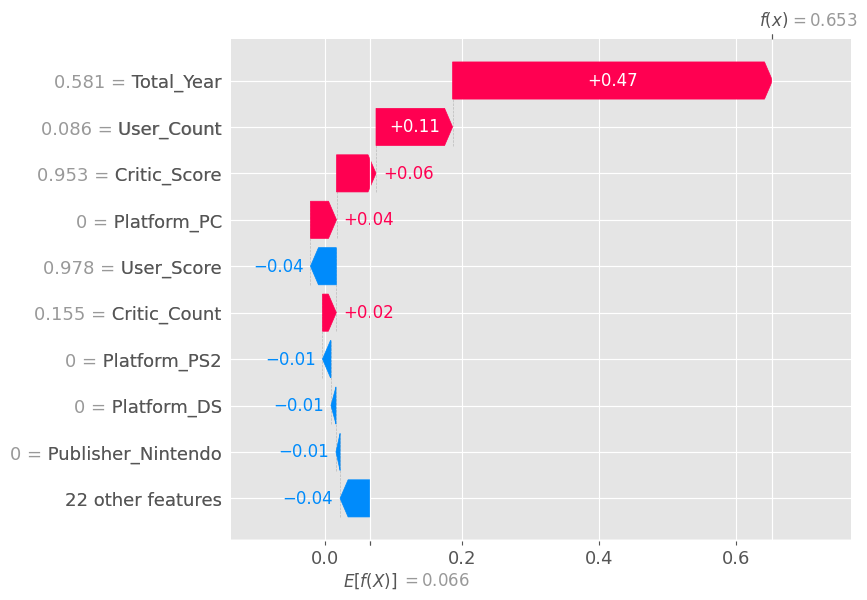

In [ ]:
# https://github.com/slundberg/shap
explainer = shap.Explainer(JP_xgb)
shap_values = explainer(JP_selected_test_X)

# This plot is not useful (?)
shap.plots.waterfall(shap_values[0])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


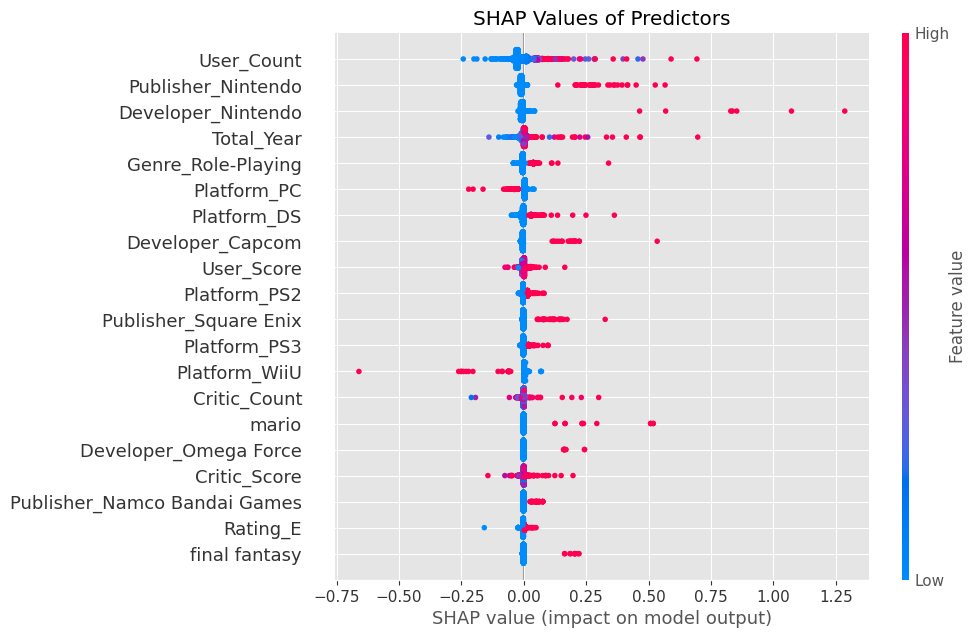

In [ ]:
shap.summary_plot(shap_values, JP_selected_test_X, show = False)
plt.title("SHAP Values of Predictors")
plt.gcf().set_size_inches(12,6)

#### Log Transform

In [ ]:
# test_params = {
#  'max_depth': [3, 6, 10],
#  'eta': [0.03, 0.1, 0.2, 0.3],
#  'min_child_weight': [1, 5, 10, 20],
#  'colsample_bytree': [0.5, 0.8, 1]
# }

# xgb_model = XGBRegressor()

# cv_model = GridSearchCV(estimator = xgb_model, param_grid = test_params)
# cv_model.fit(JP_selected_train_X, np.log(JP_train_y["JP_Sales"].apply(lambda x: 0.01 if x == 0 else x)))
# cv_model.best_params_

In [ ]:
JP_xgb = XGBRegressor(colsample_bytree = 0.5, eta = 0.1, max_depth = 6, min_child_weight = 1)
JP_xgb.fit(JP_selected_train_X, np.log(JP_train_y["JP_Sales"].apply(lambda x: 0.01 if x == 0 else x)))
JP_xgb_train_predictions = np.exp(JP_xgb.predict(JP_selected_train_X))
JP_xgb_test_predictions = np.exp(JP_xgb.predict(JP_selected_test_X))

In [ ]:
JP_xgb_train_predictions = pd.DataFrame(JP_xgb_train_predictions, columns = ["JP_Sales"])
JP_xgb_test_predictions = pd.DataFrame(JP_xgb_test_predictions, columns = ["JP_Sales"])

In [ ]:
JP_xgb_train_predictions["JP_Sales"] = JP_xgb_train_predictions["JP_Sales"].apply(lambda x: max(0, x))
JP_xgb_test_predictions["JP_Sales"] = JP_xgb_test_predictions["JP_Sales"].apply(lambda x: max(0, x))

In [ ]:
train_n = JP_selected_train_X.shape[0]
train_p = JP_selected_train_X.shape[1]
train_mape = mean_absolute_percentage_error(JP_train_y["JP_Sales"].apply(lambda x: 0.01 if x == 0 else x), 
                                            JP_xgb_train_predictions)
train_mse = mean_squared_error(JP_train_y, JP_xgb_train_predictions, squared = True)
train_r2 = r2_score(JP_train_y, JP_xgb_train_predictions)
train_adj_r2 = 1 - (1 - train_r2) * (train_n - 1) / (train_n - train_p - 1)

In [ ]:
test_n = JP_selected_test_X.shape[0]
test_p = JP_selected_test_X.shape[1]
test_mape = mean_absolute_percentage_error(JP_test_y["JP_Sales"].apply(lambda x: 0.01 if x == 0 else x), 
                                           JP_xgb_test_predictions)
test_mse = mean_squared_error(JP_test_y, JP_xgb_test_predictions, squared = True)
test_r2 = r2_score(JP_test_y, JP_xgb_test_predictions)
test_adj_r2 = 1 - (1 - test_r2) * (test_n - 1) / (test_n - test_p - 1)

In [ ]:
print("Train MAPE: {:.2f}%".format(train_mape * 100))
print("Train MSE:", train_mse)
print("Train R2:", train_r2)
print("Train Adj R2:", train_adj_r2)
print()
print("Test MAPE: {:.2f}%".format(test_mape * 100))
print("Test MSE:", test_mse)
print("Test R2:", test_r2)
print("Test Adj R2:", test_adj_r2)

Train MAPE: 36.08%
Train MSE: 0.019777555133154646
Train R2: 0.7805129516017554
Train Adj R2: 0.7792594330865849

Test MAPE: 49.77%
Test MSE: 0.042930738273887964
Test R2: 0.1886129566448672
Test Adj R2: 0.16974349052032933


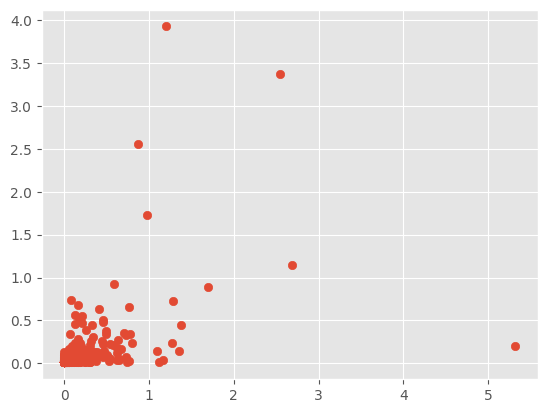

In [ ]:
plt.scatter(JP_test_y, JP_xgb_test_predictions)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

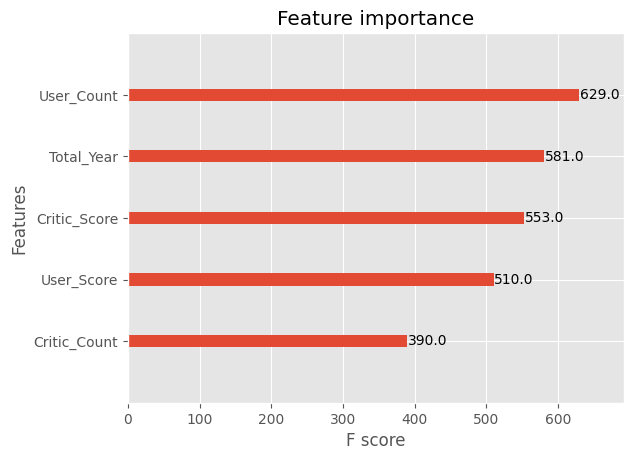

In [ ]:
plot_importance(JP_xgb, max_num_features = 5)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

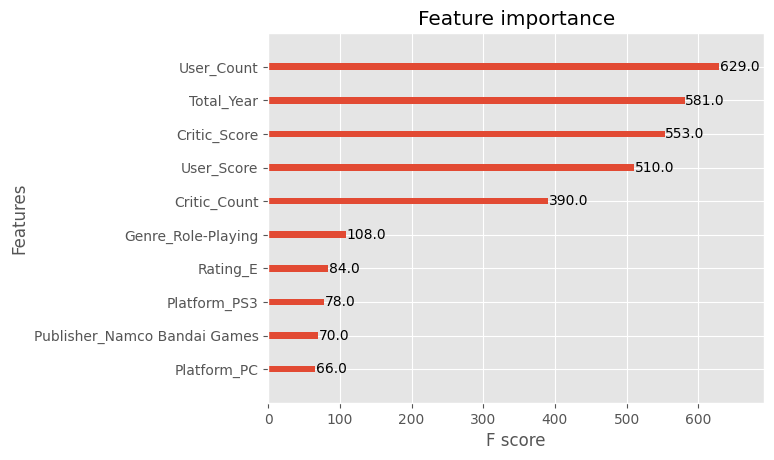

In [ ]:
plot_importance(JP_xgb, max_num_features = 10)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

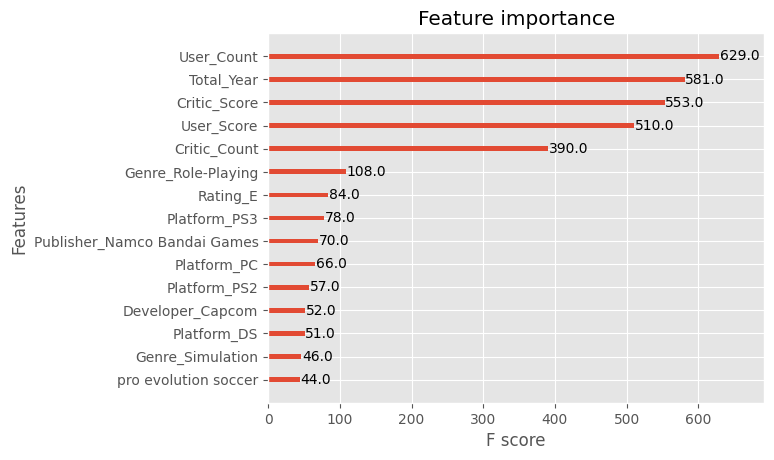

In [ ]:
plot_importance(JP_xgb, max_num_features = 15)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


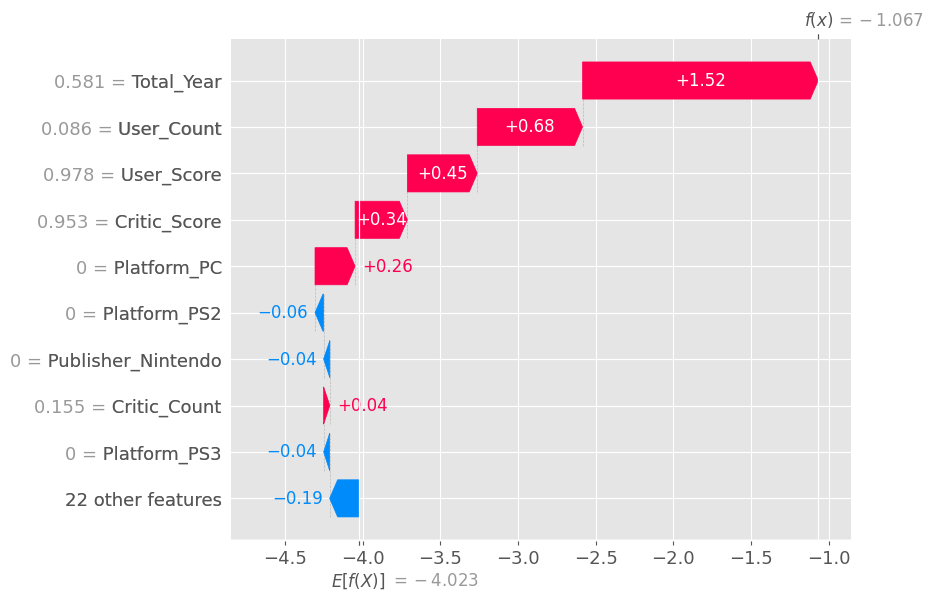

In [ ]:
# https://github.com/slundberg/shap
explainer = shap.Explainer(JP_xgb)
shap_values = explainer(JP_selected_test_X)

# This plot is not useful (?)
shap.plots.waterfall(shap_values[0])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


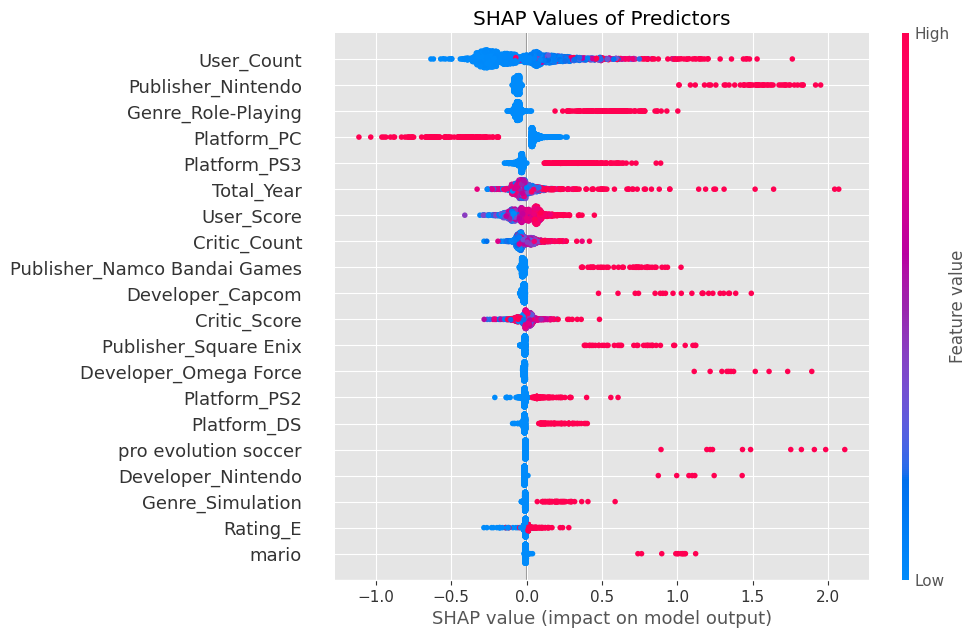

In [ ]:
shap.summary_plot(shap_values, JP_selected_test_X, show = False)
plt.title("SHAP Values of Predictors")
plt.gcf().set_size_inches(12,6)

#### Sales / Year

In [ ]:
# test_params = {
#  'max_depth': [3, 6, 10],
#  'eta': [0.03, 0.1, 0.2, 0.3],
#  'min_child_weight': [1, 5, 10, 20],
#  'colsample_bytree': [0.5, 0.8, 1]
# }

# xgb_model = XGBRegressor()

# cv_model = GridSearchCV(estimator = xgb_model, param_grid = test_params)
# cv_model.fit(JP_selected_train_X.drop(["Total_Year"], axis = 1), JP_train_y["JP_Sales"] / (JP_train_X["Total_Year"] * 31 + 1))
# cv_model.best_params_

In [ ]:
JP_xgb = XGBRegressor(colsample_bytree = 1, eta = 0.2, max_depth = 6, min_child_weight = 20)
JP_xgb.fit(JP_selected_train_X.drop(["Total_Year"], axis = 1), JP_train_y["JP_Sales"] / (JP_train_X["Total_Year"] * 31 + 1))
JP_xgb_train_predictions = JP_xgb.predict(JP_selected_train_X.drop(["Total_Year"], axis = 1)) * (JP_train_X["Total_Year"] * 31 + 1)
JP_xgb_test_predictions = JP_xgb.predict(JP_selected_test_X.drop(["Total_Year"], axis = 1)) * (JP_test_X["Total_Year"] * 31 + 1)

In [ ]:
JP_xgb_train_predictions = JP_xgb_train_predictions.apply(lambda x: max(0, x))
JP_xgb_test_predictions = JP_xgb_test_predictions.apply(lambda x: max(0, x))

In [ ]:
train_n = JP_selected_train_X.shape[0]
train_p = JP_selected_train_X.shape[1] - 1
train_mape = mean_absolute_percentage_error(JP_train_y["JP_Sales"].apply(lambda x: 0.01 if x == 0 else x), 
                                            JP_xgb_train_predictions)
train_mse = mean_squared_error(JP_train_y, JP_xgb_train_predictions, squared = True)
train_r2 = r2_score(JP_train_y, JP_xgb_train_predictions)
train_adj_r2 = 1 - (1 - train_r2) * (train_n - 1) / (train_n - train_p - 1)

In [ ]:
test_n = JP_selected_test_X.shape[0]
test_p = JP_selected_test_X.shape[1] - 1
test_mape = mean_absolute_percentage_error(JP_test_y["JP_Sales"].apply(lambda x: 0.01 if x == 0 else x), 
                                           JP_xgb_test_predictions)
test_mse = mean_squared_error(JP_test_y, JP_xgb_test_predictions, squared = True)
test_r2 = r2_score(JP_test_y, JP_xgb_test_predictions)
test_adj_r2 = 1 - (1 - test_r2) * (test_n - 1) / (test_n - test_p - 1)

In [ ]:
print("Train MAPE: {:.2f}%".format(train_mape * 100))
print("Train MSE:", train_mse)
print("Train R2:", train_r2)
print("Train Adj R2:", train_adj_r2)
print()
print("Test MAPE: {:.2f}%".format(test_mape * 100))
print("Test MSE:", test_mse)
print("Test R2:", test_r2)
print("Test Adj R2:", test_adj_r2)

Train MAPE: 195.56%
Train MSE: 0.017739304651696236
Train R2: 0.8031330165723567
Train Adj R2: 0.802045153337354

Test MAPE: 208.10%
Test MSE: 0.0647088184176683
Test R2: -0.22299077458099137
Test Adj R2: -0.2504943152387349


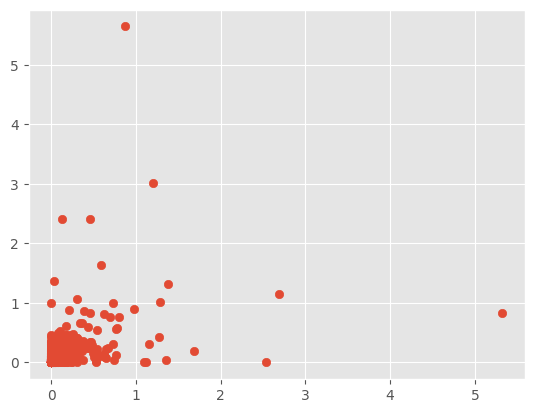

In [ ]:
plt.scatter(JP_test_y, JP_xgb_test_predictions)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

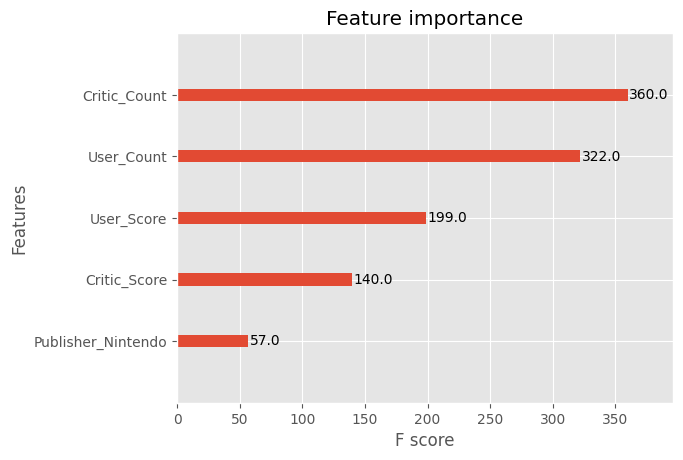

In [ ]:
plot_importance(JP_xgb, max_num_features = 5)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

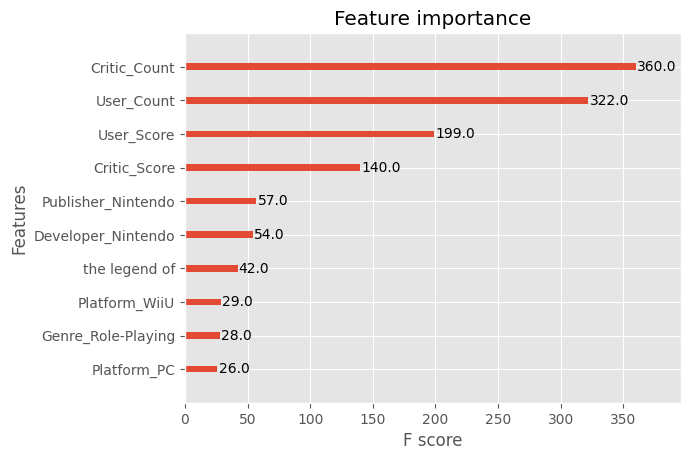

In [ ]:
plot_importance(JP_xgb, max_num_features = 10)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

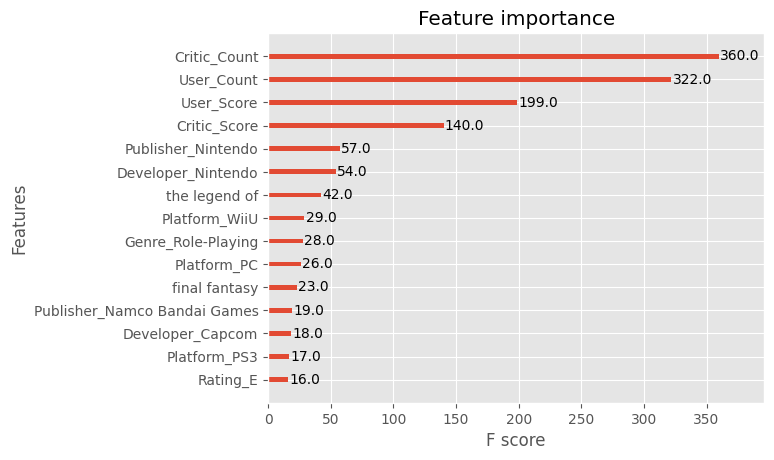

In [ ]:
plot_importance(JP_xgb, max_num_features = 15)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


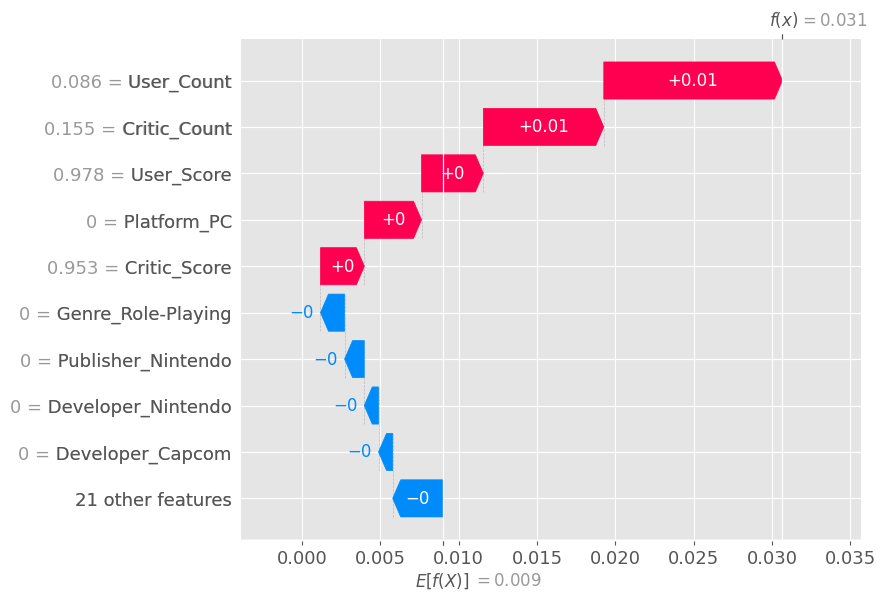

In [ ]:
# https://github.com/slundberg/shap
explainer = shap.Explainer(JP_xgb)
shap_values = explainer(JP_selected_test_X.drop(["Total_Year"], axis = 1))

# This plot is not useful (?)
shap.plots.waterfall(shap_values[0])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


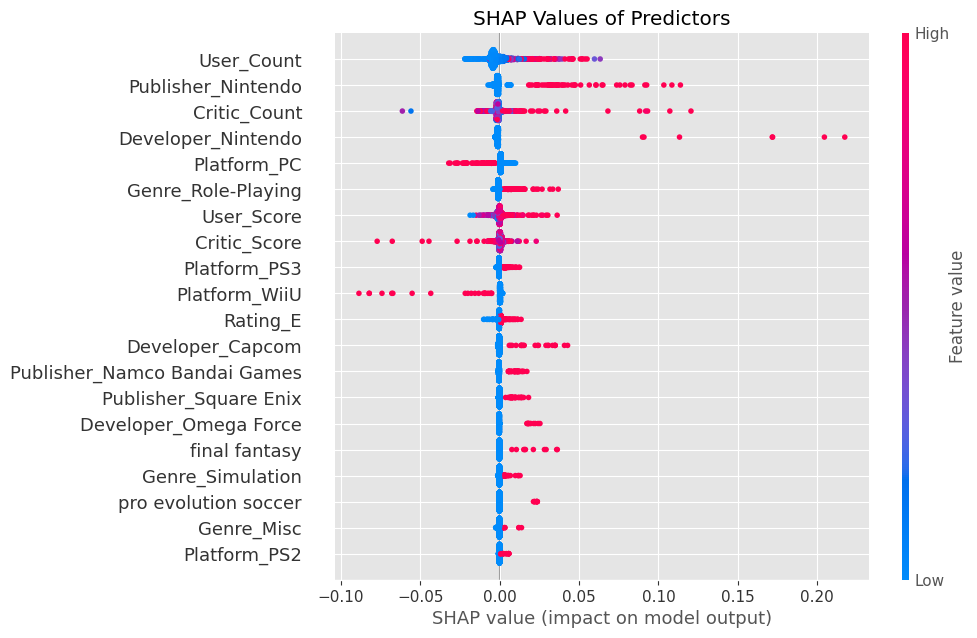

In [ ]:
shap.summary_plot(shap_values, JP_selected_test_X.drop(["Total_Year"], axis = 1), show = False)
plt.title("SHAP Values of Predictors")
plt.gcf().set_size_inches(12,6)

#### Log Sales / Year

In [ ]:
# test_params = {
#  'max_depth': [3, 6, 10],
#  'eta': [0.03, 0.1, 0.2, 0.3],
#  'min_child_weight': [1, 5, 10, 20],
#  'colsample_bytree': [0.5, 0.8, 1]
# }

# xgb_model = XGBRegressor()

# cv_model = GridSearchCV(estimator = xgb_model, param_grid = test_params)
# cv_model.fit(JP_selected_train_X.drop(["Total_Year"], axis = 1), 
#            np.log(JP_train_y["JP_Sales"].apply(lambda x: 0.01 if x == 0 else x) / (JP_train_X["Total_Year"] * 31 + 1)))
# cv_model.best_params_

In [ ]:
JP_xgb = XGBRegressor(colsample_bytree = 0.8, eta = 0.1, max_depth = 6, min_child_weight = 5)
JP_xgb.fit(JP_selected_train_X.drop(["Total_Year"], axis = 1), 
           np.log(JP_train_y["JP_Sales"].apply(lambda x: 0.01 if x == 0 else x) / (JP_train_X["Total_Year"] * 31 + 1)))
JP_xgb_train_predictions = np.exp(JP_xgb.predict(JP_selected_train_X.drop(["Total_Year"], axis = 1))) * (JP_train_X["Total_Year"] * 31 + 1)
JP_xgb_test_predictions = np.exp(JP_xgb.predict(JP_selected_test_X.drop(["Total_Year"], axis = 1))) * (JP_test_X["Total_Year"] * 31 + 1)

In [ ]:
JP_xgb_train_predictions = JP_xgb_train_predictions.apply(lambda x: max(0, x))
JP_xgb_test_predictions = JP_xgb_test_predictions.apply(lambda x: max(0, x))

In [ ]:
train_n = JP_selected_train_X.shape[0]
train_p = JP_selected_train_X.shape[1] - 1
train_mape = mean_absolute_percentage_error(JP_train_y["JP_Sales"].apply(lambda x: 0.01 if x == 0 else x), 
                                            JP_xgb_train_predictions)
train_mse = mean_squared_error(JP_train_y, JP_xgb_train_predictions, squared = True)
train_r2 = r2_score(JP_train_y, JP_xgb_train_predictions)
train_adj_r2 = 1 - (1 - train_r2) * (train_n - 1) / (train_n - train_p - 1)

In [ ]:
test_n = JP_selected_test_X.shape[0]
test_p = JP_selected_test_X.shape[1] - 1
test_mape = mean_absolute_percentage_error(JP_test_y["JP_Sales"].apply(lambda x: 0.01 if x == 0 else x), 
                                           JP_xgb_test_predictions)
test_mse = mean_squared_error(JP_test_y, JP_xgb_test_predictions, squared = True)
test_r2 = r2_score(JP_test_y, JP_xgb_test_predictions)
test_adj_r2 = 1 - (1 - test_r2) * (test_n - 1) / (test_n - test_p - 1)

In [ ]:
print("Train MAPE: {:.2f}%".format(train_mape * 100))
print("Train MSE:", train_mse)
print("Train R2:", train_r2)
print("Train Adj R2:", train_adj_r2)
print()
print("Test MAPE: {:.2f}%".format(test_mape * 100))
print("Test MSE:", test_mse)
print("Test R2:", test_r2)
print("Test Adj R2:", test_adj_r2)

Train MAPE: 55.08%
Train MSE: 0.020628056116997553
Train R2: 0.7710742748114909
Train Adj R2: 0.7698092588314476

Test MAPE: 71.29%
Test MSE: 0.03895522877549331
Test R2: 0.2637497240853345
Test Adj R2: 0.24719237155352047


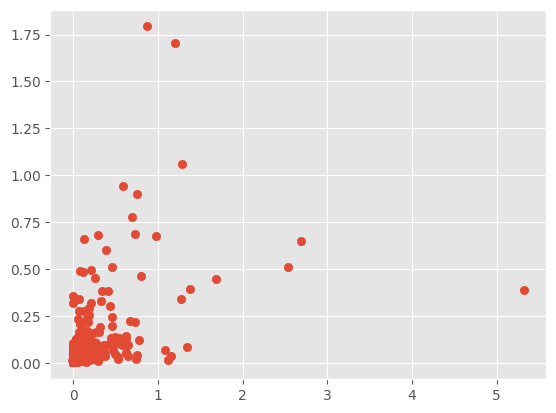

In [ ]:
plt.scatter(JP_test_y, JP_xgb_test_predictions)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

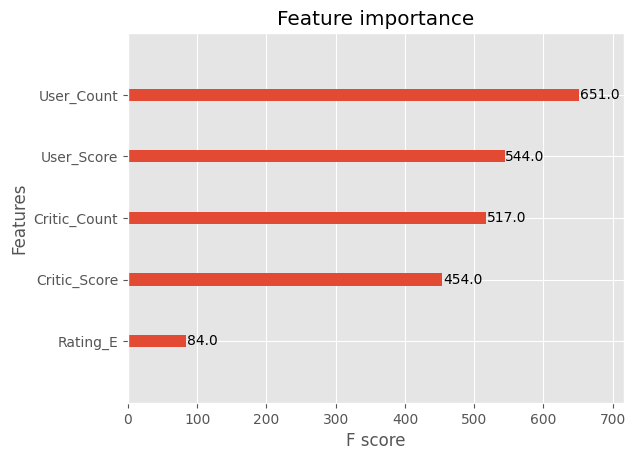

In [ ]:
plot_importance(JP_xgb, max_num_features = 5)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

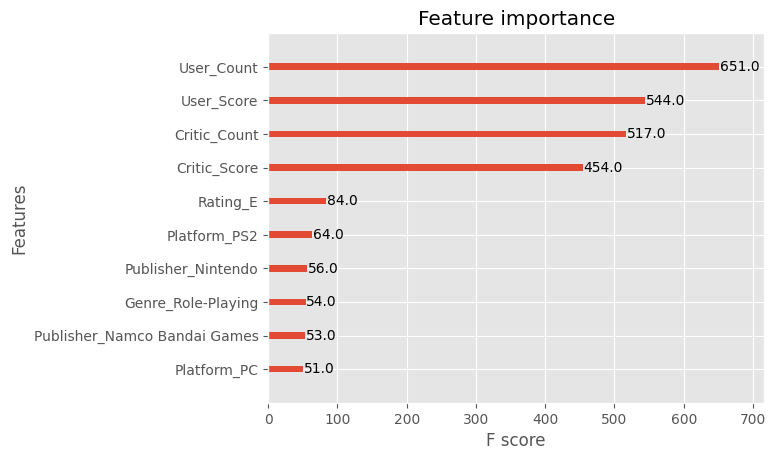

In [ ]:
plot_importance(JP_xgb, max_num_features = 10)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

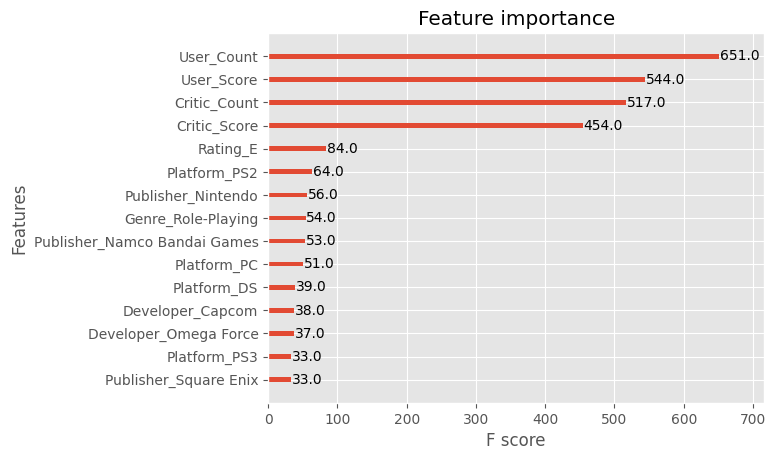

In [ ]:
plot_importance(JP_xgb, max_num_features = 15)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


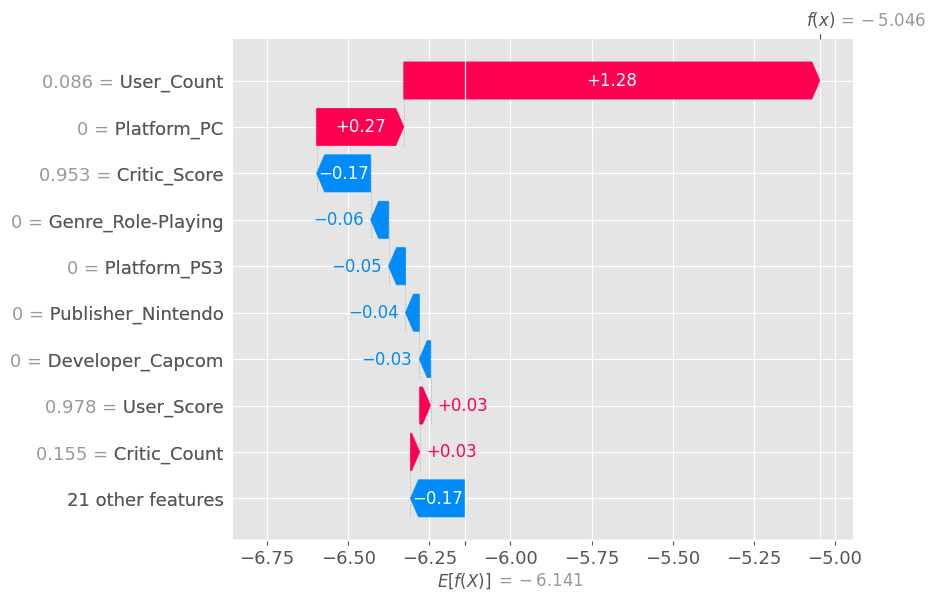

In [ ]:
# https://github.com/slundberg/shap
explainer = shap.Explainer(JP_xgb)
shap_values = explainer(JP_selected_test_X.drop(["Total_Year"], axis = 1))

# This plot is not useful (?)
shap.plots.waterfall(shap_values[0])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


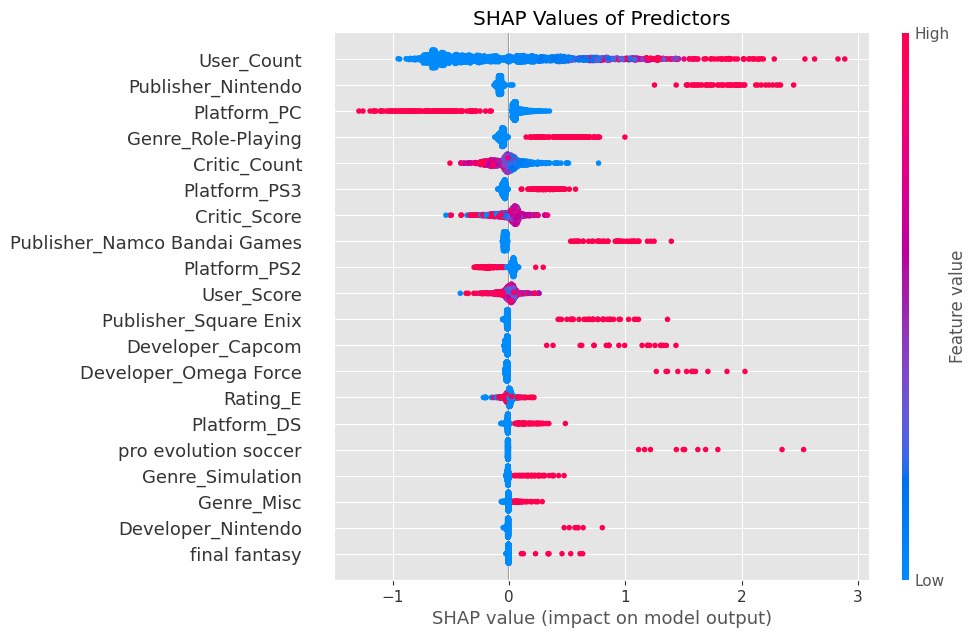

In [ ]:
shap.summary_plot(shap_values, JP_selected_test_X.drop(["Total_Year"], axis = 1), show = False)
plt.title("SHAP Values of Predictors")
plt.gcf().set_size_inches(12,6)

#### Stacking Full

In [ ]:
JP_xgb = XGBRegressor(colsample_bytree = 0.8, eta = 0.2, max_depth = 3, min_child_weight = 1)
JP_xgb.fit(JP_selected_train_X, JP_train_y)
JP_ori_xgb_train_predictions = JP_xgb.predict(JP_selected_train_X)
JP_ori_xgb_test_predictions = JP_xgb.predict(JP_selected_test_X)

In [ ]:
JP_ori_xgb_train_predictions = pd.DataFrame(JP_ori_xgb_train_predictions, columns = ["JP_ori"])
JP_ori_xgb_test_predictions = pd.DataFrame(JP_ori_xgb_test_predictions, columns = ["JP_ori"])

In [ ]:
JP_ori_xgb_train_predictions

JP_ori
0     0.034141
1     0.010696
2     0.058184
3     0.045549
4     0.000033
...        ...
5455 -0.002351
5456 -0.007317
5457  0.052060
5458  0.008436
5459 -0.003606

[5460 rows x 1 columns]

In [ ]:
JP_xgb = XGBRegressor(colsample_bytree = 0.5, eta = 0.1, max_depth = 6, min_child_weight = 1)
JP_xgb.fit(JP_selected_train_X, np.log(JP_train_y["JP_Sales"].apply(lambda x: 0.01 if x == 0 else x)))
JP_log_xgb_train_predictions = np.exp(JP_xgb.predict(JP_selected_train_X))
JP_log_xgb_test_predictions = np.exp(JP_xgb.predict(JP_selected_test_X))

In [ ]:
JP_log_xgb_train_predictions = pd.DataFrame(JP_log_xgb_train_predictions, columns = ["JP_log"])
JP_log_xgb_test_predictions = pd.DataFrame(JP_log_xgb_test_predictions, columns = ["JP_log"])

In [ ]:
JP_log_xgb_train_predictions

JP_log
0     0.014404
1     0.010277
2     0.025292
3     0.016155
4     0.011632
...        ...
5455  0.009768
5456  0.009837
5457  0.021243
5458  0.011533
5459  0.011006

[5460 rows x 1 columns]

In [ ]:
JP_xgb = XGBRegressor(colsample_bytree = 1, eta = 0.2, max_depth = 6, min_child_weight = 20)
JP_xgb.fit(JP_selected_train_X.drop(["Total_Year"], axis = 1), JP_train_y["JP_Sales"] / (JP_train_X["Total_Year"] * 31 + 1))
JP_sy_xgb_train_predictions = JP_xgb.predict(JP_selected_train_X.drop(["Total_Year"], axis = 1)) * (JP_train_X["Total_Year"] * 31 + 1)
JP_sy_xgb_test_predictions = JP_xgb.predict(JP_selected_test_X.drop(["Total_Year"], axis = 1)) * (JP_test_X["Total_Year"] * 31 + 1)

In [ ]:
JP_sy_xgb_train_predictions = JP_sy_xgb_train_predictions.to_frame()
JP_sy_xgb_test_predictions = JP_sy_xgb_test_predictions.to_frame()
JP_sy_xgb_train_predictions.columns = ["JP_sy"]
JP_sy_xgb_test_predictions.columns = ["JP_sy"]

In [ ]:
JP_sy_xgb_train_predictions

JP_sy
0     0.057884
1     0.004500
2     0.107700
3     0.036978
4     0.007277
...        ...
5455  0.004017
5456 -0.000751
5457  0.030236
5458  0.015675
5459  0.002255

[5460 rows x 1 columns]

In [ ]:
JP_xgb = XGBRegressor(colsample_bytree = 0.8, eta = 0.1, max_depth = 6, min_child_weight = 5)
JP_xgb.fit(JP_selected_train_X.drop(["Total_Year"], axis = 1), 
           np.log(JP_train_y["JP_Sales"].apply(lambda x: 0.01 if x == 0 else x) / (JP_train_X["Total_Year"] * 31 + 1)))
JP_log_sy_xgb_train_predictions = np.exp(JP_xgb.predict(JP_selected_train_X.drop(["Total_Year"], axis = 1))) * (JP_train_X["Total_Year"] * 31 + 1)
JP_log_sy_xgb_test_predictions = np.exp(JP_xgb.predict(JP_selected_test_X.drop(["Total_Year"], axis = 1))) * (JP_test_X["Total_Year"] * 31 + 1)

In [ ]:
JP_log_sy_xgb_train_predictions = JP_log_sy_xgb_train_predictions.to_frame()
JP_log_sy_xgb_test_predictions = JP_log_sy_xgb_test_predictions.to_frame()
JP_log_sy_xgb_train_predictions.columns = ["JP_log_sy"]
JP_log_sy_xgb_test_predictions.columns = ["JP_log_sy"]

In [ ]:
JP_log_sy_xgb_train_predictions

JP_log_sy
0      0.016515
1      0.009879
2      0.031737
3      0.019880
4      0.010128
...         ...
5455   0.012270
5456   0.008144
5457   0.023962
5458   0.012948
5459   0.010324

[5460 rows x 1 columns]

In [ ]:
JP_train_stack = pd.concat([JP_ori_xgb_train_predictions, JP_log_xgb_train_predictions, 
           JP_sy_xgb_train_predictions, JP_log_sy_xgb_train_predictions, JP_train_y], axis = 1)
JP_test_stack = pd.concat([JP_ori_xgb_test_predictions, JP_log_xgb_test_predictions, 
           JP_sy_xgb_test_predictions, JP_log_sy_xgb_test_predictions, JP_test_y], axis = 1)

In [ ]:
JP_train_stack

JP_ori    JP_log     JP_sy  JP_log_sy  JP_Sales
0     0.034141  0.014404  0.057884   0.016515      0.00
1     0.010696  0.010277  0.004500   0.009879      0.00
2     0.058184  0.025292  0.107700   0.031737      0.02
3     0.045549  0.016155  0.036978   0.019880      0.00
4     0.000033  0.011632  0.007277   0.010128      0.00
...        ...       ...       ...        ...       ...
5455 -0.002351  0.009768  0.004017   0.012270      0.00
5456 -0.007317  0.009837 -0.000751   0.008144      0.00
5457  0.052060  0.021243  0.030236   0.023962      0.04
5458  0.008436  0.011533  0.015675   0.012948      0.00
5459 -0.003606  0.011006  0.002255   0.010324      0.00

[5460 rows x 5 columns]

In [ ]:
JP_test_stack

JP_ori    JP_log     JP_sy  JP_log_sy  JP_Sales
0     0.652698  0.343990  0.582807   0.122259      0.78
1    -0.008943  0.011894 -0.004226   0.007453      0.06
2     0.015031  0.010024 -0.009498   0.010398      0.00
3     0.062197  0.034366  0.051577   0.030328      0.00
4     0.030111  0.017309  0.017186   0.007248      0.00
...        ...       ...       ...        ...       ...
1360  0.276513  0.196298  0.228798   0.123213      0.20
1361  0.026374  0.010956  0.013870   0.011316      0.00
1362  0.007091  0.011634 -0.032046   0.012114      0.00
1363  0.007504  0.009895  0.002295   0.010866      0.01
1364  0.052329  0.026599  0.051769   0.030141      0.00

[1365 rows x 5 columns]

In [ ]:
lr = LinearRegression()
lr.fit(JP_train_stack.drop(["JP_Sales"], axis = 1), JP_train_stack['JP_Sales'])

LinearRegression()

In [ ]:
lr.coef_

array([0.51758185, 0.18658649, 0.29703434, 0.16131515])

In [ ]:
lr.intercept_

-0.006633810876034263

In [ ]:
JP_train_stack_pred = lr.predict(JP_train_stack.drop(["JP_Sales"], axis = 1))
JP_test_stack_pred = lr.predict(JP_test_stack.drop(["JP_Sales"], axis = 1))

In [ ]:
train_n = JP_selected_train_X.shape[0]
train_p = JP_selected_train_X.shape[1] - 1
train_mape = mean_absolute_percentage_error(JP_train_y["JP_Sales"].apply(lambda x: 0.01 if x == 0 else x), 
                                            JP_train_stack_pred)
train_mse = mean_squared_error(JP_train_y, JP_train_stack_pred, squared = True)
train_r2 = r2_score(JP_train_y, JP_train_stack_pred)
train_adj_r2 = 1 - (1 - train_r2) * (train_n - 1) / (train_n - train_p - 1)

In [ ]:
test_n = JP_selected_test_X.shape[0]
test_p = JP_selected_test_X.shape[1] - 1
test_mape = mean_absolute_percentage_error(JP_test_y["JP_Sales"].apply(lambda x: 0.01 if x == 0 else x), 
                                           JP_test_stack_pred)
test_mse = mean_squared_error(JP_test_y, JP_test_stack_pred, squared = True)
test_r2 = r2_score(JP_test_y, JP_test_stack_pred)
test_adj_r2 = 1 - (1 - test_r2) * (test_n - 1) / (test_n - test_p - 1)

In [ ]:
print("Train MAPE: {:.2f}%".format(train_mape * 100))
print("Train MSE:", train_mse)
print("Train R2:", train_r2)
print("Train Adj R2:", train_adj_r2)
print()
print("Test MAPE: {:.2f}%".format(test_mape * 100))
print("Test MSE:", test_mse)
print("Test R2:", test_r2)
print("Test Adj R2:", test_adj_r2)

Train MAPE: 162.92%
Train MSE: 0.012718706351492606
Train R2: 0.8588505354813367
Train Adj R2: 0.8580705605438602

Test MAPE: 171.04%
Test MSE: 0.04343500116689834
Test R2: 0.17908243389393985
Test Adj R2: 0.16062101936381856


In [ ]:
JP_train_stack_pred = (JP_train_stack["JP_ori"] + JP_train_stack["JP_log"] + JP_train_stack["JP_sy"] + JP_train_stack["JP_log_sy"]) / 4
JP_test_stack_pred = (JP_test_stack["JP_ori"] + JP_test_stack["JP_log"] + JP_test_stack["JP_sy"] + JP_test_stack["JP_log_sy"]) / 4

In [ ]:
JP_train_stack_pred = JP_train_stack_pred.apply(lambda x: max(0, x))
JP_test_stack_pred = JP_test_stack_pred.apply(lambda x: max(0, x))

In [ ]:
train_n = JP_selected_train_X.shape[0]
train_p = JP_selected_train_X.shape[1] - 1
train_mape = mean_absolute_percentage_error(JP_train_y["JP_Sales"].apply(lambda x: 0.01 if x == 0 else x), 
                                            JP_train_stack_pred)
train_mse = mean_squared_error(JP_train_y, JP_train_stack_pred, squared = True)
train_r2 = r2_score(JP_train_y, JP_train_stack_pred)
train_adj_r2 = 1 - (1 - train_r2) * (train_n - 1) / (train_n - train_p - 1)

In [ ]:
test_n = JP_selected_test_X.shape[0]
test_p = JP_selected_test_X.shape[1] - 1
test_mape = mean_absolute_percentage_error(JP_test_y["JP_Sales"].apply(lambda x: 0.01 if x == 0 else x), 
                                           JP_test_stack_pred)
test_mse = mean_squared_error(JP_test_y, JP_test_stack_pred, squared = True)
test_r2 = r2_score(JP_test_y, JP_test_stack_pred)
test_adj_r2 = 1 - (1 - test_r2) * (test_n - 1) / (test_n - test_p - 1)

In [ ]:
print("Train MAPE: {:.2f}%".format(train_mape * 100))
print("Train MSE:", train_mse)
print("Train R2:", train_r2)
print("Train Adj R2:", train_adj_r2)
print()
print("Test MAPE: {:.2f}%".format(test_mape * 100))
print("Test MSE:", test_mse)
print("Test R2:", test_r2)
print("Test Adj R2:", test_adj_r2)

Train MAPE: 105.21%
Train MSE: 0.014939487167564566
Train R2: 0.8342047881593152
Train Adj R2: 0.8332886237910668

Test MAPE: 115.68%
Test MSE: 0.03887752197098201
Test R2: 0.2652183756132619
Test Adj R2: 0.24869405122675348


#### Stacking Partial

In [ ]:
JP_xgb = XGBRegressor(colsample_bytree = 0.8, eta = 0.2, max_depth = 3, min_child_weight = 1)
JP_xgb.fit(JP_selected_train_X, JP_train_y)
JP_ori_xgb_train_predictions = JP_xgb.predict(JP_selected_train_X)
JP_ori_xgb_test_predictions = JP_xgb.predict(JP_selected_test_X)

In [ ]:
JP_ori_xgb_train_predictions = pd.DataFrame(JP_ori_xgb_train_predictions, columns = ["JP_ori"])
JP_ori_xgb_test_predictions = pd.DataFrame(JP_ori_xgb_test_predictions, columns = ["JP_ori"])

In [ ]:
JP_ori_xgb_train_predictions

JP_ori
0     0.034141
1     0.010696
2     0.058184
3     0.045549
4     0.000033
...        ...
5455 -0.002351
5456 -0.007317
5457  0.052060
5458  0.008436
5459 -0.003606

[5460 rows x 1 columns]

In [ ]:
JP_xgb = XGBRegressor(colsample_bytree = 0.5, eta = 0.1, max_depth = 6, min_child_weight = 1)
JP_xgb.fit(JP_selected_train_X, np.log(JP_train_y["JP_Sales"].apply(lambda x: 0.01 if x == 0 else x)))
JP_log_xgb_train_predictions = np.exp(JP_xgb.predict(JP_selected_train_X))
JP_log_xgb_test_predictions = np.exp(JP_xgb.predict(JP_selected_test_X))

In [ ]:
JP_log_xgb_train_predictions = pd.DataFrame(JP_log_xgb_train_predictions, columns = ["JP_log"])
JP_log_xgb_test_predictions = pd.DataFrame(JP_log_xgb_test_predictions, columns = ["JP_log"])

In [ ]:
JP_log_xgb_train_predictions

JP_log
0     0.014404
1     0.010277
2     0.025292
3     0.016155
4     0.011632
...        ...
5455  0.009768
5456  0.009837
5457  0.021243
5458  0.011533
5459  0.011006

[5460 rows x 1 columns]

In [ ]:
JP_train_stack = pd.concat([JP_ori_xgb_train_predictions, JP_log_xgb_train_predictions, JP_train_y], axis = 1)
JP_test_stack = pd.concat([JP_ori_xgb_test_predictions, JP_log_xgb_test_predictions, JP_test_y], axis = 1)

In [ ]:
JP_train_stack

JP_ori    JP_log  JP_Sales
0     0.034141  0.014404      0.00
1     0.010696  0.010277      0.00
2     0.058184  0.025292      0.02
3     0.045549  0.016155      0.00
4     0.000033  0.011632      0.00
...        ...       ...       ...
5455 -0.002351  0.009768      0.00
5456 -0.007317  0.009837      0.00
5457  0.052060  0.021243      0.04
5458  0.008436  0.011533      0.00
5459 -0.003606  0.011006      0.00

[5460 rows x 3 columns]

In [ ]:
JP_test_stack

JP_ori    JP_log  JP_Sales
0     0.652698  0.343990      0.78
1    -0.008943  0.011894      0.06
2     0.015031  0.010024      0.00
3     0.062197  0.034366      0.00
4     0.030111  0.017309      0.00
...        ...       ...       ...
1360  0.276513  0.196298      0.20
1361  0.026374  0.010956      0.00
1362  0.007091  0.011634      0.00
1363  0.007504  0.009895      0.01
1364  0.052329  0.026599      0.00

[1365 rows x 3 columns]

In [ ]:
lr = LinearRegression()
lr.fit(JP_train_stack.drop(["JP_Sales"], axis = 1), JP_train_stack['JP_Sales'])

LinearRegression()

In [ ]:
lr.coef_

array([0.82565856, 0.3083144 ], dtype=float32)

In [ ]:
lr.intercept_

-0.0040706918

In [ ]:
JP_train_stack_pred = lr.predict(JP_train_stack.drop(["JP_Sales"], axis = 1))
JP_test_stack_pred = lr.predict(JP_test_stack.drop(["JP_Sales"], axis = 1))

In [ ]:
train_n = JP_selected_train_X.shape[0]
train_p = JP_selected_train_X.shape[1] - 1
train_mape = mean_absolute_percentage_error(JP_train_y["JP_Sales"].apply(lambda x: 0.01 if x == 0 else x), 
                                            JP_train_stack_pred)
train_mse = mean_squared_error(JP_train_y, JP_train_stack_pred, squared = True)
train_r2 = r2_score(JP_train_y, JP_train_stack_pred)
train_adj_r2 = 1 - (1 - train_r2) * (train_n - 1) / (train_n - train_p - 1)

In [ ]:
test_n = JP_selected_test_X.shape[0]
test_p = JP_selected_test_X.shape[1] - 1
test_mape = mean_absolute_percentage_error(JP_test_y["JP_Sales"].apply(lambda x: 0.01 if x == 0 else x), 
                                           JP_test_stack_pred)
test_mse = mean_squared_error(JP_test_y, JP_test_stack_pred, squared = True)
test_r2 = r2_score(JP_test_y, JP_test_stack_pred)
test_adj_r2 = 1 - (1 - test_r2) * (test_n - 1) / (test_n - test_p - 1)

In [ ]:
print("Train MAPE: {:.2f}%".format(train_mape * 100))
print("Train MSE:", train_mse)
print("Train R2:", train_r2)
print("Train Adj R2:", train_adj_r2)
print()
print("Test MAPE: {:.2f}%".format(test_mape * 100))
print("Test MSE:", test_mse)
print("Test R2:", test_r2)
print("Test Adj R2:", test_adj_r2)

Train MAPE: 156.26%
Train MSE: 0.013759151760964884
Train R2: 0.8473038963539479
Train Adj R2: 0.8464601160796098

Test MAPE: 160.57%
Test MSE: 0.041491264031186116
Test R2: 0.21581888872831612
Test Adj R2: 0.19818363135339057


In [ ]:
JP_train_stack_pred = (JP_train_stack["JP_ori"] + JP_train_stack["JP_log"]) / 2
JP_test_stack_pred = (JP_test_stack["JP_ori"] + JP_test_stack["JP_log"]) / 2

In [ ]:
JP_train_stack_pred = JP_train_stack_pred.apply(lambda x: max(0, x))
JP_test_stack_pred = JP_test_stack_pred.apply(lambda x: max(0, x))

In [ ]:
train_n = JP_selected_train_X.shape[0]
train_p = JP_selected_train_X.shape[1] - 1
train_mape = mean_absolute_percentage_error(JP_train_y["JP_Sales"].apply(lambda x: 0.01 if x == 0 else x), 
                                            JP_train_stack_pred)
train_mse = mean_squared_error(JP_train_y, JP_train_stack_pred, squared = True)
train_r2 = r2_score(JP_train_y, JP_train_stack_pred)
train_adj_r2 = 1 - (1 - train_r2) * (train_n - 1) / (train_n - train_p - 1)

In [ ]:
test_n = JP_selected_test_X.shape[0]
test_p = JP_selected_test_X.shape[1] - 1
test_mape = mean_absolute_percentage_error(JP_test_y["JP_Sales"].apply(lambda x: 0.01 if x == 0 else x), 
                                           JP_test_stack_pred)
test_mse = mean_squared_error(JP_test_y, JP_test_stack_pred, squared = True)
test_r2 = r2_score(JP_test_y, JP_test_stack_pred)
test_adj_r2 = 1 - (1 - test_r2) * (test_n - 1) / (test_n - test_p - 1)

In [ ]:
print("Train MAPE: {:.2f}%".format(train_mape * 100))
print("Train MSE:", train_mse)
print("Train R2:", train_r2)
print("Train Adj R2:", train_adj_r2)
print()
print("Test MAPE: {:.2f}%".format(test_mape * 100))
print("Test MSE:", test_mse)
print("Test R2:", test_r2)
print("Test Adj R2:", test_adj_r2)

Train MAPE: 101.37%
Train MSE: 0.015493690441855308
Train R2: 0.8280543595513421
Train Adj R2: 0.8271042086555124

Test MAPE: 108.31%
Test MSE: 0.0384019485043957
Test R2: 0.27420667081773353
Test Adj R2: 0.2578844820055387


### EU

#### Original

In [ ]:
# test_params = {
#  'max_depth': [3, 6, 10],
#  'eta': [0.03, 0.1, 0.2, 0.3],
#  'min_child_weight': [1, 5, 10, 20],
#  'colsample_bytree': [0.5, 0.8, 1]
# }

# xgb_model = XGBRegressor()

# cv_model = GridSearchCV(estimator = xgb_model, param_grid = test_params)
# cv_model.fit(EU_selected_train_X, EU_train_y)
# cv_model.best_params_

In [ ]:
EU_xgb = XGBRegressor(colsample_bytree = 0.5, eta = 0.1, max_depth = 6, min_child_weight = 5)
EU_xgb.fit(EU_selected_train_X, EU_train_y)
EU_xgb_train_predictions = EU_xgb.predict(EU_selected_train_X)
EU_xgb_test_predictions = EU_xgb.predict(EU_selected_test_X)

In [ ]:
EU_xgb_train_predictions = pd.DataFrame(EU_xgb_train_predictions, columns = ["EU_Sales"])
EU_xgb_test_predictions = pd.DataFrame(EU_xgb_test_predictions, columns = ["EU_Sales"])

In [ ]:
EU_xgb_train_predictions["EU_Sales"] = EU_xgb_train_predictions["EU_Sales"].apply(lambda x: max(0, x))
EU_xgb_test_predictions["EU_Sales"] = EU_xgb_test_predictions["EU_Sales"].apply(lambda x: max(0, x))

In [ ]:
train_n = EU_selected_train_X.shape[0]
train_p = EU_selected_train_X.shape[1]
train_mape = mean_absolute_percentage_error(EU_train_y["EU_Sales"].apply(lambda x: 0.01 if x == 0 else x), 
                                            EU_xgb_train_predictions)
train_mse = mean_squared_error(EU_train_y, EU_xgb_train_predictions, squared = True)
train_r2 = r2_score(EU_train_y, EU_xgb_train_predictions)
train_adj_r2 = 1 - (1 - train_r2) * (train_n - 1) / (train_n - train_p - 1)

In [ ]:
test_n = EU_selected_test_X.shape[0]
test_p = EU_selected_test_X.shape[1]
test_mape = mean_absolute_percentage_error(EU_test_y["EU_Sales"].apply(lambda x: 0.01 if x == 0 else x), 
                                           EU_xgb_test_predictions)
test_mse = mean_squared_error(EU_test_y, EU_xgb_test_predictions, squared = True)
test_r2 = r2_score(EU_test_y, EU_xgb_test_predictions)
test_adj_r2 = 1 - (1 - test_r2) * (test_n - 1) / (test_n - test_p - 1)

In [ ]:
print("Train MAPE: {:.2f}%".format(train_mape * 100))
print("Train MSE:", train_mse)
print("Train R2:", train_r2)
print("Train Adj R2:", train_adj_r2)
print()
print("Test MAPE: {:.2f}%".format(test_mape * 100))
print("Test MSE:", test_mse)
print("Test R2:", test_r2)
print("Test Adj R2:", test_adj_r2)

Train MAPE: 259.86%
Train MSE: 0.07287093753069701
Train R2: 0.8555141976449124
Train Adj R2: 0.8546622452448087

Test MAPE: 323.37%
Test MSE: 0.1874923175173902
Test R2: 0.45482991569182074
Test Adj R2: 0.44173273648922184


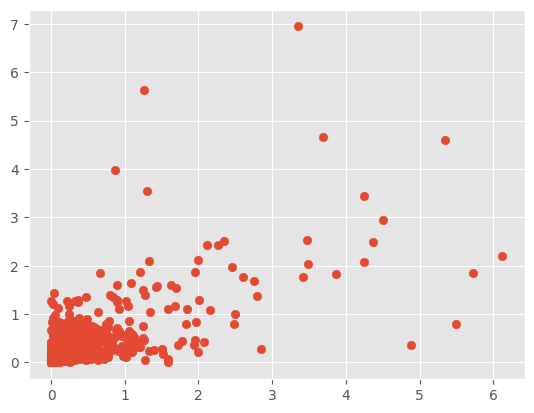

In [ ]:
plt.scatter(EU_test_y, EU_xgb_test_predictions)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

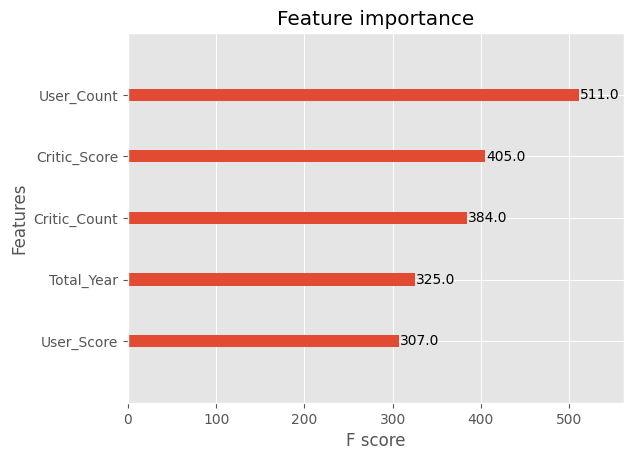

In [ ]:
plot_importance(EU_xgb, max_num_features = 5)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

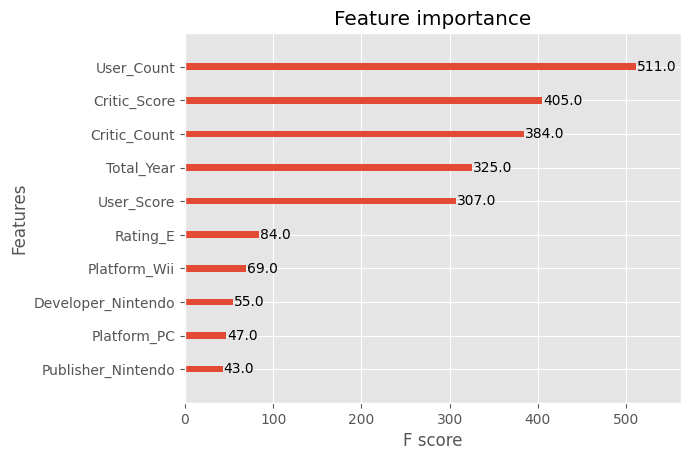

In [ ]:
plot_importance(EU_xgb, max_num_features = 10)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

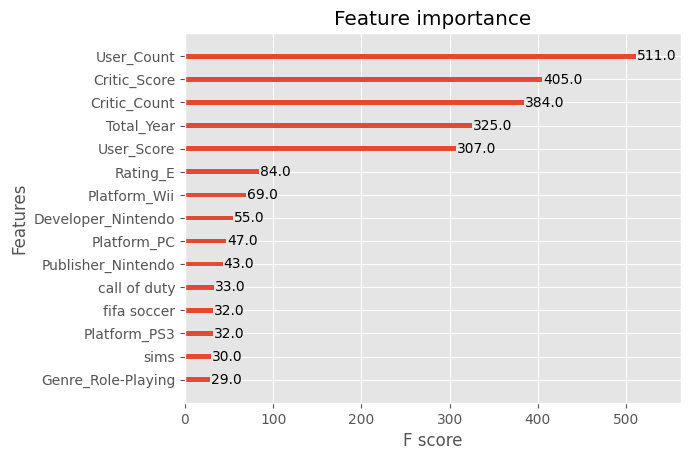

In [ ]:
plot_importance(EU_xgb, max_num_features = 15)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


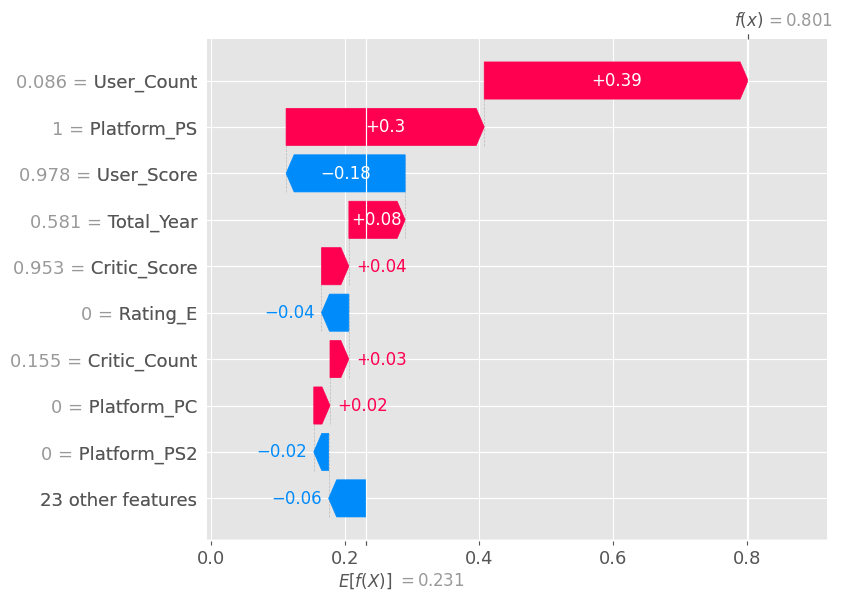

In [ ]:
# https://github.com/slundberg/shap
explainer = shap.Explainer(EU_xgb)
shap_values = explainer(EU_selected_test_X)

# This plot is not useful (?)
shap.plots.waterfall(shap_values[0])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


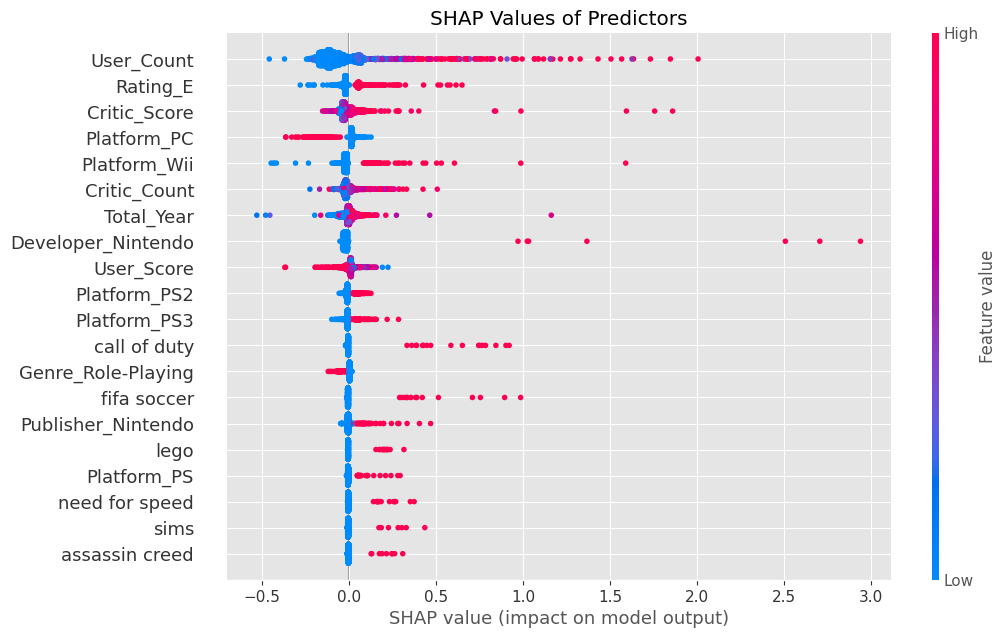

In [ ]:
shap.summary_plot(shap_values, EU_selected_test_X, show = False)
plt.title("SHAP Values of Predictors")
plt.gcf().set_size_inches(12,6)

#### Log Transform

In [ ]:
# test_params = {
#  'max_depth': [3, 6, 10],
#  'eta': [0.03, 0.1, 0.2, 0.3],
#  'min_child_weight': [1, 5, 10, 20],
#  'colsample_bytree': [0.5, 0.8, 1]
# }

# xgb_model = XGBRegressor()

# cv_model = GridSearchCV(estimator = xgb_model, param_grid = test_params)
# cv_model.fit(EU_selected_train_X, np.log(EU_train_y["EU_Sales"].apply(lambda x: 0.01 if x == 0 else x)))
# cv_model.best_params_

In [ ]:
EU_xgb = XGBRegressor(colsample_bytree = 0.8, eta = 0.1, max_depth = 6, min_child_weight = 1)
EU_xgb.fit(EU_selected_train_X, np.log(EU_train_y["EU_Sales"].apply(lambda x: 0.01 if x == 0 else x)))
EU_xgb_train_predictions = np.exp(EU_xgb.predict(EU_selected_train_X))
EU_xgb_test_predictions = np.exp(EU_xgb.predict(EU_selected_test_X))

In [ ]:
EU_xgb_train_predictions = pd.DataFrame(EU_xgb_train_predictions, columns = ["EU_Sales"])
EU_xgb_test_predictions = pd.DataFrame(EU_xgb_test_predictions, columns = ["EU_Sales"])

In [ ]:
EU_xgb_train_predictions["EU_Sales"] = EU_xgb_train_predictions["EU_Sales"].apply(lambda x: max(0, x))
EU_xgb_test_predictions["EU_Sales"] = EU_xgb_test_predictions["EU_Sales"].apply(lambda x: max(0, x))

In [ ]:
train_n = EU_selected_train_X.shape[0]
train_p = EU_selected_train_X.shape[1]
train_mape = mean_absolute_percentage_error(EU_train_y["EU_Sales"].apply(lambda x: 0.01 if x == 0 else x), 
                                            EU_xgb_train_predictions)
train_mse = mean_squared_error(EU_train_y, EU_xgb_train_predictions, squared = True)
train_r2 = r2_score(EU_train_y, EU_xgb_train_predictions)
train_adj_r2 = 1 - (1 - train_r2) * (train_n - 1) / (train_n - train_p - 1)

In [ ]:
test_n = EU_selected_test_X.shape[0]
test_p = EU_selected_test_X.shape[1]
test_mape = mean_absolute_percentage_error(EU_test_y["EU_Sales"].apply(lambda x: 0.01 if x == 0 else x), 
                                           EU_xgb_test_predictions)
test_mse = mean_squared_error(EU_test_y, EU_xgb_test_predictions, squared = True)
test_r2 = r2_score(EU_test_y, EU_xgb_test_predictions)
test_adj_r2 = 1 - (1 - test_r2) * (test_n - 1) / (test_n - test_p - 1)

In [ ]:
print("Train MAPE: {:.2f}%".format(train_mape * 100))
print("Train MSE:", train_mse)
print("Train R2:", train_r2)
print("Train Adj R2:", train_adj_r2)
print()
print("Test MAPE: {:.2f}%".format(test_mape * 100))
print("Test MSE:", test_mse)
print("Test R2:", test_r2)
print("Test Adj R2:", test_adj_r2)

Train MAPE: 80.95%
Train MSE: 0.1752293843505952
Train R2: 0.652561651434518
Train Adj R2: 0.6505130007704135

Test MAPE: 121.48%
Test MSE: 0.1923492164965329
Test R2: 0.4407075449142024
Test Adj R2: 0.42727108953676585


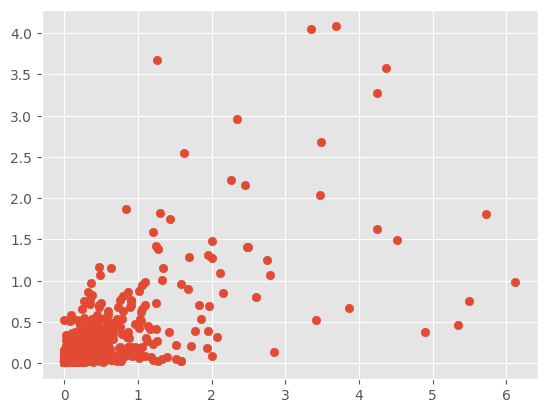

In [ ]:
plt.scatter(EU_test_y, EU_xgb_test_predictions)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

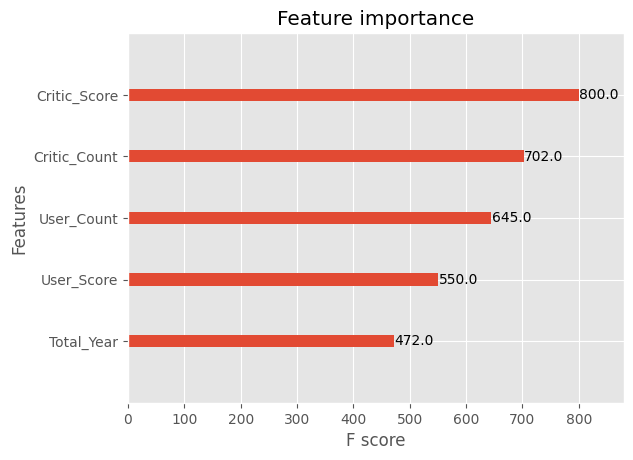

In [ ]:
plot_importance(EU_xgb, max_num_features = 5)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

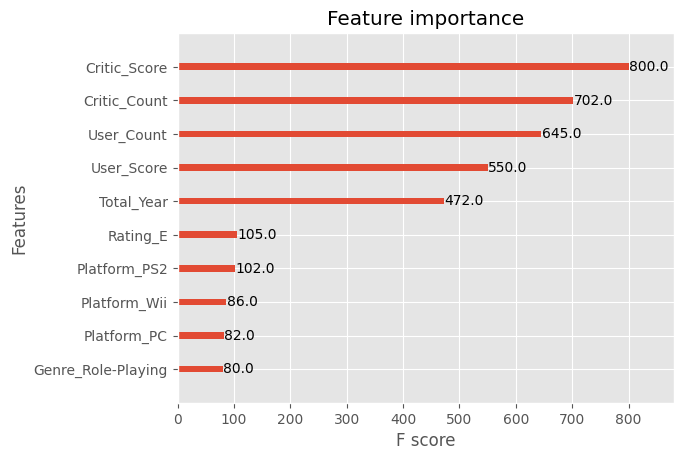

In [ ]:
plot_importance(EU_xgb, max_num_features = 10)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

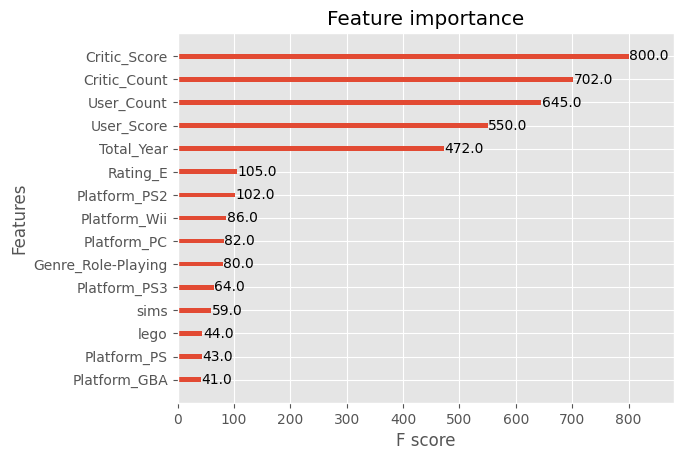

In [ ]:
plot_importance(EU_xgb, max_num_features = 15)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


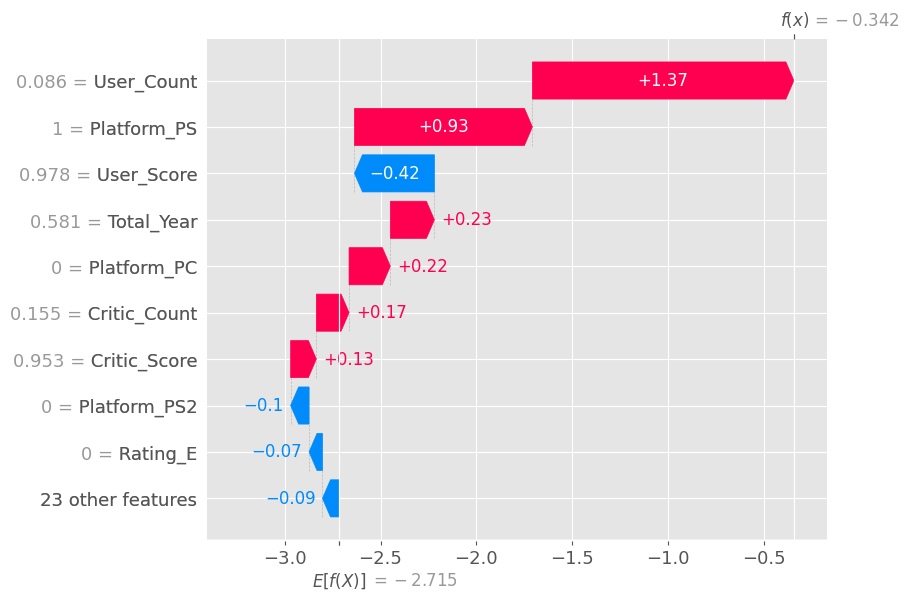

In [ ]:
# https://github.com/slundberg/shap
explainer = shap.Explainer(EU_xgb)
shap_values = explainer(EU_selected_test_X)

# This plot is not useful (?)
shap.plots.waterfall(shap_values[0])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


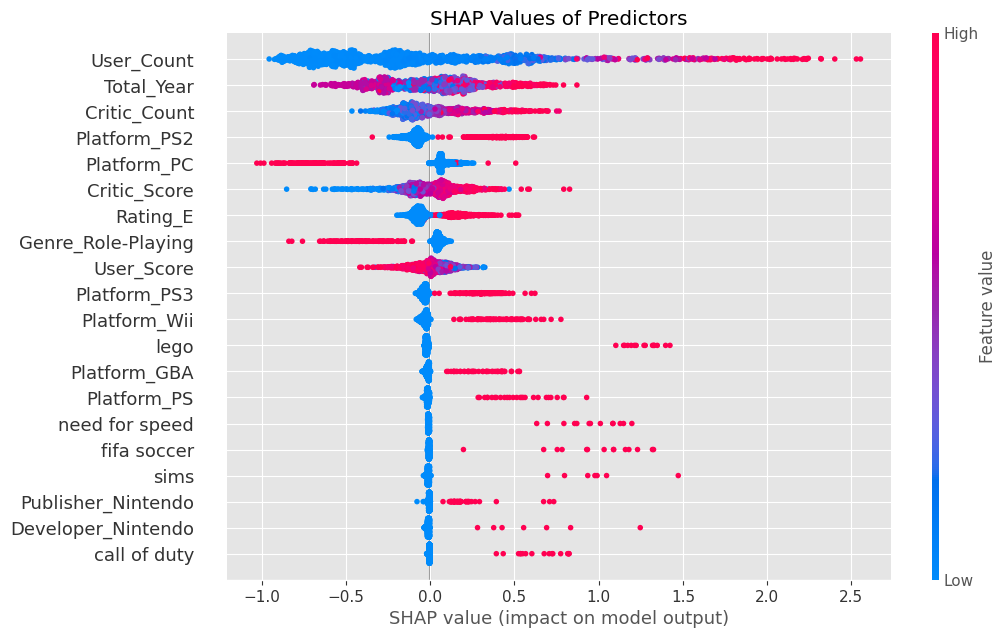

In [ ]:
shap.summary_plot(shap_values, EU_selected_test_X, show = False)
plt.title("SHAP Values of Predictors")
plt.gcf().set_size_inches(12,6)

#### Sales / Year

In [ ]:
# test_params = {
#  'max_depth': [3, 6, 10],
#  'eta': [0.03, 0.1, 0.2, 0.3],
#  'min_child_weight': [1, 5, 10, 20],
#  'colsample_bytree': [0.5, 0.8, 1]
# }

# xgb_model = XGBRegressor()

# cv_model = GridSearchCV(estimator = xgb_model, param_grid = test_params)
# cv_model.fit(EU_selected_train_X.drop(["Total_Year"], axis = 1), EU_train_y["EU_Sales"] / (EU_train_X["Total_Year"] * 31 + 1))
# cv_model.best_params_

In [ ]:
EU_xgb = XGBRegressor(colsample_bytree = 0.8, eta = 0.1, max_depth = 3, min_child_weight = 10)
EU_xgb.fit(EU_selected_train_X.drop(["Total_Year"], axis = 1), EU_train_y["EU_Sales"] / (EU_train_X["Total_Year"] * 31 + 1))
EU_xgb_train_predictions = EU_xgb.predict(EU_selected_train_X.drop(["Total_Year"], axis = 1)) * (EU_train_X["Total_Year"] * 31 + 1)
EU_xgb_test_predictions = EU_xgb.predict(EU_selected_test_X.drop(["Total_Year"], axis = 1)) * (EU_test_X["Total_Year"] * 31 + 1)

In [ ]:
EU_xgb_train_predictions = EU_xgb_train_predictions.apply(lambda x: max(0, x))
EU_xgb_test_predictions = EU_xgb_test_predictions.apply(lambda x: max(0, x))

In [ ]:
train_n = EU_selected_train_X.shape[0]
train_p = EU_selected_train_X.shape[1] - 1
train_mape = mean_absolute_percentage_error(EU_train_y["EU_Sales"].apply(lambda x: 0.01 if x == 0 else x), 
                                            EU_xgb_train_predictions)
train_mse = mean_squared_error(EU_train_y, EU_xgb_train_predictions, squared = True)
train_r2 = r2_score(EU_train_y, EU_xgb_train_predictions)
train_adj_r2 = 1 - (1 - train_r2) * (train_n - 1) / (train_n - train_p - 1)

In [ ]:
test_n = EU_selected_test_X.shape[0]
test_p = EU_selected_test_X.shape[1] - 1
test_mape = mean_absolute_percentage_error(EU_test_y["EU_Sales"].apply(lambda x: 0.01 if x == 0 else x), 
                                           EU_xgb_test_predictions)
test_mse = mean_squared_error(EU_test_y, EU_xgb_test_predictions, squared = True)
test_r2 = r2_score(EU_test_y, EU_xgb_test_predictions)
test_adj_r2 = 1 - (1 - test_r2) * (test_n - 1) / (test_n - test_p - 1)

In [ ]:
print("Train MAPE: {:.2f}%".format(train_mape * 100))
print("Train MSE:", train_mse)
print("Train R2:", train_r2)
print("Train Adj R2:", train_adj_r2)
print()
print("Test MAPE: {:.2f}%".format(test_mape * 100))
print("Test MSE:", test_mse)
print("Test R2:", test_r2)
print("Test Adj R2:", test_adj_r2)

Train MAPE: 416.39%
Train MSE: 0.25017298732400095
Train R2: 0.5039662446246054
Train Adj R2: 0.5011333326097496

Test MAPE: 415.19%
Test MSE: 0.2954535368123907
Test R2: 0.14091184265072054
Test Adj R2: 0.12093304829376061


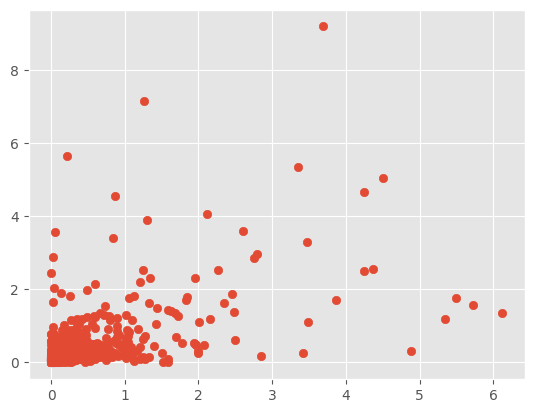

In [ ]:
plt.scatter(EU_test_y, EU_xgb_test_predictions)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

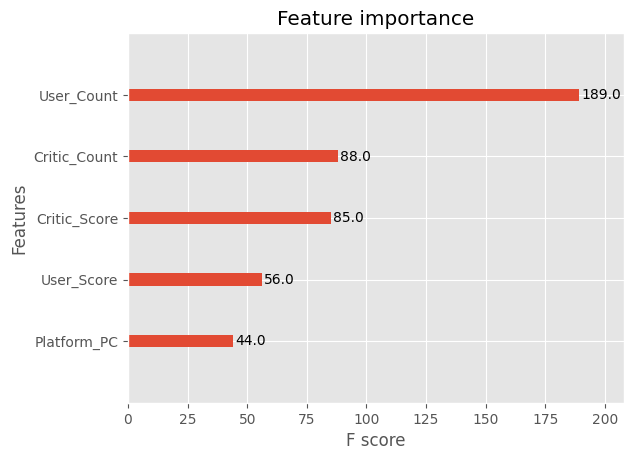

In [ ]:
plot_importance(EU_xgb, max_num_features = 5)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

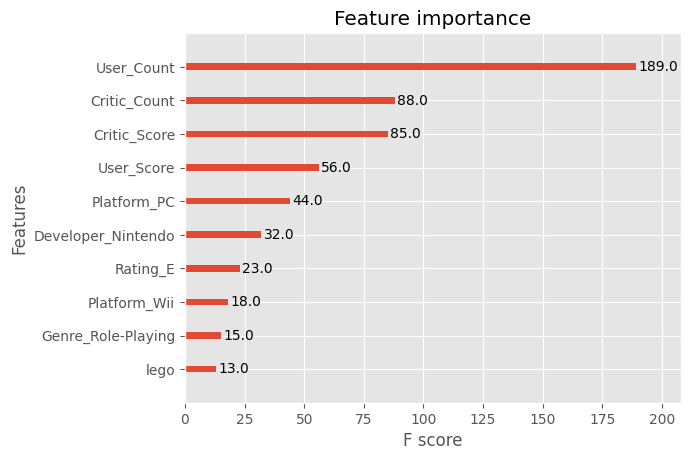

In [ ]:
plot_importance(EU_xgb, max_num_features = 10)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

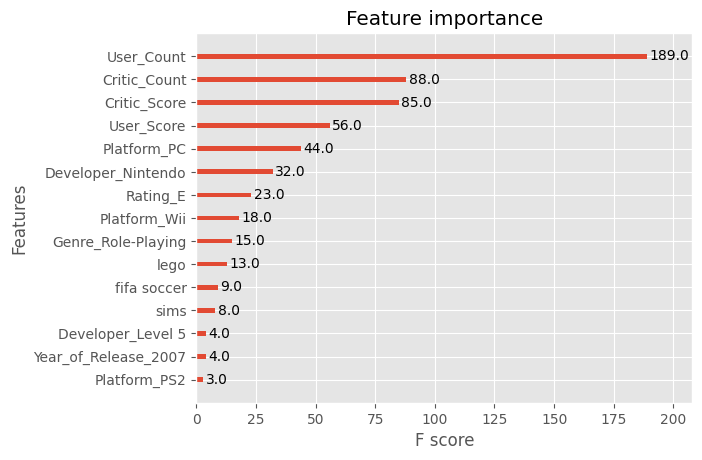

In [ ]:
plot_importance(EU_xgb, max_num_features = 15)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


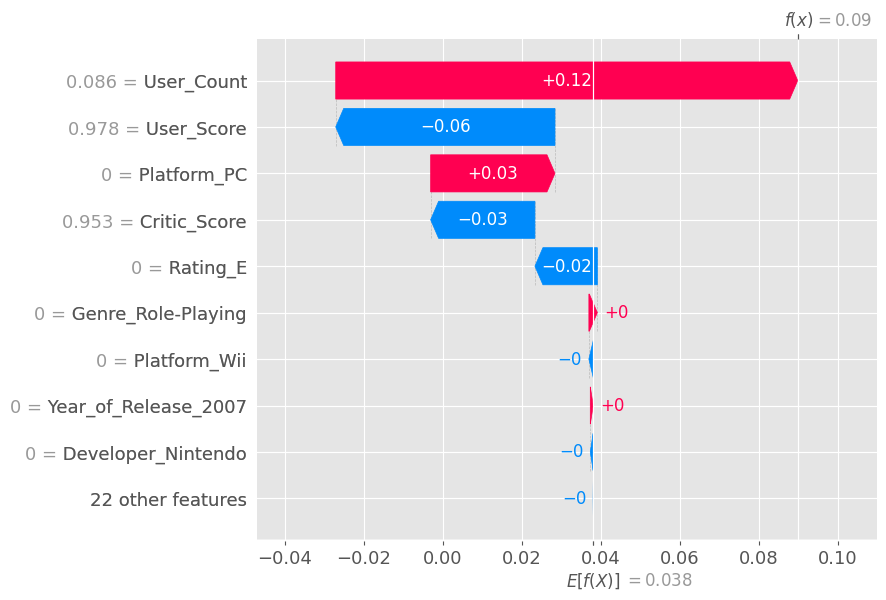

In [ ]:
# https://github.com/slundberg/shap
explainer = shap.Explainer(EU_xgb)
shap_values = explainer(EU_selected_test_X.drop(["Total_Year"], axis = 1))

# This plot is not useful (?)
shap.plots.waterfall(shap_values[0])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


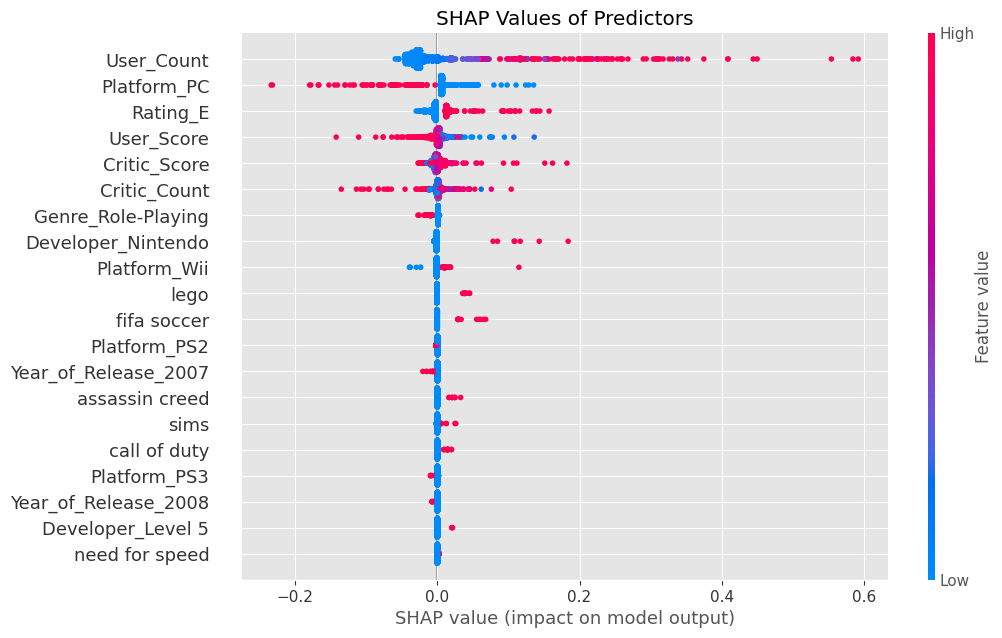

In [ ]:
shap.summary_plot(shap_values, EU_selected_test_X.drop(["Total_Year"], axis = 1), show = False)
plt.title("SHAP Values of Predictors")
plt.gcf().set_size_inches(12,6)

#### Log Sales / Year

In [ ]:
# test_params = {
#  'max_depth': [3, 6, 10],
#  'eta': [0.03, 0.1, 0.2, 0.3],
#  'min_child_weight': [1, 5, 10, 20],
#  'colsample_bytree': [0.5, 0.8, 1]
# }

# xgb_model = XGBRegressor()

# cv_model = GridSearchCV(estimator = xgb_model, param_grid = test_params)
# cv_model.fit(EU_selected_train_X.drop(["Total_Year"], axis = 1), 
#            np.log(EU_train_y["EU_Sales"].apply(lambda x: 0.01 if x == 0 else x) / (EU_train_X["Total_Year"] * 31 + 1)))
# cv_model.best_params_

In [ ]:
EU_xgb = XGBRegressor(colsample_bytree = 0.8, eta = 0.1, max_depth = 6, min_child_weight = 1)
EU_xgb.fit(EU_selected_train_X.drop(["Total_Year"], axis = 1), 
           np.log(EU_train_y["EU_Sales"].apply(lambda x: 0.01 if x == 0 else x) / (EU_train_X["Total_Year"] * 31 + 1)))
EU_xgb_train_predictions = np.exp(EU_xgb.predict(EU_selected_train_X.drop(["Total_Year"], axis = 1))) * (EU_train_X["Total_Year"] * 31 + 1)
EU_xgb_test_predictions = np.exp(EU_xgb.predict(EU_selected_test_X.drop(["Total_Year"], axis = 1))) * (EU_test_X["Total_Year"] * 31 + 1)

In [ ]:
EU_xgb_train_predictions = EU_xgb_train_predictions.apply(lambda x: max(0, x))
EU_xgb_test_predictions = EU_xgb_test_predictions.apply(lambda x: max(0, x))

In [ ]:
train_n = EU_selected_train_X.shape[0]
train_p = EU_selected_train_X.shape[1] - 1
train_mape = mean_absolute_percentage_error(EU_train_y["EU_Sales"].apply(lambda x: 0.01 if x == 0 else x), 
                                            EU_xgb_train_predictions)
train_mse = mean_squared_error(EU_train_y, EU_xgb_train_predictions, squared = True)
train_r2 = r2_score(EU_train_y, EU_xgb_train_predictions)
train_adj_r2 = 1 - (1 - train_r2) * (train_n - 1) / (train_n - train_p - 1)

In [ ]:
test_n = EU_selected_test_X.shape[0]
test_p = EU_selected_test_X.shape[1] - 1
test_mape = mean_absolute_percentage_error(EU_test_y["EU_Sales"].apply(lambda x: 0.01 if x == 0 else x), 
                                           EU_xgb_test_predictions)
test_mse = mean_squared_error(EU_test_y, EU_xgb_test_predictions, squared = True)
test_r2 = r2_score(EU_test_y, EU_xgb_test_predictions)
test_adj_r2 = 1 - (1 - test_r2) * (test_n - 1) / (test_n - test_p - 1)

In [ ]:
print("Train MAPE: {:.2f}%".format(train_mape * 100))
print("Train MSE:", train_mse)
print("Train R2:", train_r2)
print("Train Adj R2:", train_adj_r2)
print()
print("Test MAPE: {:.2f}%".format(test_mape * 100))
print("Test MSE:", test_mse)
print("Test R2:", test_r2)
print("Test Adj R2:", test_adj_r2)

Train MAPE: 96.45%
Train MSE: 0.18381444910652553
Train R2: 0.6355395022545592
Train Adj R2: 0.6334580218879218

Test MAPE: 150.07%
Test MSE: 0.22459274796683523
Test R2: 0.3469532567235529
Test Adj R2: 0.33176612315898446


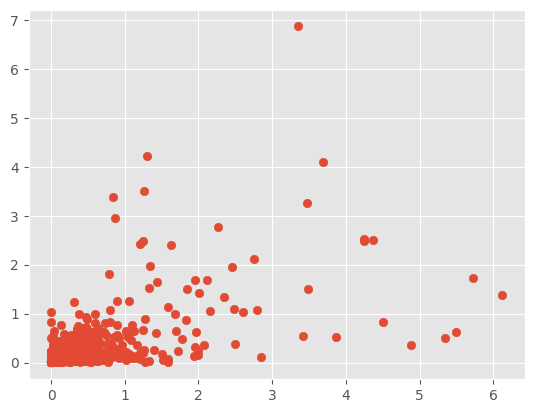

In [ ]:
plt.scatter(EU_test_y, EU_xgb_test_predictions)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

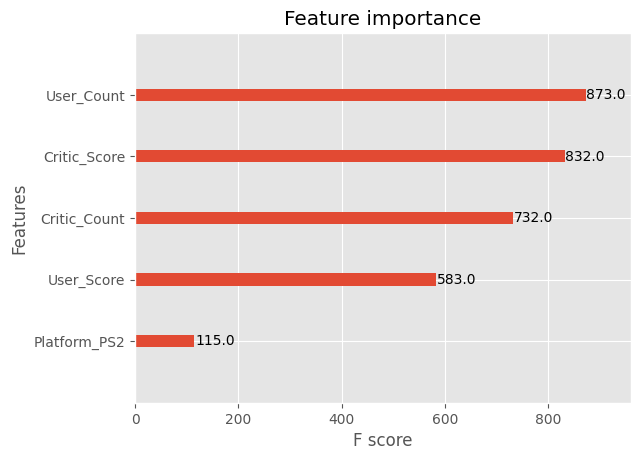

In [ ]:
plot_importance(EU_xgb, max_num_features = 5)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

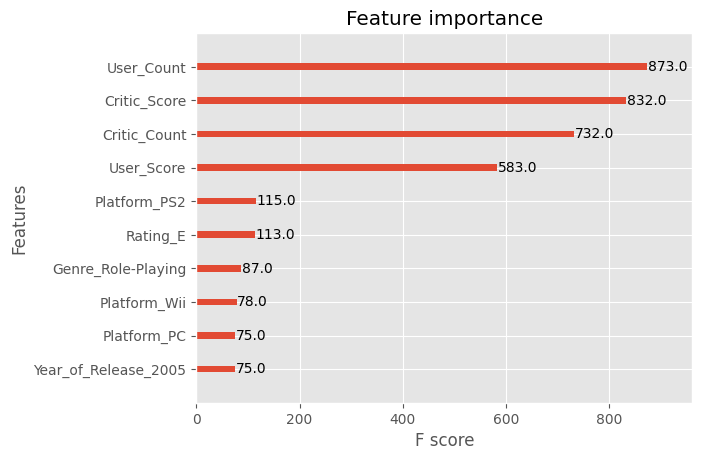

In [ ]:
plot_importance(EU_xgb, max_num_features = 10)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

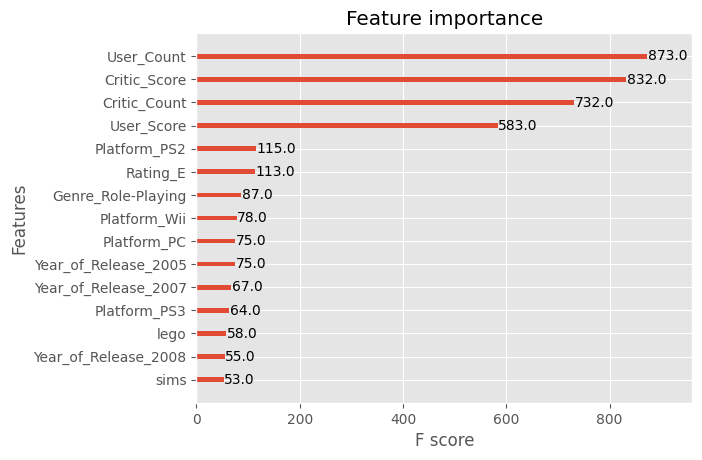

In [ ]:
plot_importance(EU_xgb, max_num_features = 15)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


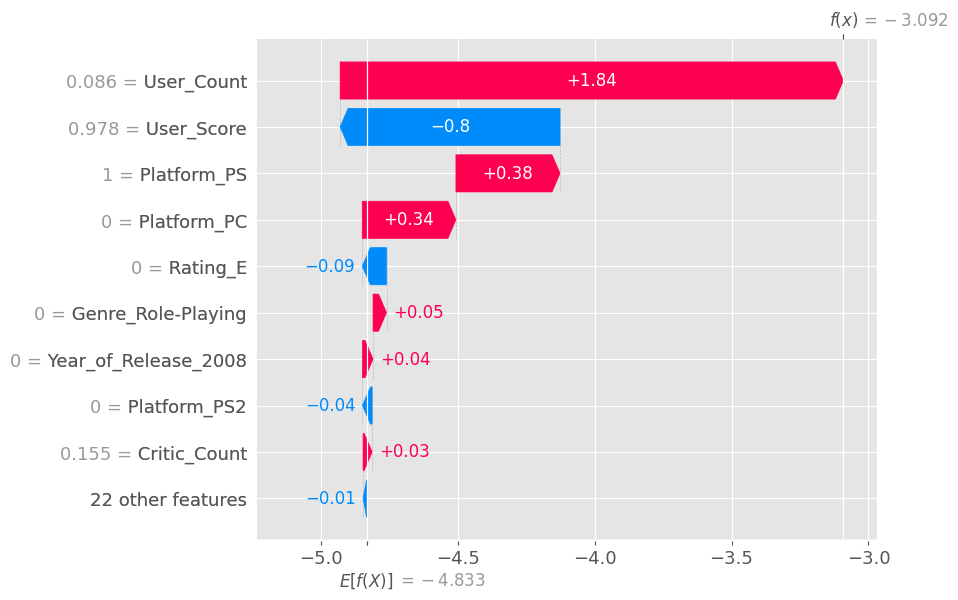

In [ ]:
# https://github.com/slundberg/shap
explainer = shap.Explainer(EU_xgb)
shap_values = explainer(EU_selected_test_X.drop(["Total_Year"], axis = 1))

# This plot is not useful (?)
shap.plots.waterfall(shap_values[0])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


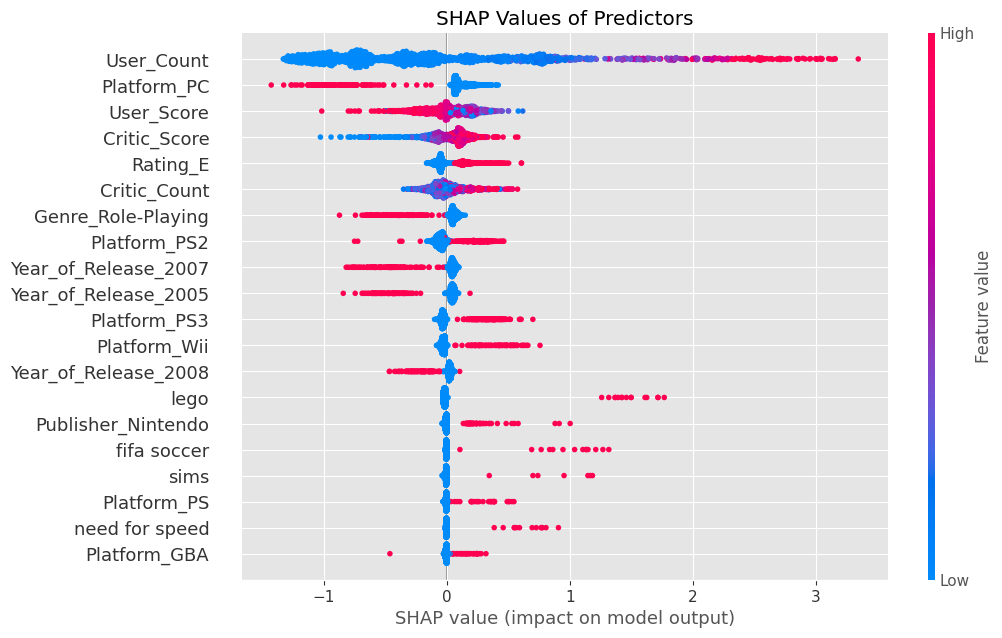

In [ ]:
shap.summary_plot(shap_values, EU_selected_test_X.drop(["Total_Year"], axis = 1), show = False)
plt.title("SHAP Values of Predictors")
plt.gcf().set_size_inches(12,6)

#### Stacking Full

In [ ]:
EU_xgb = XGBRegressor(colsample_bytree = 0.5, eta = 0.1, max_depth = 6, min_child_weight = 5)
EU_xgb.fit(EU_selected_train_X, EU_train_y)
EU_ori_xgb_train_predictions = EU_xgb.predict(EU_selected_train_X)
EU_ori_xgb_test_predictions = EU_xgb.predict(EU_selected_test_X)

In [ ]:
EU_ori_xgb_train_predictions = pd.DataFrame(EU_ori_xgb_train_predictions, columns = ["EU_ori"])
EU_ori_xgb_test_predictions = pd.DataFrame(EU_ori_xgb_test_predictions, columns = ["EU_ori"])

In [ ]:
EU_ori_xgb_train_predictions

EU_ori
0     0.250209
1     0.099476
2     0.177406
3     0.220458
4     0.232026
...        ...
5455  0.070292
5456  0.080146
5457  0.020294
5458  0.081294
5459  0.139239

[5460 rows x 1 columns]

In [ ]:
EU_xgb = XGBRegressor(colsample_bytree = 0.8, eta = 0.1, max_depth = 6, min_child_weight = 1)
EU_xgb.fit(EU_selected_train_X, np.log(EU_train_y["EU_Sales"].apply(lambda x: 0.01 if x == 0 else x)))
EU_log_xgb_train_predictions = np.exp(EU_xgb.predict(EU_selected_train_X))
EU_log_xgb_test_predictions = np.exp(EU_xgb.predict(EU_selected_test_X))

In [ ]:
EU_log_xgb_train_predictions = pd.DataFrame(EU_log_xgb_train_predictions, columns = ["EU_log"])
EU_log_xgb_test_predictions = pd.DataFrame(EU_log_xgb_test_predictions, columns = ["EU_log"])

In [ ]:
EU_log_xgb_train_predictions

EU_log
0     0.083541
1     0.044456
2     0.111123
3     0.157697
4     0.052611
...        ...
5455  0.013761
5456  0.039985
5457  0.023511
5458  0.025943
5459  0.042486

[5460 rows x 1 columns]

In [ ]:
EU_xgb = XGBRegressor(colsample_bytree = 0.8, eta = 0.1, max_depth = 3, min_child_weight = 10)
EU_xgb.fit(EU_selected_train_X.drop(["Total_Year"], axis = 1), EU_train_y["EU_Sales"] / (EU_train_X["Total_Year"] * 31 + 1))
EU_sy_xgb_train_predictions = EU_xgb.predict(EU_selected_train_X.drop(["Total_Year"], axis = 1)) * (EU_train_X["Total_Year"] * 31 + 1)
EU_sy_xgb_test_predictions = EU_xgb.predict(EU_selected_test_X.drop(["Total_Year"], axis = 1)) * (EU_test_X["Total_Year"] * 31 + 1)

In [ ]:
EU_sy_xgb_train_predictions = EU_sy_xgb_train_predictions.to_frame()
EU_sy_xgb_test_predictions = EU_sy_xgb_test_predictions.to_frame()
EU_sy_xgb_train_predictions.columns = ["EU_sy"]
EU_sy_xgb_test_predictions.columns = ["EU_sy"]

In [ ]:
EU_sy_xgb_train_predictions

EU_sy
0     0.228883
1     0.068594
2     0.206079
3     0.170400
4     0.199527
...        ...
5455  0.142014
5456  0.087131
5457  0.056695
5458  0.095023
5459  0.145032

[5460 rows x 1 columns]

In [ ]:
EU_xgb = XGBRegressor(colsample_bytree = 0.8, eta = 0.1, max_depth = 6, min_child_weight = 1)
EU_xgb.fit(EU_selected_train_X.drop(["Total_Year"], axis = 1), 
           np.log(EU_train_y["EU_Sales"].apply(lambda x: 0.01 if x == 0 else x) / (EU_train_X["Total_Year"] * 31 + 1)))
EU_log_sy_xgb_train_predictions = np.exp(EU_xgb.predict(EU_selected_train_X.drop(["Total_Year"], axis = 1))) * (EU_train_X["Total_Year"] * 31 + 1)
EU_log_sy_xgb_test_predictions = np.exp(EU_xgb.predict(EU_selected_test_X.drop(["Total_Year"], axis = 1))) * (EU_test_X["Total_Year"] * 31 + 1)

In [ ]:
EU_log_sy_xgb_train_predictions = EU_log_sy_xgb_train_predictions.to_frame()
EU_log_sy_xgb_test_predictions = EU_log_sy_xgb_test_predictions.to_frame()
EU_log_sy_xgb_train_predictions.columns = ["EU_log_sy"]
EU_log_sy_xgb_test_predictions.columns = ["EU_log_sy"]

In [ ]:
EU_log_sy_xgb_train_predictions

EU_log_sy
0      0.116566
1      0.051765
2      0.167499
3      0.143937
4      0.047095
...         ...
5455   0.011720
5456   0.032390
5457   0.027563
5458   0.034032
5459   0.059281

[5460 rows x 1 columns]

In [ ]:
EU_train_stack = pd.concat([EU_ori_xgb_train_predictions, EU_log_xgb_train_predictions, 
           EU_sy_xgb_train_predictions, EU_log_sy_xgb_train_predictions, EU_train_y], axis = 1)
EU_test_stack = pd.concat([EU_ori_xgb_test_predictions, EU_log_xgb_test_predictions, 
           EU_sy_xgb_test_predictions, EU_log_sy_xgb_test_predictions, EU_test_y], axis = 1)

In [ ]:
EU_train_stack

EU_ori    EU_log     EU_sy  EU_log_sy  EU_Sales
0     0.250209  0.083541  0.228883   0.116566      0.45
1     0.099476  0.044456  0.068594   0.051765      0.02
2     0.177406  0.111123  0.206079   0.167499      0.13
3     0.220458  0.157697  0.170400   0.143937      0.07
4     0.232026  0.052611  0.199527   0.047095      0.00
...        ...       ...       ...        ...       ...
5455  0.070292  0.013761  0.142014   0.011720      0.00
5456  0.080146  0.039985  0.087131   0.032390      0.00
5457  0.020294  0.023511  0.056695   0.027563      0.00
5458  0.081294  0.025943  0.095023   0.034032      0.01
5459  0.139239  0.042486  0.145032   0.059281      0.33

[5460 rows x 5 columns]

In [ ]:
EU_test_stack

EU_ori    EU_log     EU_sy  EU_log_sy  EU_Sales
0     0.801350  0.710259  1.707986   0.863183      1.83
1     0.236180  0.077940  0.121720   0.041185      0.13
2     0.062873  0.032490  0.161933   0.031918      0.05
3     0.007370  0.011548 -0.006906   0.009239      0.11
4     0.113037  0.117673  0.072397   0.052878      0.03
...        ...       ...       ...        ...       ...
1360  0.198480  0.045262  0.135787   0.039662      0.00
1361  0.046829  0.010567  0.069785   0.010780      0.00
1362  0.099307  0.119678  0.077316   0.099744      0.19
1363  0.014923  0.010462  0.090268   0.017968      0.00
1364  0.644864  0.969464  0.674310   0.754199      0.36

[1365 rows x 5 columns]

In [ ]:
lr = LinearRegression()
lr.fit(EU_train_stack.drop(["EU_Sales"], axis = 1), EU_train_stack['EU_Sales'])

LinearRegression()

In [ ]:
lr.coef_

array([ 1.24007247, -0.12386983, -0.20747273,  0.24285179])

In [ ]:
lr.intercept_

-0.018796566887092053

In [ ]:
EU_train_stack_pred = lr.predict(EU_train_stack.drop(["EU_Sales"], axis = 1))
EU_test_stack_pred = lr.predict(EU_test_stack.drop(["EU_Sales"], axis = 1))

In [ ]:
train_n = EU_selected_train_X.shape[0]
train_p = EU_selected_train_X.shape[1] - 1
train_mape = mean_absolute_percentage_error(EU_train_y["EU_Sales"].apply(lambda x: 0.01 if x == 0 else x), 
                                            EU_train_stack_pred)
train_mse = mean_squared_error(EU_train_y, EU_train_stack_pred, squared = True)
train_r2 = r2_score(EU_train_y, EU_train_stack_pred)
train_adj_r2 = 1 - (1 - train_r2) * (train_n - 1) / (train_n - train_p - 1)

In [ ]:
test_n = EU_selected_test_X.shape[0]
test_p = EU_selected_test_X.shape[1] - 1
test_mape = mean_absolute_percentage_error(EU_test_y["EU_Sales"].apply(lambda x: 0.01 if x == 0 else x), 
                                           EU_test_stack_pred)
test_mse = mean_squared_error(EU_test_y, EU_test_stack_pred, squared = True)
test_r2 = r2_score(EU_test_y, EU_test_stack_pred)
test_adj_r2 = 1 - (1 - test_r2) * (test_n - 1) / (test_n - test_p - 1)

In [ ]:
print("Train MAPE: {:.2f}%".format(train_mape * 100))
print("Train MSE:", train_mse)
print("Train R2:", train_r2)
print("Train Adj R2:", train_adj_r2)
print()
print("Test MAPE: {:.2f}%".format(test_mape * 100))
print("Test MSE:", test_mse)
print("Test R2:", test_r2)
print("Test Adj R2:", test_adj_r2)

Train MAPE: 232.29%
Train MSE: 0.06144994576916423
Train R2: 0.878159318104091
Train Adj R2: 0.8774634704366677

Test MAPE: 311.64%
Test MSE: 0.20779744461920735
Test R2: 0.39578884136641956
Test Adj R2: 0.3817374190726154


In [ ]:
EU_train_stack_pred = (EU_train_stack["EU_ori"] + EU_train_stack["EU_log"] + EU_train_stack["EU_sy"] + EU_train_stack["EU_log_sy"]) / 4
EU_test_stack_pred = (EU_test_stack["EU_ori"] + EU_test_stack["EU_log"] + EU_test_stack["EU_sy"] + EU_test_stack["EU_log_sy"]) / 4

In [ ]:
EU_train_stack_pred = EU_train_stack_pred.apply(lambda x: max(0, x))
EU_test_stack_pred = EU_test_stack_pred.apply(lambda x: max(0, x))

In [ ]:
train_n = EU_selected_train_X.shape[0]
train_p = EU_selected_train_X.shape[1] - 1
train_mape = mean_absolute_percentage_error(EU_train_y["EU_Sales"].apply(lambda x: 0.01 if x == 0 else x), 
                                            EU_train_stack_pred)
train_mse = mean_squared_error(EU_train_y, EU_train_stack_pred, squared = True)
train_r2 = r2_score(EU_train_y, EU_train_stack_pred)
train_adj_r2 = 1 - (1 - train_r2) * (train_n - 1) / (train_n - train_p - 1)

In [ ]:
test_n = EU_selected_test_X.shape[0]
test_p = EU_selected_test_X.shape[1] - 1
test_mape = mean_absolute_percentage_error(EU_test_y["EU_Sales"].apply(lambda x: 0.01 if x == 0 else x), 
                                           EU_test_stack_pred)
test_mse = mean_squared_error(EU_test_y, EU_test_stack_pred, squared = True)
test_r2 = r2_score(EU_test_y, EU_test_stack_pred)
test_adj_r2 = 1 - (1 - test_r2) * (test_n - 1) / (test_n - test_p - 1)

In [ ]:
print("Train MAPE: {:.2f}%".format(train_mape * 100))
print("Train MSE:", train_mse)
print("Train R2:", train_r2)
print("Train Adj R2:", train_adj_r2)
print()
print("Test MAPE: {:.2f}%".format(test_mape * 100))
print("Test MSE:", test_mse)
print("Test R2:", test_r2)
print("Test Adj R2:", test_adj_r2)

Train MAPE: 206.45%
Train MSE: 0.13997791778101948
Train R2: 0.7224569568071587
Train Adj R2: 0.7208718731043255

Test MAPE: 245.80%
Test MSE: 0.1884451710055198
Test R2: 0.45205931035003777
Test Adj R2: 0.4393165036139921


#### Stacking Partial

In [ ]:
EU_xgb = XGBRegressor(colsample_bytree = 0.5, eta = 0.1, max_depth = 6, min_child_weight = 5)
EU_xgb.fit(EU_selected_train_X, EU_train_y)
EU_ori_xgb_train_predictions = EU_xgb.predict(EU_selected_train_X)
EU_ori_xgb_test_predictions = EU_xgb.predict(EU_selected_test_X)

In [ ]:
EU_ori_xgb_train_predictions = pd.DataFrame(EU_ori_xgb_train_predictions, columns = ["EU_ori"])
EU_ori_xgb_test_predictions = pd.DataFrame(EU_ori_xgb_test_predictions, columns = ["EU_ori"])

In [ ]:
EU_ori_xgb_train_predictions

EU_ori
0     0.250209
1     0.099476
2     0.177406
3     0.220458
4     0.232026
...        ...
5455  0.070292
5456  0.080146
5457  0.020294
5458  0.081294
5459  0.139239

[5460 rows x 1 columns]

In [ ]:
EU_xgb = XGBRegressor(colsample_bytree = 0.8, eta = 0.1, max_depth = 6, min_child_weight = 1)
EU_xgb.fit(EU_selected_train_X, np.log(EU_train_y["EU_Sales"].apply(lambda x: 0.01 if x == 0 else x)))
EU_log_xgb_train_predictions = np.exp(EU_xgb.predict(EU_selected_train_X))
EU_log_xgb_test_predictions = np.exp(EU_xgb.predict(EU_selected_test_X))

In [ ]:
EU_log_xgb_train_predictions = pd.DataFrame(EU_log_xgb_train_predictions, columns = ["EU_log"])
EU_log_xgb_test_predictions = pd.DataFrame(EU_log_xgb_test_predictions, columns = ["EU_log"])

In [ ]:
EU_log_xgb_train_predictions

EU_log
0     0.083541
1     0.044456
2     0.111123
3     0.157697
4     0.052611
...        ...
5455  0.013761
5456  0.039985
5457  0.023511
5458  0.025943
5459  0.042486

[5460 rows x 1 columns]

In [ ]:
EU_train_stack = pd.concat([EU_ori_xgb_train_predictions, EU_log_xgb_train_predictions, EU_train_y], axis = 1)
EU_test_stack = pd.concat([EU_ori_xgb_test_predictions, EU_log_xgb_test_predictions, EU_test_y], axis = 1)

In [ ]:
EU_train_stack

EU_ori    EU_log  EU_Sales
0     0.250209  0.083541      0.45
1     0.099476  0.044456      0.02
2     0.177406  0.111123      0.13
3     0.220458  0.157697      0.07
4     0.232026  0.052611      0.00
...        ...       ...       ...
5455  0.070292  0.013761      0.00
5456  0.080146  0.039985      0.00
5457  0.020294  0.023511      0.00
5458  0.081294  0.025943      0.01
5459  0.139239  0.042486      0.33

[5460 rows x 3 columns]

In [ ]:
EU_test_stack

EU_ori    EU_log  EU_Sales
0     0.801350  0.710259      1.83
1     0.236180  0.077940      0.13
2     0.062873  0.032490      0.05
3     0.007370  0.011548      0.11
4     0.113037  0.117673      0.03
...        ...       ...       ...
1360  0.198480  0.045262      0.00
1361  0.046829  0.010567      0.00
1362  0.099307  0.119678      0.19
1363  0.014923  0.010462      0.00
1364  0.644864  0.969464      0.36

[1365 rows x 3 columns]

In [ ]:
lr = LinearRegression()
lr.fit(EU_train_stack.drop(["EU_Sales"], axis = 1), EU_train_stack['EU_Sales'])

LinearRegression()

In [ ]:
lr.coef_

array([ 1.1829542 , -0.04052896], dtype=float32)

In [ ]:
lr.intercept_

-0.035829782

In [ ]:
EU_train_stack_pred = lr.predict(EU_train_stack.drop(["EU_Sales"], axis = 1))
EU_test_stack_pred = lr.predict(EU_test_stack.drop(["EU_Sales"], axis = 1))

In [ ]:
train_n = EU_selected_train_X.shape[0]
train_p = EU_selected_train_X.shape[1] - 1
train_mape = mean_absolute_percentage_error(EU_train_y["EU_Sales"].apply(lambda x: 0.01 if x == 0 else x), 
                                            EU_train_stack_pred)
train_mse = mean_squared_error(EU_train_y, EU_train_stack_pred, squared = True)
train_r2 = r2_score(EU_train_y, EU_train_stack_pred)
train_adj_r2 = 1 - (1 - train_r2) * (train_n - 1) / (train_n - train_p - 1)

In [ ]:
test_n = EU_selected_test_X.shape[0]
test_p = EU_selected_test_X.shape[1] - 1
test_mape = mean_absolute_percentage_error(EU_test_y["EU_Sales"].apply(lambda x: 0.01 if x == 0 else x), 
                                           EU_test_stack_pred)
test_mse = mean_squared_error(EU_test_y, EU_test_stack_pred, squared = True)
test_r2 = r2_score(EU_test_y, EU_test_stack_pred)
test_adj_r2 = 1 - (1 - test_r2) * (test_n - 1) / (test_n - test_p - 1)

In [ ]:
print("Train MAPE: {:.2f}%".format(train_mape * 100))
print("Train MSE:", train_mse)
print("Train R2:", train_r2)
print("Train Adj R2:", train_adj_r2)
print()
print("Test MAPE: {:.2f}%".format(test_mape * 100))
print("Test MSE:", test_mse)
print("Test R2:", test_r2)
print("Test Adj R2:", test_adj_r2)

Train MAPE: 241.63%
Train MSE: 0.06493716350372847
Train R2: 0.8712449916326749
Train Adj R2: 0.870509655365286

Test MAPE: 312.39%
Test MSE: 0.20544584773336566
Test R2: 0.402626562983436
Test Adj R2: 0.3887341574714229


In [ ]:
EU_train_stack_pred = (EU_train_stack["EU_ori"] + EU_train_stack["EU_log"]) / 2
EU_test_stack_pred = (EU_test_stack["EU_ori"] + EU_test_stack["EU_log"]) / 2

In [ ]:
EU_train_stack_pred = EU_train_stack_pred.apply(lambda x: max(0, x))
EU_test_stack_pred = EU_test_stack_pred.apply(lambda x: max(0, x))

In [ ]:
train_n = EU_selected_train_X.shape[0]
train_p = EU_selected_train_X.shape[1] - 1
train_mape = mean_absolute_percentage_error(EU_train_y["EU_Sales"].apply(lambda x: 0.01 if x == 0 else x), 
                                            EU_train_stack_pred)
train_mse = mean_squared_error(EU_train_y, EU_train_stack_pred, squared = True)
train_r2 = r2_score(EU_train_y, EU_train_stack_pred)
train_adj_r2 = 1 - (1 - train_r2) * (train_n - 1) / (train_n - train_p - 1)

In [ ]:
test_n = EU_selected_test_X.shape[0]
test_p = EU_selected_test_X.shape[1] - 1
test_mape = mean_absolute_percentage_error(EU_test_y["EU_Sales"].apply(lambda x: 0.01 if x == 0 else x), 
                                           EU_test_stack_pred)
test_mse = mean_squared_error(EU_test_y, EU_test_stack_pred, squared = True)
test_r2 = r2_score(EU_test_y, EU_test_stack_pred)
test_adj_r2 = 1 - (1 - test_r2) * (test_n - 1) / (test_n - test_p - 1)

In [ ]:
print("Train MAPE: {:.2f}%".format(train_mape * 100))
print("Train MSE:", train_mse)
print("Train R2:", train_r2)
print("Train Adj R2:", train_adj_r2)
print()
print("Test MAPE: {:.2f}%".format(test_mape * 100))
print("Test MSE:", test_mse)
print("Test R2:", test_r2)
print("Test Adj R2:", test_adj_r2)

Train MAPE: 167.43%
Train MSE: 0.10746851815372001
Train R2: 0.786915393166014
Train Adj R2: 0.7856984398108458

Test MAPE: 219.33%
Test MSE: 0.1723831525092812
Test R2: 0.49876272782175224
Test Adj R2: 0.487106047073421


### Other

#### Original

In [ ]:
# test_params = {
#  'max_depth': [3, 6, 10],
#  'eta': [0.03, 0.1, 0.2, 0.3],
#  'min_child_weight': [1, 5, 10, 20],
#  'colsample_bytree': [0.5, 0.8, 1]
# }

# xgb_model = XGBRegressor()

# cv_model = GridSearchCV(estimator = xgb_model, param_grid = test_params)
# cv_model.fit(Other_selected_train_X, Other_train_y)
# cv_model.best_params_

In [ ]:
Other_xgb = XGBRegressor(colsample_bytree = 0.8, eta = 0.1, max_depth = 10, min_child_weight = 20)
Other_xgb.fit(Other_selected_train_X, Other_train_y)
Other_xgb_train_predictions = Other_xgb.predict(Other_selected_train_X)
Other_xgb_test_predictions = Other_xgb.predict(Other_selected_test_X)

In [ ]:
Other_xgb_train_predictions = pd.DataFrame(Other_xgb_train_predictions, columns = ["Other_Sales"])
Other_xgb_test_predictions = pd.DataFrame(Other_xgb_test_predictions, columns = ["Other_Sales"])

In [ ]:
Other_xgb_train_predictions["Other_Sales"] = Other_xgb_train_predictions["Other_Sales"].apply(lambda x: max(0, x))
Other_xgb_test_predictions["Other_Sales"] = Other_xgb_test_predictions["Other_Sales"].apply(lambda x: max(0, x))

In [ ]:
train_n = Other_selected_train_X.shape[0]
train_p = Other_selected_train_X.shape[1]
train_mape = mean_absolute_percentage_error(Other_train_y["Other_Sales"].apply(lambda x: 0.01 if x == 0 else x), 
                                            Other_xgb_train_predictions)
train_mse = mean_squared_error(Other_train_y, Other_xgb_train_predictions, squared = True)
train_r2 = r2_score(Other_train_y, Other_xgb_train_predictions)
train_adj_r2 = 1 - (1 - train_r2) * (train_n - 1) / (train_n - train_p - 1)

In [ ]:
test_n = Other_selected_test_X.shape[0]
test_p = Other_selected_test_X.shape[1]
test_mape = mean_absolute_percentage_error(Other_test_y["Other_Sales"].apply(lambda x: 0.01 if x == 0 else x), 
                                           Other_xgb_test_predictions)
test_mse = mean_squared_error(Other_test_y, Other_xgb_test_predictions, squared = True)
test_r2 = r2_score(Other_test_y, Other_xgb_test_predictions)
test_adj_r2 = 1 - (1 - test_r2) * (test_n - 1) / (test_n - test_p - 1)

In [ ]:
print("Train MAPE: {:.2f}%".format(train_mape * 100))
print("Train MSE:", train_mse)
print("Train R2:", train_r2)
print("Train Adj R2:", train_adj_r2)
print()
print("Test MAPE: {:.2f}%".format(test_mape * 100))
print("Test MSE:", test_mse)
print("Test R2:", test_r2)
print("Test Adj R2:", test_adj_r2)

Train MAPE: 125.15%
Train MSE: 0.028517740120396158
Train R2: 0.6473559700972902
Train Adj R2: 0.6454726041917325

Test MAPE: 153.37%
Test MSE: 0.02260285059614835
Test R2: 0.44328383544160643
Test Adj R2: 0.43119037568715446


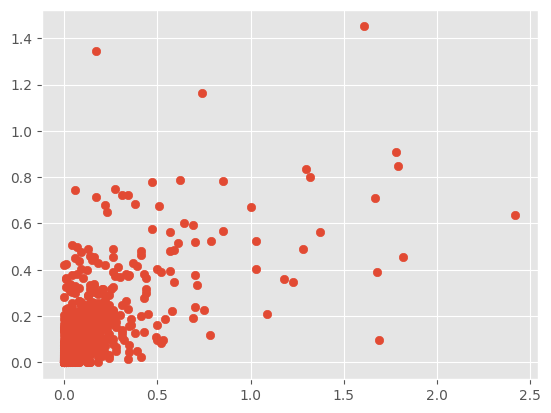

In [ ]:
plt.scatter(Other_test_y, Other_xgb_test_predictions)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

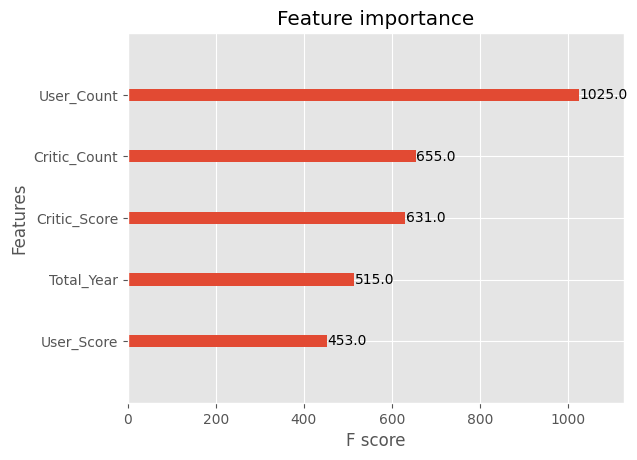

In [ ]:
plot_importance(Other_xgb, max_num_features = 5)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

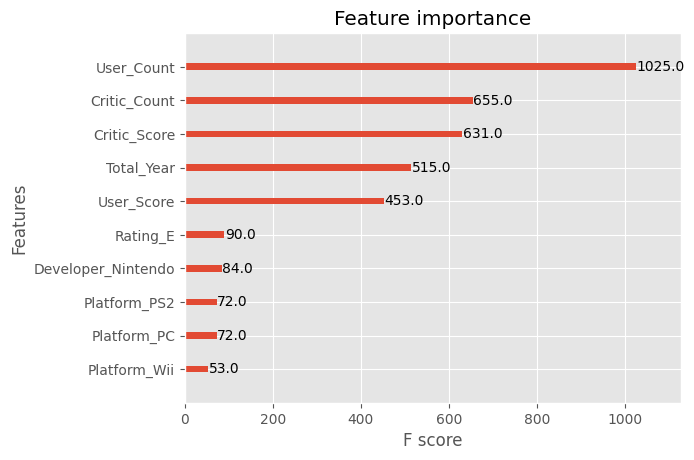

In [ ]:
plot_importance(Other_xgb, max_num_features = 10)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

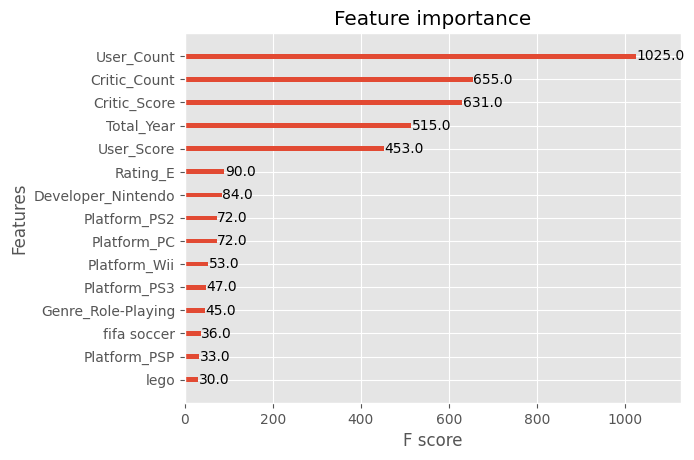

In [ ]:
plot_importance(Other_xgb, max_num_features = 15)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


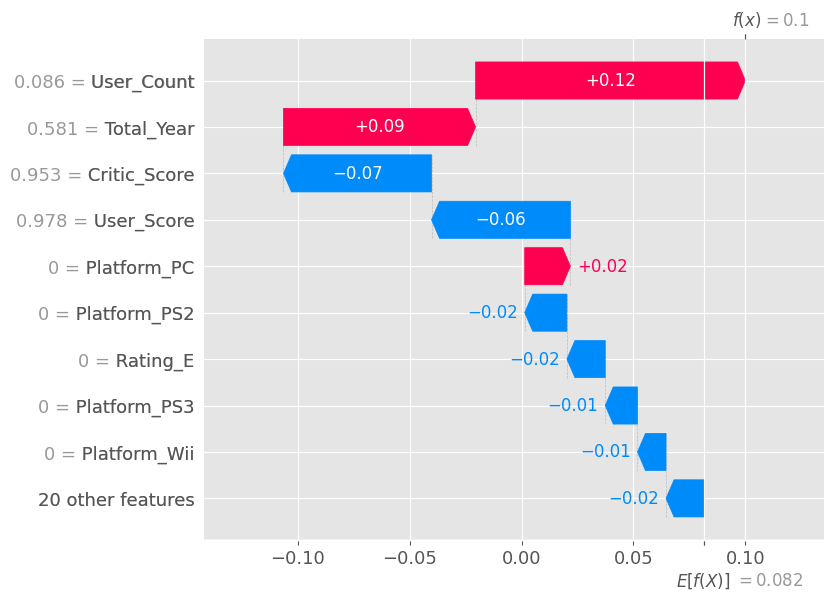

In [ ]:
# https://github.com/slundberg/shap
explainer = shap.Explainer(Other_xgb)
shap_values = explainer(Other_selected_test_X)

# This plot is not useful (?)
shap.plots.waterfall(shap_values[0])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


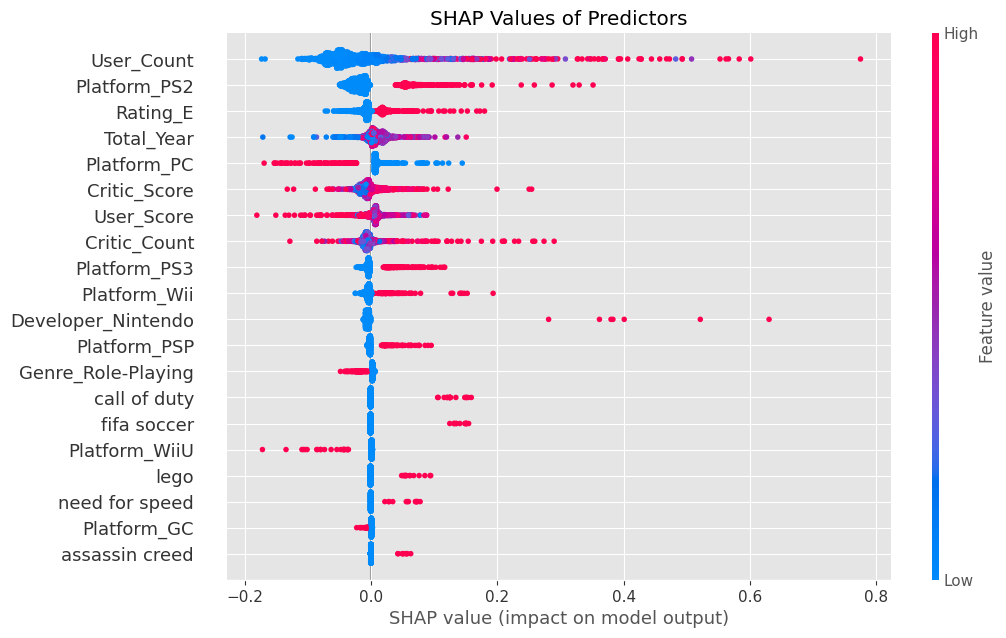

In [ ]:
shap.summary_plot(shap_values, Other_selected_test_X, show = False)
plt.title("SHAP Values of Predictors")
plt.gcf().set_size_inches(12,6)

#### Log Transform

In [ ]:
# test_params = {
#  'max_depth': [3, 6, 10],
#  'eta': [0.03, 0.1, 0.2, 0.3],
#  'min_child_weight': [1, 5, 10, 20],
#  'colsample_bytree': [0.5, 0.8, 1]
# }

# xgb_model = XGBRegressor()

# cv_model = GridSearchCV(estimator = xgb_model, param_grid = test_params)
# cv_model.fit(Other_selected_train_X, np.log(Other_train_y["Other_Sales"].apply(lambda x: 0.01 if x == 0 else x)))
# cv_model.best_params_

In [ ]:
Other_xgb = XGBRegressor(colsample_bytree = 1, eta = 0.1, max_depth = 6, min_child_weight = 5)
Other_xgb.fit(Other_selected_train_X, np.log(Other_train_y["Other_Sales"].apply(lambda x: 0.01 if x == 0 else x)))
Other_xgb_train_predictions = np.exp(Other_xgb.predict(Other_selected_train_X))
Other_xgb_test_predictions = np.exp(Other_xgb.predict(Other_selected_test_X))

In [ ]:
Other_xgb_train_predictions = pd.DataFrame(Other_xgb_train_predictions, columns = ["Other_Sales"])
Other_xgb_test_predictions = pd.DataFrame(Other_xgb_test_predictions, columns = ["Other_Sales"])

In [ ]:
Other_xgb_train_predictions["Other_Sales"] = Other_xgb_train_predictions["Other_Sales"].apply(lambda x: max(0, x))
Other_xgb_test_predictions["Other_Sales"] = Other_xgb_test_predictions["Other_Sales"].apply(lambda x: max(0, x))

In [ ]:
train_n = Other_selected_train_X.shape[0]
train_p = Other_selected_train_X.shape[1]
train_mape = mean_absolute_percentage_error(Other_train_y["Other_Sales"].apply(lambda x: 0.01 if x == 0 else x), 
                                            Other_xgb_train_predictions)
train_mse = mean_squared_error(Other_train_y, Other_xgb_train_predictions, squared = True)
train_r2 = r2_score(Other_train_y, Other_xgb_train_predictions)
train_adj_r2 = 1 - (1 - train_r2) * (train_n - 1) / (train_n - train_p - 1)

In [ ]:
test_n = Other_selected_test_X.shape[0]
test_p = Other_selected_test_X.shape[1]
test_mape = mean_absolute_percentage_error(Other_test_y["Other_Sales"].apply(lambda x: 0.01 if x == 0 else x), 
                                           Other_xgb_test_predictions)
test_mse = mean_squared_error(Other_test_y, Other_xgb_test_predictions, squared = True)
test_r2 = r2_score(Other_test_y, Other_xgb_test_predictions)
test_adj_r2 = 1 - (1 - test_r2) * (test_n - 1) / (test_n - test_p - 1)

In [ ]:
print("Train MAPE: {:.2f}%".format(train_mape * 100))
print("Train MSE:", train_mse)
print("Train R2:", train_r2)
print("Train Adj R2:", train_adj_r2)
print()
print("Test MAPE: {:.2f}%".format(test_mape * 100))
print("Test MSE:", test_mse)
print("Test R2:", test_r2)
print("Test Adj R2:", test_adj_r2)

Train MAPE: 51.20%
Train MSE: 0.03599047618592719
Train R2: 0.5549497783926589
Train Adj R2: 0.552572898756082

Test MAPE: 66.56%
Test MSE: 0.020996621543878605
Test R2: 0.48284582226172257
Test Adj R2: 0.4716117614719023


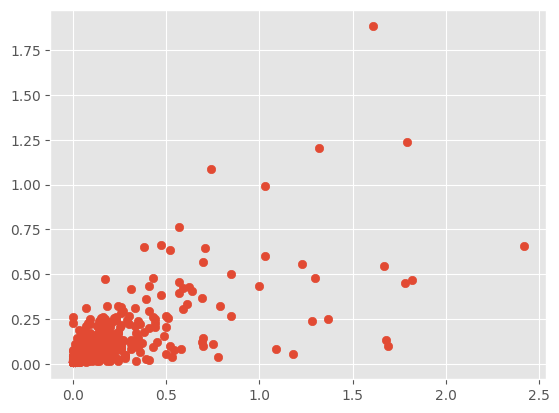

In [ ]:
plt.scatter(Other_test_y, Other_xgb_test_predictions)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

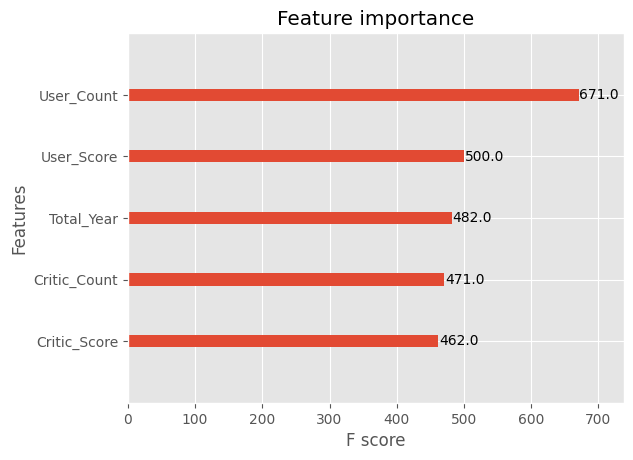

In [ ]:
plot_importance(Other_xgb, max_num_features = 5)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

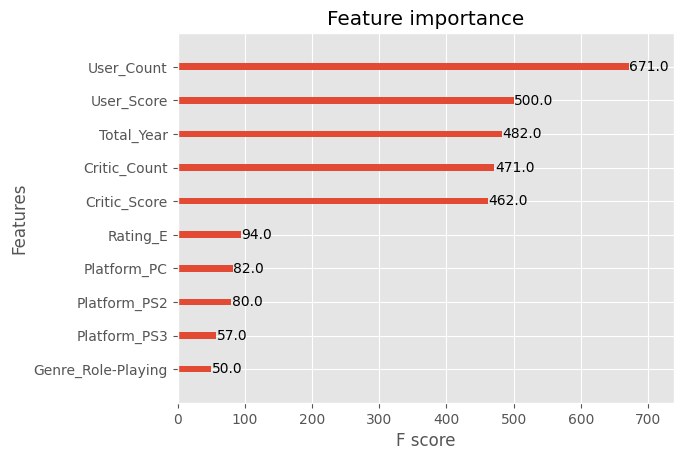

In [ ]:
plot_importance(Other_xgb, max_num_features = 10)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

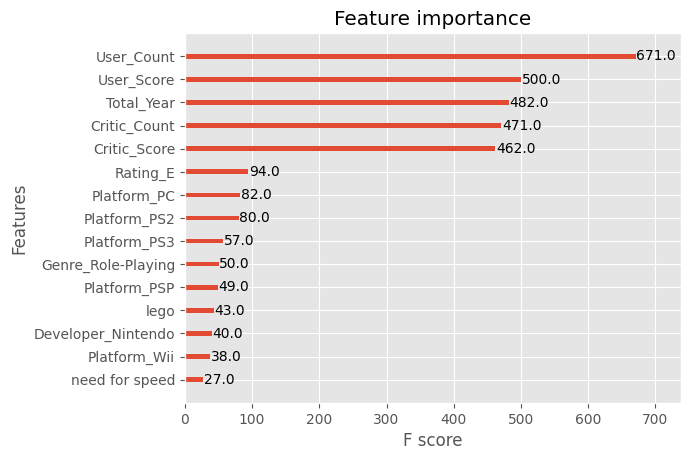

In [ ]:
plot_importance(Other_xgb, max_num_features = 15)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


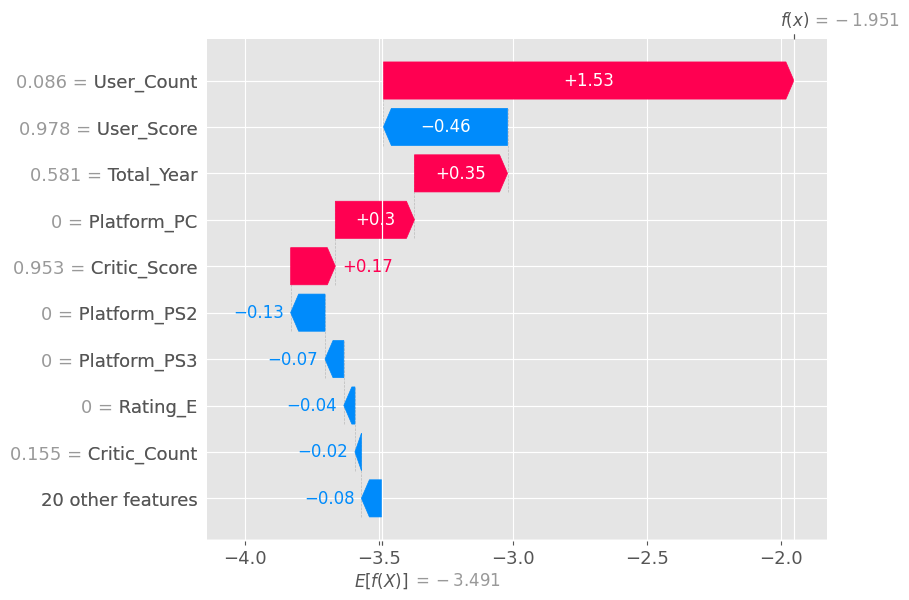

In [ ]:
# https://github.com/slundberg/shap
explainer = shap.Explainer(Other_xgb)
shap_values = explainer(Other_selected_test_X)

# This plot is not useful (?)
shap.plots.waterfall(shap_values[0])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


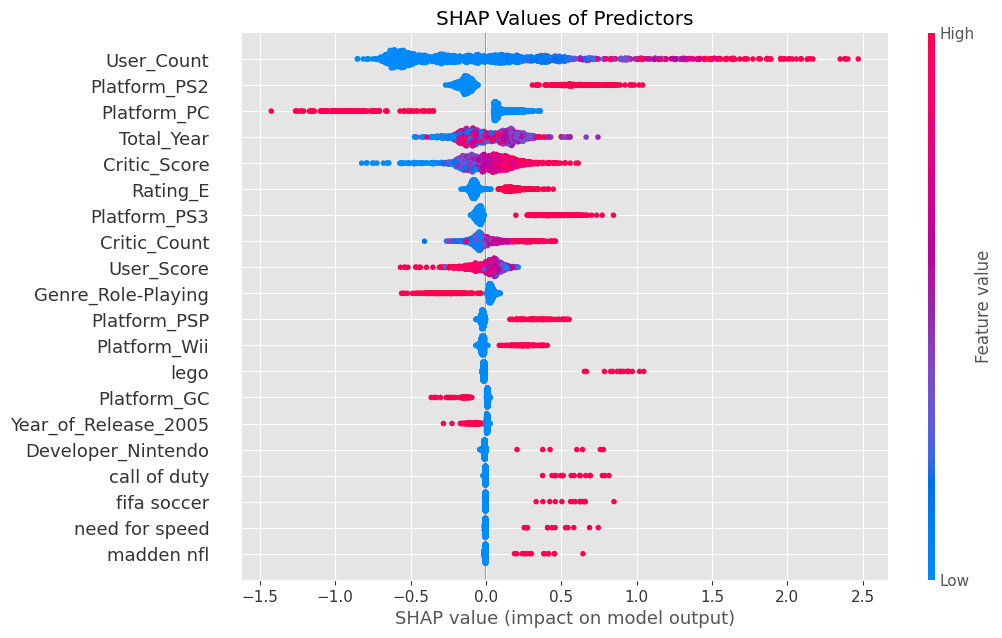

In [ ]:
shap.summary_plot(shap_values, Other_selected_test_X, show = False)
plt.title("SHAP Values of Predictors")
plt.gcf().set_size_inches(12,6)

#### Sales / Year

In [ ]:
# test_params = {
#  'max_depth': [3, 6, 10],
#  'eta': [0.03, 0.1, 0.2, 0.3],
#  'min_child_weight': [1, 5, 10, 20],
#  'colsample_bytree': [0.5, 0.8, 1]
# }

# xgb_model = XGBRegressor()

# cv_model = GridSearchCV(estimator = xgb_model, param_grid = test_params)
# cv_model.fit(Other_selected_train_X.drop(["Total_Year"], axis = 1), Other_train_y["Other_Sales"] / (Other_train_X["Total_Year"] * 31 + 1))
# cv_model.best_params_

In [ ]:
Other_xgb = XGBRegressor(colsample_bytree = 1, eta = 0.1, max_depth = 3, min_child_weight = 20)
Other_xgb.fit(Other_selected_train_X.drop(["Total_Year"], axis = 1), Other_train_y["Other_Sales"] / (Other_train_X["Total_Year"] * 31 + 1))
Other_xgb_train_predictions = Other_xgb.predict(Other_selected_train_X.drop(["Total_Year"], axis = 1)) * (Other_train_X["Total_Year"] * 31 + 1)
Other_xgb_test_predictions = Other_xgb.predict(Other_selected_test_X.drop(["Total_Year"], axis = 1)) * (Other_test_X["Total_Year"] * 31 + 1)

In [ ]:
Other_xgb_train_predictions = Other_xgb_train_predictions.apply(lambda x: max(0, x))
Other_xgb_test_predictions = Other_xgb_test_predictions.apply(lambda x: max(0, x))

In [ ]:
train_n = Other_selected_train_X.shape[0]
train_p = Other_selected_train_X.shape[1] - 1
train_mape = mean_absolute_percentage_error(Other_train_y["Other_Sales"].apply(lambda x: 0.01 if x == 0 else x), 
                                            Other_xgb_train_predictions)
train_mse = mean_squared_error(Other_train_y, Other_xgb_train_predictions, squared = True)
train_r2 = r2_score(Other_train_y, Other_xgb_train_predictions)
train_adj_r2 = 1 - (1 - train_r2) * (train_n - 1) / (train_n - train_p - 1)

In [ ]:
test_n = Other_selected_test_X.shape[0]
test_p = Other_selected_test_X.shape[1] - 1
test_mape = mean_absolute_percentage_error(Other_test_y["Other_Sales"].apply(lambda x: 0.01 if x == 0 else x), 
                                           Other_xgb_test_predictions)
test_mse = mean_squared_error(Other_test_y, Other_xgb_test_predictions, squared = True)
test_r2 = r2_score(Other_test_y, Other_xgb_test_predictions)
test_adj_r2 = 1 - (1 - test_r2) * (test_n - 1) / (test_n - test_p - 1)

In [ ]:
print("Train MAPE: {:.2f}%".format(train_mape * 100))
print("Train MSE:", train_mse)
print("Train R2:", train_r2)
print("Train Adj R2:", train_adj_r2)
print()
print("Test MAPE: {:.2f}%".format(test_mape * 100))
print("Test MSE:", test_mse)
print("Test R2:", test_r2)
print("Test Adj R2:", test_adj_r2)

Train MAPE: 212.88%
Train MSE: 0.0528796498139663
Train R2: 0.3461020146928071
Train Adj R2: 0.3427307858972627

Test MAPE: 200.55%
Test MSE: 0.03253928139576599
Test R2: 0.19854604802705478
Test Adj R2: 0.18174910891384932


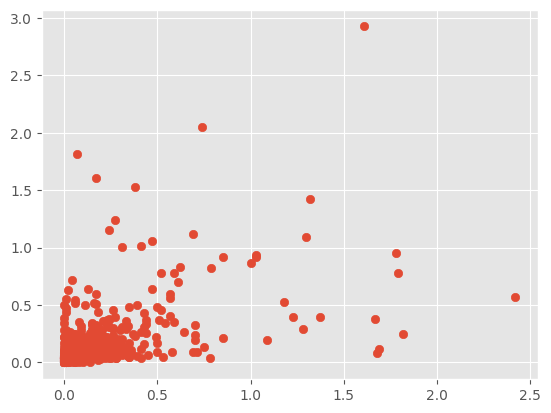

In [ ]:
plt.scatter(Other_test_y, Other_xgb_test_predictions)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

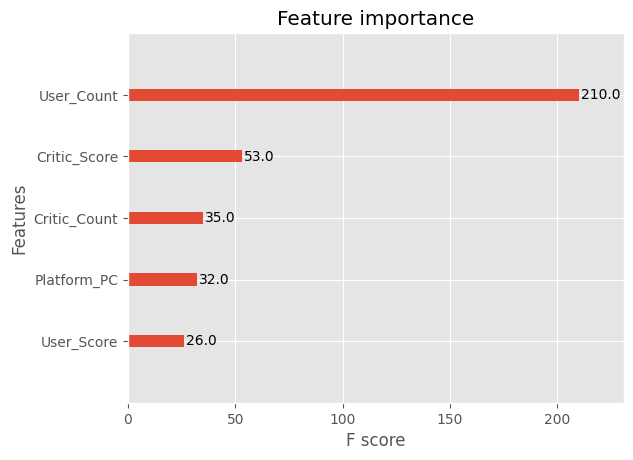

In [ ]:
plot_importance(Other_xgb, max_num_features = 5)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

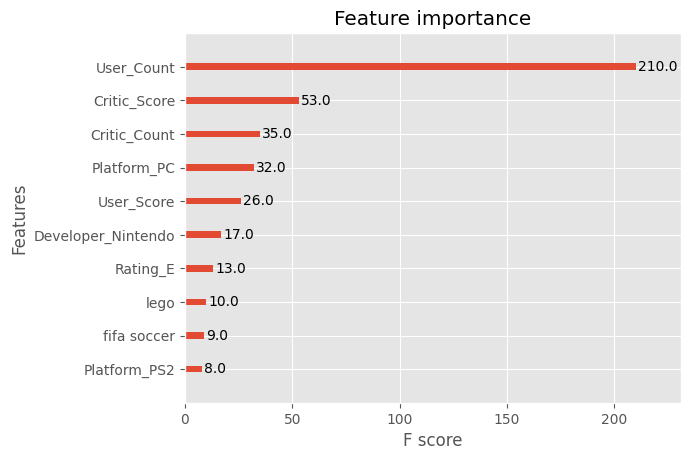

In [ ]:
plot_importance(Other_xgb, max_num_features = 10)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

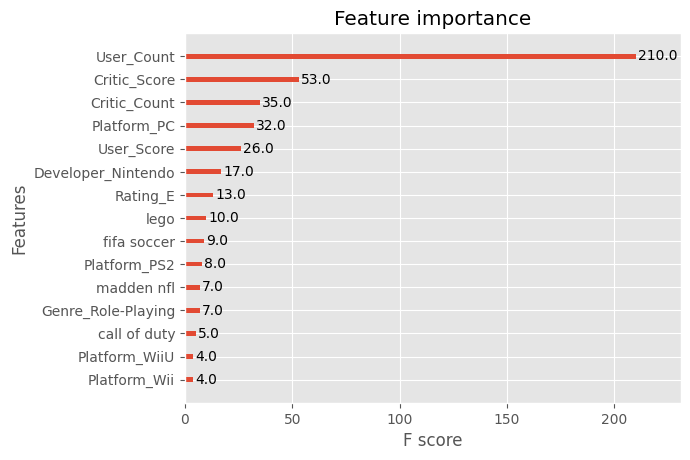

In [ ]:
plot_importance(Other_xgb, max_num_features = 15)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


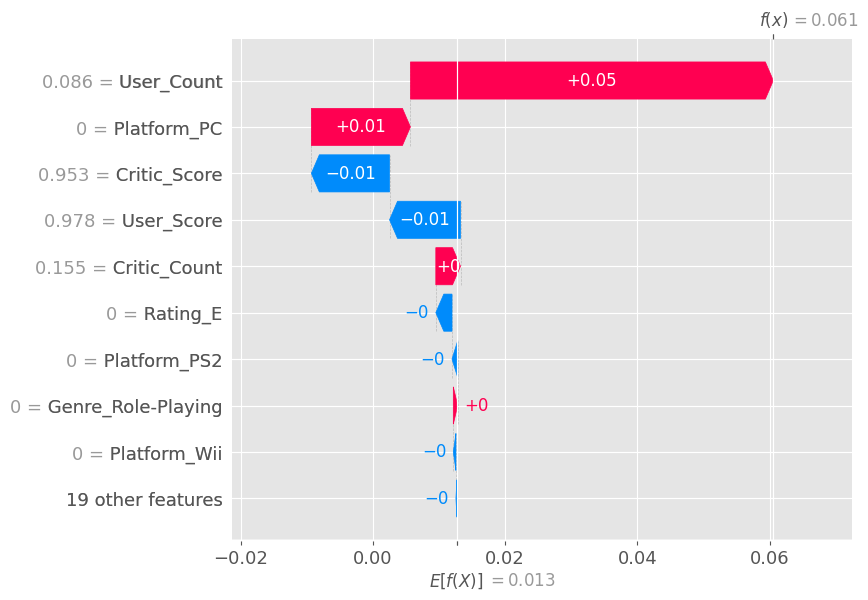

In [ ]:
# https://github.com/slundberg/shap
explainer = shap.Explainer(Other_xgb)
shap_values = explainer(Other_selected_test_X.drop(["Total_Year"], axis = 1))

# This plot is not useful (?)
shap.plots.waterfall(shap_values[0])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


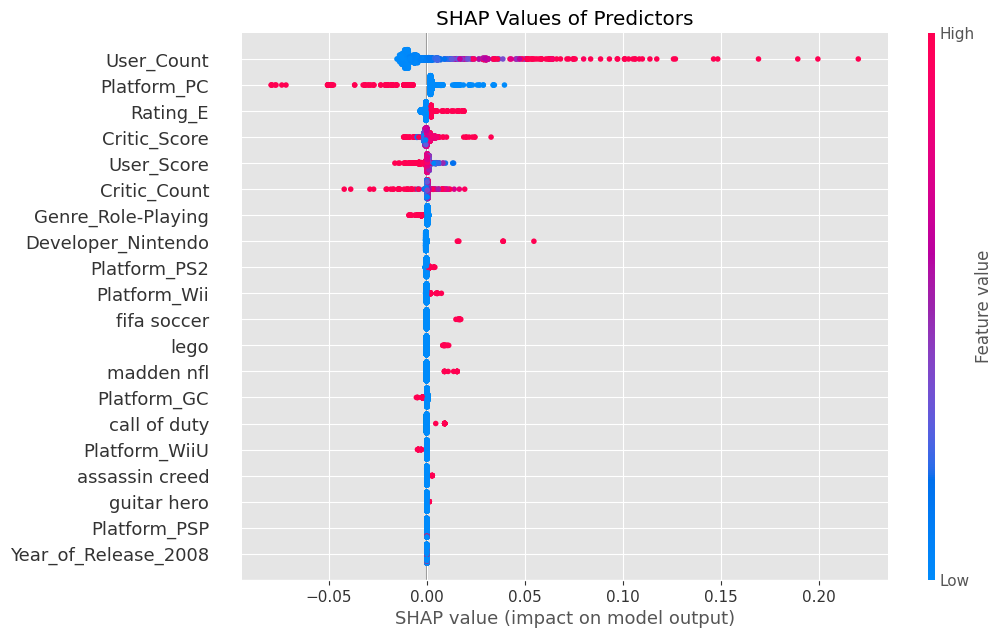

In [ ]:
shap.summary_plot(shap_values, Other_selected_test_X.drop(["Total_Year"], axis = 1), show = False)
plt.title("SHAP Values of Predictors")
plt.gcf().set_size_inches(12,6)

#### Log Sales / Year

In [ ]:
# test_params = {
#  'max_depth': [3, 6, 10],
#  'eta': [0.03, 0.1, 0.2, 0.3],
#  'min_child_weight': [1, 5, 10, 20],
#  'colsample_bytree': [0.5, 0.8, 1]
# }

# xgb_model = XGBRegressor()

# cv_model = GridSearchCV(estimator = xgb_model, param_grid = test_params)
# cv_model.fit(Other_selected_train_X.drop(["Total_Year"], axis = 1), 
#            np.log(Other_train_y["Other_Sales"].apply(lambda x: 0.01 if x == 0 else x) / (Other_train_X["Total_Year"] * 31 + 1)))
# cv_model.best_params_

In [ ]:
Other_xgb = XGBRegressor(colsample_bytree = 1, eta = 0.1, max_depth = 6, min_child_weight = 10)
Other_xgb.fit(Other_selected_train_X.drop(["Total_Year"], axis = 1), 
           np.log(Other_train_y["Other_Sales"].apply(lambda x: 0.01 if x == 0 else x) / (Other_train_X["Total_Year"] * 31 + 1)))
Other_xgb_train_predictions = np.exp(Other_xgb.predict(Other_selected_train_X.drop(["Total_Year"], axis = 1))) * (Other_train_X["Total_Year"] * 31 + 1)
Other_xgb_test_predictions = np.exp(Other_xgb.predict(Other_selected_test_X.drop(["Total_Year"], axis = 1))) * (Other_test_X["Total_Year"] * 31 + 1)

In [ ]:
Other_xgb_train_predictions = Other_xgb_train_predictions.apply(lambda x: max(0, x))
Other_xgb_test_predictions = Other_xgb_test_predictions.apply(lambda x: max(0, x))

In [ ]:
train_n = Other_selected_train_X.shape[0]
train_p = Other_selected_train_X.shape[1] - 1
train_mape = mean_absolute_percentage_error(Other_train_y["Other_Sales"].apply(lambda x: 0.01 if x == 0 else x), 
                                            Other_xgb_train_predictions)
train_mse = mean_squared_error(Other_train_y, Other_xgb_train_predictions, squared = True)
train_r2 = r2_score(Other_train_y, Other_xgb_train_predictions)
train_adj_r2 = 1 - (1 - train_r2) * (train_n - 1) / (train_n - train_p - 1)

In [ ]:
test_n = Other_selected_test_X.shape[0]
test_p = Other_selected_test_X.shape[1] - 1
test_mape = mean_absolute_percentage_error(Other_test_y["Other_Sales"].apply(lambda x: 0.01 if x == 0 else x), 
                                           Other_xgb_test_predictions)
test_mse = mean_squared_error(Other_test_y, Other_xgb_test_predictions, squared = True)
test_r2 = r2_score(Other_test_y, Other_xgb_test_predictions)
test_adj_r2 = 1 - (1 - test_r2) * (test_n - 1) / (test_n - test_p - 1)

In [ ]:
print("Train MAPE: {:.2f}%".format(train_mape * 100))
print("Train MSE:", train_mse)
print("Train R2:", train_r2)
print("Train Adj R2:", train_adj_r2)
print()
print("Test MAPE: {:.2f}%".format(test_mape * 100))
print("Test MSE:", test_mse)
print("Test R2:", test_r2)
print("Test Adj R2:", test_adj_r2)

Train MAPE: 64.62%
Train MSE: 0.04361411234696216
Train R2: 0.46067758967821715
Train Adj R2: 0.4578970653753246

Test MAPE: 78.18%
Test MSE: 0.023575441345921388
Test R2: 0.41932858300141695
Test Adj R2: 0.40715882276491977


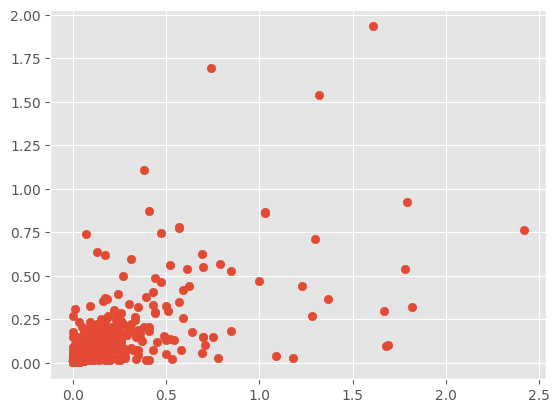

In [ ]:
plt.scatter(Other_test_y, Other_xgb_test_predictions)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

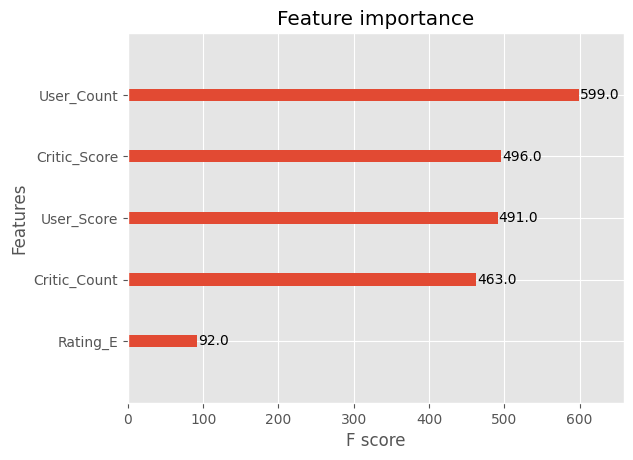

In [ ]:
plot_importance(Other_xgb, max_num_features = 5)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

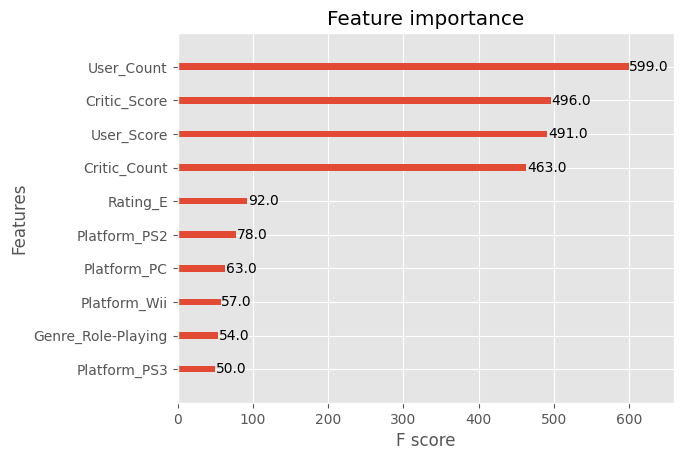

In [ ]:
plot_importance(Other_xgb, max_num_features = 10)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

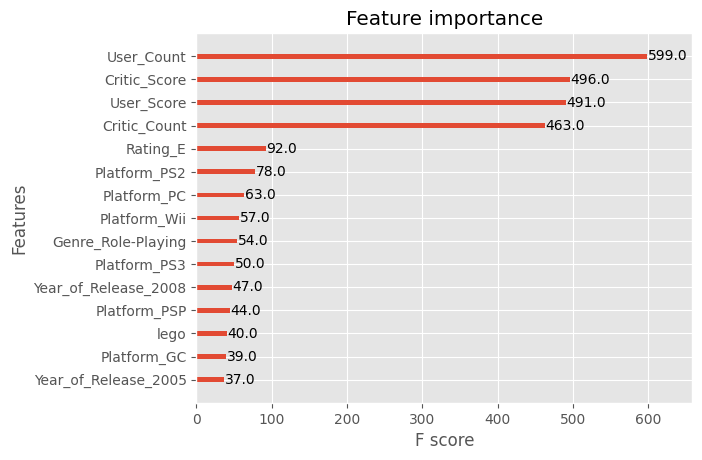

In [ ]:
plot_importance(Other_xgb, max_num_features = 15)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


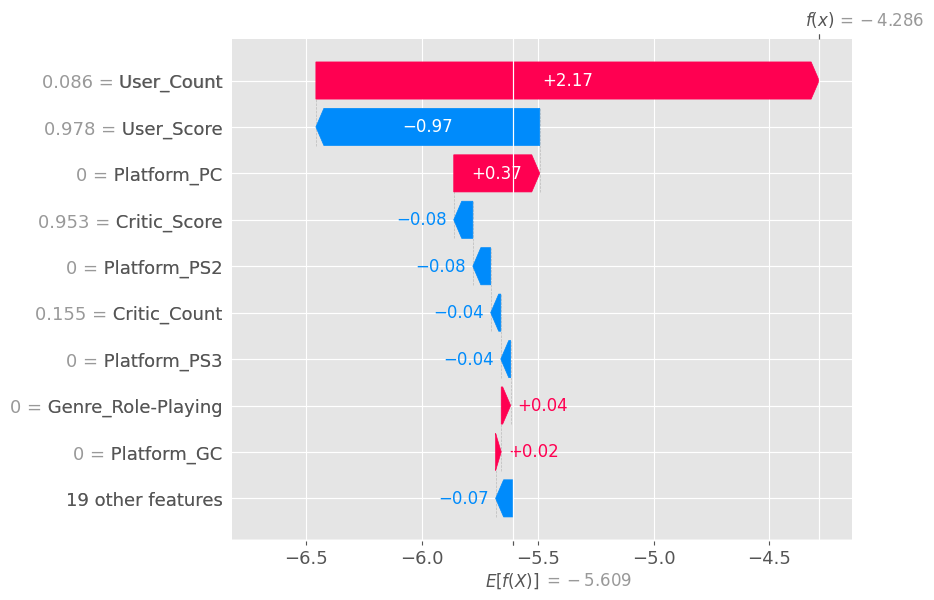

In [ ]:
# https://github.com/slundberg/shap
explainer = shap.Explainer(Other_xgb)
shap_values = explainer(Other_selected_test_X.drop(["Total_Year"], axis = 1))

# This plot is not useful (?)
shap.plots.waterfall(shap_values[0])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


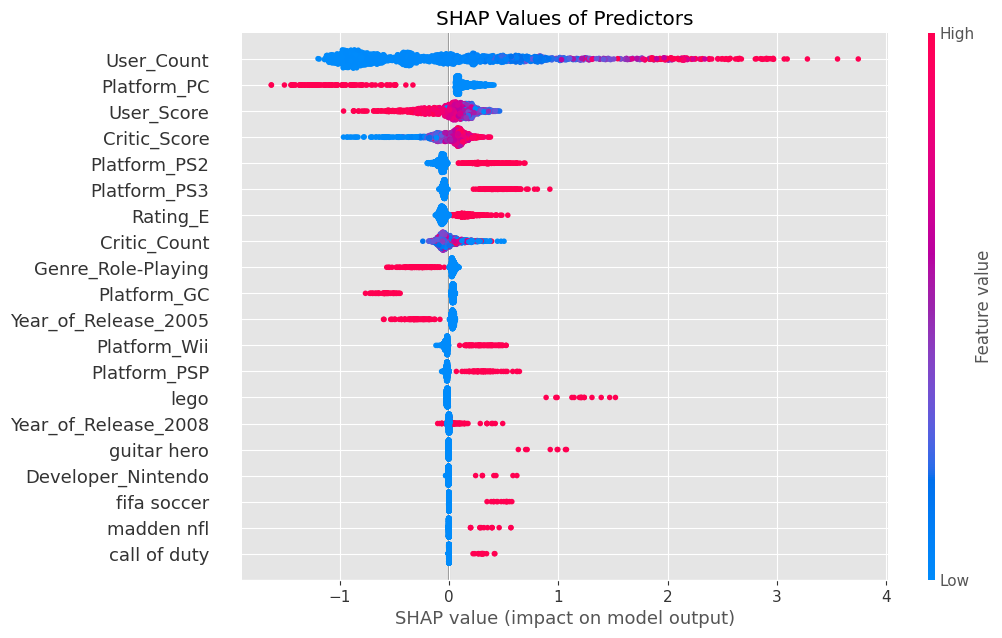

In [ ]:
shap.summary_plot(shap_values, Other_selected_test_X.drop(["Total_Year"], axis = 1), show = False)
plt.title("SHAP Values of Predictors")
plt.gcf().set_size_inches(12,6)

#### Stacking Full

In [ ]:
Other_xgb = XGBRegressor(colsample_bytree = 0.8, eta = 0.1, max_depth = 10, min_child_weight = 20)
Other_xgb.fit(Other_selected_train_X, Other_train_y)
Other_ori_xgb_train_predictions = Other_xgb.predict(Other_selected_train_X)
Other_ori_xgb_test_predictions = Other_xgb.predict(Other_selected_test_X)

In [ ]:
Other_ori_xgb_train_predictions = pd.DataFrame(Other_ori_xgb_train_predictions, columns = ["Other_ori"])
Other_ori_xgb_test_predictions = pd.DataFrame(Other_ori_xgb_test_predictions, columns = ["Other_ori"])

In [ ]:
Other_ori_xgb_train_predictions

Other_ori
0      0.181834
1      0.046026
2      0.047969
3      0.084123
4      0.072178
...         ...
5455   0.016163
5456   0.023848
5457   0.013353
5458   0.020891
5459   0.060252

[5460 rows x 1 columns]

In [ ]:
Other_xgb = XGBRegressor(colsample_bytree = 1, eta = 0.1, max_depth = 6, min_child_weight = 5)
Other_xgb.fit(Other_selected_train_X, np.log(Other_train_y["Other_Sales"].apply(lambda x: 0.01 if x == 0 else x)))
Other_log_xgb_train_predictions = np.exp(Other_xgb.predict(Other_selected_train_X))
Other_log_xgb_test_predictions = np.exp(Other_xgb.predict(Other_selected_test_X))

In [ ]:
Other_log_xgb_train_predictions = pd.DataFrame(Other_log_xgb_train_predictions, columns = ["Other_log"])
Other_log_xgb_test_predictions = pd.DataFrame(Other_log_xgb_test_predictions, columns = ["Other_log"])

In [ ]:
Other_log_xgb_train_predictions

Other_log
0      0.091879
1      0.014560
2      0.042086
3      0.044894
4      0.036495
...         ...
5455   0.015634
5456   0.019922
5457   0.013688
5458   0.014026
5459   0.031282

[5460 rows x 1 columns]

In [ ]:
Other_xgb = XGBRegressor(colsample_bytree = 1, eta = 0.1, max_depth = 3, min_child_weight = 20)
Other_xgb.fit(Other_selected_train_X.drop(["Total_Year"], axis = 1), Other_train_y["Other_Sales"] / (Other_train_X["Total_Year"] * 31 + 1))
Other_sy_xgb_train_predictions = Other_xgb.predict(Other_selected_train_X.drop(["Total_Year"], axis = 1)) * (Other_train_X["Total_Year"] * 31 + 1)
Other_sy_xgb_test_predictions = Other_xgb.predict(Other_selected_test_X.drop(["Total_Year"], axis = 1)) * (Other_test_X["Total_Year"] * 31 + 1)

In [ ]:
Other_sy_xgb_train_predictions = Other_sy_xgb_train_predictions.to_frame()
Other_sy_xgb_test_predictions = Other_sy_xgb_test_predictions.to_frame()
Other_sy_xgb_train_predictions.columns = ["Other_sy"]
Other_sy_xgb_test_predictions.columns = ["Other_sy"]

In [ ]:
Other_sy_xgb_train_predictions

Other_sy
0     0.135227
1     0.069174
2     0.077281
3     0.115400
4     0.056180
...        ...
5455  0.042162
5456  0.033730
5457  0.024610
5458  0.060661
5459  0.039972

[5460 rows x 1 columns]

In [ ]:
Other_xgb = XGBRegressor(colsample_bytree = 1, eta = 0.1, max_depth = 6, min_child_weight = 10)
Other_xgb.fit(Other_selected_train_X.drop(["Total_Year"], axis = 1), 
           np.log(Other_train_y["Other_Sales"].apply(lambda x: 0.01 if x == 0 else x) / (Other_train_X["Total_Year"] * 31 + 1)))
Other_log_sy_xgb_train_predictions = np.exp(Other_xgb.predict(Other_selected_train_X.drop(["Total_Year"], axis = 1))) * (Other_train_X["Total_Year"] * 31 + 1)
Other_log_sy_xgb_test_predictions = np.exp(Other_xgb.predict(Other_selected_test_X.drop(["Total_Year"], axis = 1))) * (Other_test_X["Total_Year"] * 31 + 1)

In [ ]:
Other_log_sy_xgb_train_predictions = Other_log_sy_xgb_train_predictions.to_frame()
Other_log_sy_xgb_test_predictions = Other_log_sy_xgb_test_predictions.to_frame()
Other_log_sy_xgb_train_predictions.columns = ["Other_log_sy"]
Other_log_sy_xgb_test_predictions.columns = ["Other_log_sy"]

In [ ]:
Other_log_sy_xgb_train_predictions

Other_log_sy
0         0.096607
1         0.020608
2         0.055050
3         0.044815
4         0.036533
...            ...
5455      0.020650
5456      0.016263
5457      0.013987
5458      0.017020
5459      0.034254

[5460 rows x 1 columns]

In [ ]:
Other_train_stack = pd.concat([Other_ori_xgb_train_predictions, Other_log_xgb_train_predictions, 
           Other_sy_xgb_train_predictions, Other_log_sy_xgb_train_predictions, Other_train_y], axis = 1)
Other_test_stack = pd.concat([Other_ori_xgb_test_predictions, Other_log_xgb_test_predictions, 
           Other_sy_xgb_test_predictions, Other_log_sy_xgb_test_predictions, Other_test_y], axis = 1)

In [ ]:
Other_train_stack

Other_ori  Other_log  Other_sy  Other_log_sy  Other_Sales
0      0.181834   0.091879  0.135227      0.096607         0.14
1      0.046026   0.014560  0.069174      0.020608         0.03
2      0.047969   0.042086  0.077281      0.055050         0.04
3      0.084123   0.044894  0.115400      0.044815         0.02
4      0.072178   0.036495  0.056180      0.036533         0.01
...         ...        ...       ...           ...          ...
5455   0.016163   0.015634  0.042162      0.020650         0.02
5456   0.023848   0.019922  0.033730      0.016263         0.01
5457   0.013353   0.013688  0.024610      0.013987         0.02
5458   0.020891   0.014026  0.060661      0.017020         0.01
5459   0.060252   0.031282  0.039972      0.034254         0.13

[5460 rows x 5 columns]

In [ ]:
Other_test_stack

Other_ori  Other_log  Other_sy  Other_log_sy  Other_Sales
0      0.100096   0.142100  1.150957      0.261541         0.24
1      0.142614   0.033362  0.028716      0.019555         0.08
2      0.007630   0.010612  0.029270      0.011917         0.01
3      0.010402   0.010992  0.012302      0.012444         0.04
4      0.078798   0.052214  0.041370      0.024727         0.02
...         ...        ...       ...           ...          ...
1360   0.036175   0.025227  0.048144      0.020017         0.05
1361   0.016773   0.012574  0.035977      0.011556         0.00
1362   0.055736   0.021817  0.044717      0.019050         0.03
1363   0.005167   0.006802  0.037099      0.008952         0.00
1364   0.338274   0.213467  0.203488      0.236903         0.16

[1365 rows x 5 columns]

In [ ]:
lr = LinearRegression()
lr.fit(Other_train_stack.drop(["Other_Sales"], axis = 1), Other_train_stack['Other_Sales'])

LinearRegression()

In [ ]:
lr.coef_

array([ 1.0314163 ,  1.39854181, -0.43738699, -0.47886735])

In [ ]:
lr.intercept_

-0.015146084991044514

In [ ]:
Other_train_stack_pred = lr.predict(Other_train_stack.drop(["Other_Sales"], axis = 1))
Other_test_stack_pred = lr.predict(Other_test_stack.drop(["Other_Sales"], axis = 1))

In [ ]:
train_n = Other_selected_train_X.shape[0]
train_p = Other_selected_train_X.shape[1] - 1
train_mape = mean_absolute_percentage_error(Other_train_y["Other_Sales"].apply(lambda x: 0.01 if x == 0 else x), 
                                            Other_train_stack_pred)
train_mse = mean_squared_error(Other_train_y, Other_train_stack_pred, squared = True)
train_r2 = r2_score(Other_train_y, Other_train_stack_pred)
train_adj_r2 = 1 - (1 - train_r2) * (train_n - 1) / (train_n - train_p - 1)

In [ ]:
test_n = Other_selected_test_X.shape[0]
test_p = Other_selected_test_X.shape[1] - 1
test_mape = mean_absolute_percentage_error(Other_test_y["Other_Sales"].apply(lambda x: 0.01 if x == 0 else x), 
                                           Other_test_stack_pred)
test_mse = mean_squared_error(Other_test_y, Other_test_stack_pred, squared = True)
test_r2 = r2_score(Other_test_y, Other_test_stack_pred)
test_adj_r2 = 1 - (1 - test_r2) * (test_n - 1) / (test_n - test_p - 1)

In [ ]:
print("Train MAPE: {:.2f}%".format(train_mape * 100))
print("Train MSE:", train_mse)
print("Train R2:", train_r2)
print("Train Adj R2:", train_adj_r2)
print()
print("Test MAPE: {:.2f}%".format(test_mape * 100))
print("Test MSE:", test_mse)
print("Test R2:", test_r2)
print("Test Adj R2:", test_adj_r2)

Train MAPE: 156.08%
Train MSE: 0.01919449058145239
Train R2: 0.7626451997249302
Train Adj R2: 0.7614214960961874

Test MAPE: 186.88%
Test MSE: 0.021204405872027026
Test R2: 0.4777280211361493
Test Adj R2: 0.46678220121984104


In [ ]:
Other_train_stack_pred = (Other_train_stack["Other_ori"] + Other_train_stack["Other_log"] + Other_train_stack["Other_sy"] + Other_train_stack["Other_log_sy"]) / 4
Other_test_stack_pred = (Other_test_stack["Other_ori"] + Other_test_stack["Other_log"] + Other_test_stack["Other_sy"] + Other_test_stack["Other_log_sy"]) / 4

In [ ]:
Other_train_stack_pred = Other_train_stack_pred.apply(lambda x: max(0, x))
Other_test_stack_pred = Other_test_stack_pred.apply(lambda x: max(0, x))

In [ ]:
train_n = Other_selected_train_X.shape[0]
train_p = Other_selected_train_X.shape[1] - 1
train_mape = mean_absolute_percentage_error(Other_train_y["Other_Sales"].apply(lambda x: 0.01 if x == 0 else x), 
                                            Other_train_stack_pred)
train_mse = mean_squared_error(Other_train_y, Other_train_stack_pred, squared = True)
train_r2 = r2_score(Other_train_y, Other_train_stack_pred)
train_adj_r2 = 1 - (1 - train_r2) * (train_n - 1) / (train_n - train_p - 1)

In [ ]:
test_n = Other_selected_test_X.shape[0]
test_p = Other_selected_test_X.shape[1] - 1
test_mape = mean_absolute_percentage_error(Other_test_y["Other_Sales"].apply(lambda x: 0.01 if x == 0 else x), 
                                           Other_test_stack_pred)
test_mse = mean_squared_error(Other_test_y, Other_test_stack_pred, squared = True)
test_r2 = r2_score(Other_test_y, Other_test_stack_pred)
test_adj_r2 = 1 - (1 - test_r2) * (test_n - 1) / (test_n - test_p - 1)

In [ ]:
print("Train MAPE: {:.2f}%".format(train_mape * 100))
print("Train MSE:", train_mse)
print("Train R2:", train_r2)
print("Train Adj R2:", train_adj_r2)
print()
print("Test MAPE: {:.2f}%".format(test_mape * 100))
print("Test MSE:", test_mse)
print("Test R2:", test_r2)
print("Test Adj R2:", test_adj_r2)

Train MAPE: 103.85%
Train MSE: 0.03739900111565008
Train R2: 0.5375322724704186
Train Adj R2: 0.5351479792701188

Test MAPE: 114.02%
Test MSE: 0.02156721887397324
Test R2: 0.46879180921738217
Test Adj R2: 0.4576587034225369


#### Stacking Partial

In [ ]:
Other_xgb = XGBRegressor(colsample_bytree = 0.8, eta = 0.1, max_depth = 10, min_child_weight = 20)
Other_xgb.fit(Other_selected_train_X, Other_train_y)
Other_ori_xgb_train_predictions = Other_xgb.predict(Other_selected_train_X)
Other_ori_xgb_test_predictions = Other_xgb.predict(Other_selected_test_X)

In [ ]:
Other_ori_xgb_train_predictions = pd.DataFrame(Other_ori_xgb_train_predictions, columns = ["Other_ori"])
Other_ori_xgb_test_predictions = pd.DataFrame(Other_ori_xgb_test_predictions, columns = ["Other_ori"])

In [ ]:
Other_ori_xgb_train_predictions

Other_ori
0      0.181834
1      0.046026
2      0.047969
3      0.084123
4      0.072178
...         ...
5455   0.016163
5456   0.023848
5457   0.013353
5458   0.020891
5459   0.060252

[5460 rows x 1 columns]

In [ ]:
Other_xgb = XGBRegressor(colsample_bytree = 1, eta = 0.1, max_depth = 6, min_child_weight = 5)
Other_xgb.fit(Other_selected_train_X, np.log(Other_train_y["Other_Sales"].apply(lambda x: 0.01 if x == 0 else x)))
Other_log_xgb_train_predictions = np.exp(Other_xgb.predict(Other_selected_train_X))
Other_log_xgb_test_predictions = np.exp(Other_xgb.predict(Other_selected_test_X))

In [ ]:
Other_log_xgb_train_predictions = pd.DataFrame(Other_log_xgb_train_predictions, columns = ["Other_log"])
Other_log_xgb_test_predictions = pd.DataFrame(Other_log_xgb_test_predictions, columns = ["Other_log"])

In [ ]:
Other_log_xgb_train_predictions

Other_log
0      0.091879
1      0.014560
2      0.042086
3      0.044894
4      0.036495
...         ...
5455   0.015634
5456   0.019922
5457   0.013688
5458   0.014026
5459   0.031282

[5460 rows x 1 columns]

In [ ]:
Other_train_stack = pd.concat([Other_ori_xgb_train_predictions, Other_log_xgb_train_predictions, Other_train_y], axis = 1)
Other_test_stack = pd.concat([Other_ori_xgb_test_predictions, Other_log_xgb_test_predictions, Other_test_y], axis = 1)

In [ ]:
Other_train_stack

Other_ori  Other_log  Other_Sales
0      0.181834   0.091879         0.14
1      0.046026   0.014560         0.03
2      0.047969   0.042086         0.04
3      0.084123   0.044894         0.02
4      0.072178   0.036495         0.01
...         ...        ...          ...
5455   0.016163   0.015634         0.02
5456   0.023848   0.019922         0.01
5457   0.013353   0.013688         0.02
5458   0.020891   0.014026         0.01
5459   0.060252   0.031282         0.13

[5460 rows x 3 columns]

In [ ]:
Other_test_stack

Other_ori  Other_log  Other_Sales
0      0.100096   0.142100         0.24
1      0.142614   0.033362         0.08
2      0.007630   0.010612         0.01
3      0.010402   0.010992         0.04
4      0.078798   0.052214         0.02
...         ...        ...          ...
1360   0.036175   0.025227         0.05
1361   0.016773   0.012574         0.00
1362   0.055736   0.021817         0.03
1363   0.005167   0.006802         0.00
1364   0.338274   0.213467         0.16

[1365 rows x 3 columns]

In [ ]:
lr = LinearRegression()
lr.fit(Other_train_stack.drop(["Other_Sales"], axis = 1), Other_train_stack['Other_Sales'])

LinearRegression()

In [ ]:
lr.coef_

array([0.77695215, 0.84711665], dtype=float32)

In [ ]:
lr.intercept_

-0.03161954

In [ ]:
Other_train_stack_pred = lr.predict(Other_train_stack.drop(["Other_Sales"], axis = 1))
Other_test_stack_pred = lr.predict(Other_test_stack.drop(["Other_Sales"], axis = 1))

In [ ]:
train_n = Other_selected_train_X.shape[0]
train_p = Other_selected_train_X.shape[1] - 1
train_mape = mean_absolute_percentage_error(Other_train_y["Other_Sales"].apply(lambda x: 0.01 if x == 0 else x), 
                                            Other_train_stack_pred)
train_mse = mean_squared_error(Other_train_y, Other_train_stack_pred, squared = True)
train_r2 = r2_score(Other_train_y, Other_train_stack_pred)
train_adj_r2 = 1 - (1 - train_r2) * (train_n - 1) / (train_n - train_p - 1)

In [ ]:
test_n = Other_selected_test_X.shape[0]
test_p = Other_selected_test_X.shape[1] - 1
test_mape = mean_absolute_percentage_error(Other_test_y["Other_Sales"].apply(lambda x: 0.01 if x == 0 else x), 
                                           Other_test_stack_pred)
test_mse = mean_squared_error(Other_test_y, Other_test_stack_pred, squared = True)
test_r2 = r2_score(Other_test_y, Other_test_stack_pred)
test_adj_r2 = 1 - (1 - test_r2) * (test_n - 1) / (test_n - test_p - 1)

In [ ]:
print("Train MAPE: {:.2f}%".format(train_mape * 100))
print("Train MSE:", train_mse)
print("Train R2:", train_r2)
print("Train Adj R2:", train_adj_r2)
print()
print("Test MAPE: {:.2f}%".format(test_mape * 100))
print("Test MSE:", test_mse)
print("Test R2:", test_r2)
print("Test Adj R2:", test_adj_r2)

Train MAPE: 154.32%
Train MSE: 0.02219027900084001
Train R2: 0.7255999466127054
Train Adj R2: 0.7241852529108376

Test MAPE: 172.58%
Test MSE: 0.021717334105156805
Test R2: 0.46509441824491116
Test Adj R2: 0.4538838222201039


In [ ]:
Other_train_stack_pred = (Other_train_stack["Other_ori"] + Other_train_stack["Other_log"]) / 2
Other_test_stack_pred = (Other_test_stack["Other_ori"] + Other_test_stack["Other_log"]) / 2

In [ ]:
Other_train_stack_pred = Other_train_stack_pred.apply(lambda x: max(0, x))
Other_test_stack_pred = Other_test_stack_pred.apply(lambda x: max(0, x))

In [ ]:
train_n = Other_selected_train_X.shape[0]
train_p = Other_selected_train_X.shape[1] - 1
train_mape = mean_absolute_percentage_error(Other_train_y["Other_Sales"].apply(lambda x: 0.01 if x == 0 else x), 
                                            Other_train_stack_pred)
train_mse = mean_squared_error(Other_train_y, Other_train_stack_pred, squared = True)
train_r2 = r2_score(Other_train_y, Other_train_stack_pred)
train_adj_r2 = 1 - (1 - train_r2) * (train_n - 1) / (train_n - train_p - 1)

In [ ]:
test_n = Other_selected_test_X.shape[0]
test_p = Other_selected_test_X.shape[1] - 1
test_mape = mean_absolute_percentage_error(Other_test_y["Other_Sales"].apply(lambda x: 0.01 if x == 0 else x), 
                                           Other_test_stack_pred)
test_mse = mean_squared_error(Other_test_y, Other_test_stack_pred, squared = True)
test_r2 = r2_score(Other_test_y, Other_test_stack_pred)
test_adj_r2 = 1 - (1 - test_r2) * (test_n - 1) / (test_n - test_p - 1)

In [ ]:
print("Train MAPE: {:.2f}%".format(train_mape * 100))
print("Train MSE:", train_mse)
print("Train R2:", train_r2)
print("Train Adj R2:", train_adj_r2)
print()
print("Test MAPE: {:.2f}%".format(test_mape * 100))
print("Test MSE:", test_mse)
print("Test R2:", test_r2)
print("Test Adj R2:", test_adj_r2)

Train MAPE: 85.79%
Train MSE: 0.03082110658522894
Train R2: 0.6188730528299277
Train Adj R2: 0.616908119204304

Test MAPE: 105.84%
Test MSE: 0.019890132077352657
Test R2: 0.5100990472170545
Test Adj R2: 0.49983166197908857
